In [4]:
# load libraries
import pandas as pd
import os
import numpy as np
import datetime
from torch.utils.data import Dataset, DataLoader
from torch import save

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# change me, have to point to the Meteotrentino drive folder
wk =  "/content/drive/My Drive/10. Meteotrentino/"

# folder for the csv
subfolder = "Dati csv convalidati/"

# select the filename, make me dynamic
selected_dataset = "temperatura1_A.csv"

In [5]:
data_path = wk+subfolder+selected_dataset
# data_path = "../../../temperatura1_A.csv"

In [6]:
df_row_data = pd.read_csv(
  data_path,
  sep = ";", # not a CSV, separator is ';'
  header = None, # no header
  dtype = {'0' : str, '1': str, '2': str, '3' : np.float64, '4':int} # Daniele: added the validation code so we can train on validated data (no need of classes, just distinguish between good and bad data)
  ) 

# define a header 
df_row_data = df_row_data.set_axis(
    ['label', 'date', 'time', 'value','validation_code'],
    axis = 1,
    inplace = False
)
df_row_data['datetime'] = pd.to_datetime(df_row_data['date']+" "+df_row_data['time'], format = '%d/%m/%Y %H:%M')
df_row_data

label        date   time  value  validation_code            datetime
0         T0009  01/01/2014  00:00   -2.1                1 2014-01-01 00:00:00
1         T0009  01/01/2014  00:15   -2.3                1 2014-01-01 00:15:00
2         T0009  01/01/2014  00:30   -2.2                1 2014-01-01 00:30:00
3         T0009  01/01/2014  00:45   -2.3                1 2014-01-01 00:45:00
4         T0009  01/01/2014  01:00   -2.5                1 2014-01-01 01:00:00
...         ...         ...    ...    ...              ...                 ...
11763686  T0227  31/12/2021  22:45    8.1                1 2021-12-31 22:45:00
11763687  T0227  31/12/2021  23:00    8.2                1 2021-12-31 23:00:00
11763688  T0227  31/12/2021  23:15    8.1                1 2021-12-31 23:15:00
11763689  T0227  31/12/2021  23:30    8.0                1 2021-12-31 23:30:00
11763690  T0227  31/12/2021  23:45    8.0                1 2021-12-31 23:45:00

[11763691 rows x 6 columns]

In [15]:
# select a single station
# a good one for temperature is T0059 with 5831 anomalies (code 140)
df_single_station = df_row_data[df_row_data['label'] == 'T0059'].reset_index(drop=True)
print(np.unique(df_single_station['validation_code'].values,return_counts=True))
# print(np.unique(df_row_data['label'].values))

(array([  1, 140]), array([274475,   5831]))


In [16]:
print(df_single_station)

        label        date   time  value  validation_code            datetime
0       T0059  01/01/2014  00:00   -7.2                1 2014-01-01 00:00:00
1       T0059  01/01/2014  00:15   -7.1                1 2014-01-01 00:15:00
2       T0059  01/01/2014  00:30   -7.1                1 2014-01-01 00:30:00
3       T0059  01/01/2014  00:45   -7.1                1 2014-01-01 00:45:00
4       T0059  01/01/2014  01:00   -7.2                1 2014-01-01 01:00:00
...       ...         ...    ...    ...              ...                 ...
280301  T0059  31/12/2021  22:45    5.0                1 2021-12-31 22:45:00
280302  T0059  31/12/2021  23:00    5.1                1 2021-12-31 23:00:00
280303  T0059  31/12/2021  23:15    5.4                1 2021-12-31 23:15:00
280304  T0059  31/12/2021  23:30    5.3                1 2021-12-31 23:30:00
280305  T0059  31/12/2021  23:45    5.2                1 2021-12-31 23:45:00

[280306 rows x 6 columns]


In [35]:
from importlib import reload  # Python 3.4+
import sys
# !git clone https://github.com/eliazonta/AI-Challenge-HIT
# sys.path.append("/content/AI-Challenge-HIT/python_code/notebooks")
sys.path.append("/mnt/d/MeteoTrentino/AI-Challenge-HIT/python_code/notebooks")
import TSF.data_splitter
TSF.data_splitter = reload(TSF.data_splitter)
from TSF.data_splitter import *
# new_data = split_df_for_TSF(df_single_station.iloc[0:10], 24, 1, ".")

# split the data for the time series forecasting (24 hours of training, 1 hour of prediction)
PERIOD = 24
PREDICTION = 1
df = df_single_station#.iloc[0:120]
df_train,df_prediction,n_previsions = split_df_for_TSF(df, 24, 1)
# df_train = df_train.reset_index(drop=True)
# df_prediction = df_prediction.reset_index(drop=True)
# np.unique(df_prediction[['val_0','val_1','val_2','val_3']].values, return_counts=True)
print(df_prediction)

Verbose mode
index = 500	 current date = 2014-01-21 19:00:00	 to the end date = 2021-12-31 23:45:00
Df was containing anomalies at initial date = 2014-01-29 23:00:00
Df was containing anomalies at initial date = 2014-01-30 00:00:00
Df was containing anomalies at initial date = 2014-01-30 01:00:00
Df was containing anomalies at initial date = 2014-01-30 02:00:00
Df was containing anomalies at initial date = 2014-01-30 03:00:00
Df was containing anomalies at initial date = 2014-01-30 04:00:00
Df was containing anomalies at initial date = 2014-01-30 05:00:00
Df was containing anomalies at initial date = 2014-01-30 06:00:00
Df was containing anomalies at initial date = 2014-01-30 07:00:00
Df was containing anomalies at initial date = 2014-01-30 08:00:00
Df was containing anomalies at initial date = 2014-01-30 09:00:00
Df was containing anomalies at initial date = 2014-01-30 10:00:00
Df was containing anomalies at initial date = 2014-01-30 11:00:00
Df was containing anomalies at initial dat

In [63]:
import torch
from torch.utils.data import Dataset, DataLoader
class CustomDataset(Dataset):
  def __init__(self, df_train, df_test):
    self.features = torch.FloatTensor(df_train.drop(['sensor_code','in_datetime'],axis=1).values)
    self.target = torch.FloatTensor(df_test.drop(['sensor_code','in_datetime']+[f"val_{idx}" for idx in range(n_previsions)],axis=1).values)
    mean = self.features.mean()
    std = self.features.std()
    self.features = (self.features-mean)/std
    self.target = (self.target-mean)/std
    self.sensor_code = df_train['sensor_code'].values
    self.in_datetime = df_train['in_datetime'].values
    
    self.labels = torch.FloatTensor(df_test[[f"val_{idx}" for idx in range(n_previsions)]].values)

  def __len__(self):
    return len(self.sensor_code)

  def __getitem__(self, idx):
    sensor_code = self.sensor_code[idx]
    date = self.in_datetime[idx]
    features = self.features[idx]
    labels = self.labels[idx]
    target = self.target[idx]
    return {"sensor_code": sensor_code, "date":date,"features": features, "target":target,"labels":labels}

In [130]:
# all rows with anomalies
list_validation_columns = [f"val_{idx}" for idx in range(n_previsions)]
validations = df_prediction[list_validation_columns]
mask = validations.values != 1
indexes_anomalies = np.unique(validations[mask].index.values)
# extract the data for anomalies only
features_anomalies = df_train.iloc[indexes_anomalies]
target_anomalies = df_prediction.iloc[indexes_anomalies]
# remove those rows from the whole dataset
df_train_without_anomalies = df_train.drop(indexes_anomalies).reset_index(drop=True)
df_prediction_without_anomalies = df_prediction.drop(indexes_anomalies).reset_index(drop=True)
print(features_anomalies['in_datetime'])
### DA METTERE LO UNIQUE QUI!!!!

694     2014-01-29 22:15:00
5630    2014-10-05 12:15:00
22828   2016-11-10 05:15:00
56696   2020-12-31 15:15:00
57007   2021-01-21 10:15:00
57051   2021-02-08 22:15:00
Name: in_datetime, dtype: datetime64[ns]


In [131]:
splits = ['train','test']
shuffle = {'train':True,'test':False}
dataset = {}

# split data in training and test (to check generalization)
# training set
training_features = df_train_without_anomalies.sample(frac=0.8)
training_target = df_prediction_without_anomalies.iloc[training_features.index.values]
# test set
test_features = df_train_without_anomalies.drop(training_features.index)
test_target = df_prediction_without_anomalies.iloc[test_features.index]
# add anomalies to test set
test_features = pd.concat([test_features,features_anomalies],axis = 0)
test_target = pd.concat([test_target,target_anomalies],axis = 0)

training_features = training_features.reset_index(drop=True)
training_target = training_target.reset_index(drop=True)
test_features = test_features.reset_index(drop=True)
test_target = test_target.reset_index(drop=True)

In [132]:
from torch import save,load
# dataset_path = wk+"DatasetPytorch/umidità/"
# dataset['train'] = load(dataset_path+'T0354_train_umidità_tsf.pt')
# dataset['test'] = load(dataset_path+'T0354_test_umidità_tsf.pt')
dataset['train'] = CustomDataset(training_features, training_target)
dataset['test'] = CustomDataset(test_features, test_target)
# save(dataset['train'], wk+'DatasetPytorch/good_by_daniele/'+'T0059_train_temperature_unnorm_tsf.pt')
# save(dataset['test'], wk+'DatasetPytorch/good_by_daniele/'+'T0059_test_temperature_unnorm_tsf.pt')

### dataloader
b_size = {'train':64,'test':len(dataset['test'])}
dataloader = {x: torch.utils.data.DataLoader(dataset=dataset[x],
                                            batch_size=b_size[x],
                                            shuffle=shuffle[x],
                                            collate_fn=lambda x: x,
                                            drop_last=True)
                                            #num_workers=int(opt.workers),
                                            #worker_init_fn=(None if opt.manualseed == -1
                                            #else lambda x: np.random.seed(opt.manualseed)))
            for x in splits}

In [64]:
### standardize the data
########################## TO DO: THE STANDARDIZATION MUST INCLUDE THE TARGET!!! 
# means = self.features.mean(dim=1, keepdim=True)
# stds = torch.clamp(self.features.std(dim=1, keepdim=True),min=1)
# self.features = (self.features - means) / stds
# self.target = (self.target - means) / stds
features = torch.stack([v["features"] for v in dataset['train']])
targets = torch.stack([v["target"] for v in dataset['train']])
complete = features#torch.cat((features, targets), 1)
print(features)
mean = complete.mean()#dim=1, keepdim=True)
print(mean)
std = complete.std()#dim=1, keepdim=True)
print(std)
print(((features-mean)/std).std())

tensor([[ 8.1000,  7.5000,  7.6000,  ...,  6.1000,  8.8000, 10.9000],
        [ 7.4000,  7.3000,  7.4000,  ...,  7.8000,  7.8000,  7.8000],
        [-1.5000, -1.7000, -1.9000,  ...,  1.3000,  1.2000,  1.1000],
        ...,
        [ 1.9000,  1.6000,  1.5000,  ...,  2.0000,  2.2000,  2.3000],
        [ 5.9000,  5.9000,  5.5000,  ...,  4.3000,  4.1000,  4.0000],
        [-8.0000, -7.8000, -7.9000,  ..., -8.3000, -8.2000, -8.2000]])
tensor(5.4901)
tensor(7.1302)
tensor(1.)


100%|██████████| 808/808 [00:07<00:00, 108.64it/s]


Training Loss: 0.0161
Test Loss: 0.0164


100%|██████████| 808/808 [00:07<00:00, 110.30it/s]


Training Loss: 0.0161
Test Loss: 0.0163


100%|██████████| 808/808 [00:07<00:00, 109.95it/s]


Training Loss: 0.0159
Test Loss: 0.0161


100%|██████████| 808/808 [00:07<00:00, 110.30it/s]


Training Loss: 0.0158
Test Loss: 0.0160


100%|██████████| 808/808 [00:07<00:00, 110.85it/s]


Training Loss: 0.0157
Test Loss: 0.0159


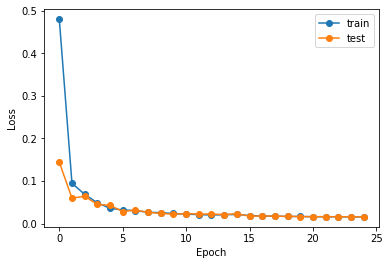

In [200]:
from collections.abc import Sequence
from importlib import reload  # Python 3.4+
import torch
import sys
from torch import nn
# !git clone https://github.com/eliazonta/AI-Challenge-HIT
sys.path.append("/content/AI-Challenge-HIT/python_code/notebooks/AnomalyDetection")
import LSTMs
LSTMs = reload(LSTMs)
from LSTMs import SingleLSTMCell,LSTM

device = torch.device("cuda")
sequence_length = dataset['train'][0]['features'].size(0)
pred_length = dataset['train'][0]['target'].size(0)
# Instantiate the model with hyperparameters
# model = LSTM(input_size=1, output_size=1, hidden_dim=32, num_layers=3, device = device)
# train_loss = []
# test_loss = []

# We'll also set the model to the device that we defined earlier (default is CPU)
# Daniele: Not sure if this is useless now, should check
model = model.to(device)
#model.load_state_dict(torch.load('T0065_rad_sol_model.pt', map_location=torch.device('cpu')))

# Define hyperparameters
lr = 5e-6

# Define Loss, Optimizer
criterion = nn.MSELoss()#CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

from tqdm import tqdm
n_epochs = 5
for epoch in range(1, n_epochs + 1):
    model.train()
    loss_train_batch = []
    for data in tqdm(dataloader['train'], leave=True, total=len(dataloader['train'])):
      # preparing the input
      batch_input_features = torch.stack([v["features"] for v in data]).to(device)
      target_features = torch.stack([v["target"] for v in data]).to(device)
      # feed the model
      output = model(batch_input_features,pred_length)
      output = output.to(device)[:,-pred_length:]
      loss_train = criterion(output, target_features)
      loss_train.backward() # Does backpropagation and calculates gradients
      optimizer.step() # Updates the weights accordingly
      loss_train_batch.append(loss_train.item())
    
    mean_train_loss = np.mean(loss_train_batch)
    model.eval()
    # preparing the input of test dataset
    data_test = next(iter(dataloader['test']))
    test_input_features = torch.stack([v["features"] for v in data_test]).to(device)
    test_target_features = torch.stack([v["target"] for v in data_test]).to(device)
    output_test = model(test_input_features,pred_length)[:,-pred_length:]
    loss_test = criterion(output_test, test_target_features)
    train_loss.append(mean_train_loss)
    test_loss.append(loss_test.item())
    print("Training Loss: {:.4f}".format(mean_train_loss))
    print("Test Loss: {:.4f}".format(loss_test.item()))

    if mean_train_loss < 0.010:
        break

import matplotlib.pyplot as plt

plt.plot(train_loss,'o-',label="train")
plt.plot(test_loss,'o-',label="test")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [205]:
torch.save(model.state_dict(), wk+"TrainedModels/"+"T0059_temperature_model.pt")

In [201]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np

sample = dataset["test"]
### use below a list of min and max indexes in case of memory overflow, otherwise set to none
restriction = None#[10000,50000]

def extract_quantity_from_dataset(dataset,label_of_quantity,indexes=None,device='cpu'):
  # returns a pytorch array of the given quantity
  # optional: restrict the dataset to some indexes (for memory allocation reasons)
  if(indexes):
    pt_tensor = torch.stack([dataset[i][label_of_quantity] for i in range(min(indexes),max(indexes)+1)]).to(device)
  else: pt_tensor = torch.stack([v[label_of_quantity] for v in dataset]).to(device)
  return pt_tensor

sample_tensor_validation = extract_quantity_from_dataset(sample,"labels",restriction)
sample_tensor_features = extract_quantity_from_dataset(sample,"features",restriction,device=device)
sample_tensor_target = extract_quantity_from_dataset(sample,"target",restriction,device=device)

sensor_code = [v['sensor_code'] for v in sample][0]
date = pd.to_datetime([v['date'] for v in sample]).strftime("%d/%m/%Y %H:%M") 

model.eval()
with torch.no_grad():
    reconstructed = model(sample_tensor_features,pred_length)

# Find the data with highest loss
criterion = nn.MSELoss(reduction='none')
TOP_K_loss = 20
loss = criterion(reconstructed[:,-pred_length:]*std + mean, sample_tensor_target*std + mean).mean(dim=1)
top_loss, top_loss_indexes = torch.topk(loss, TOP_K_loss, dim=0)
lowest_loss, lowest_loss_indexes = torch.topk(loss, TOP_K_loss, dim=0, largest=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until exp

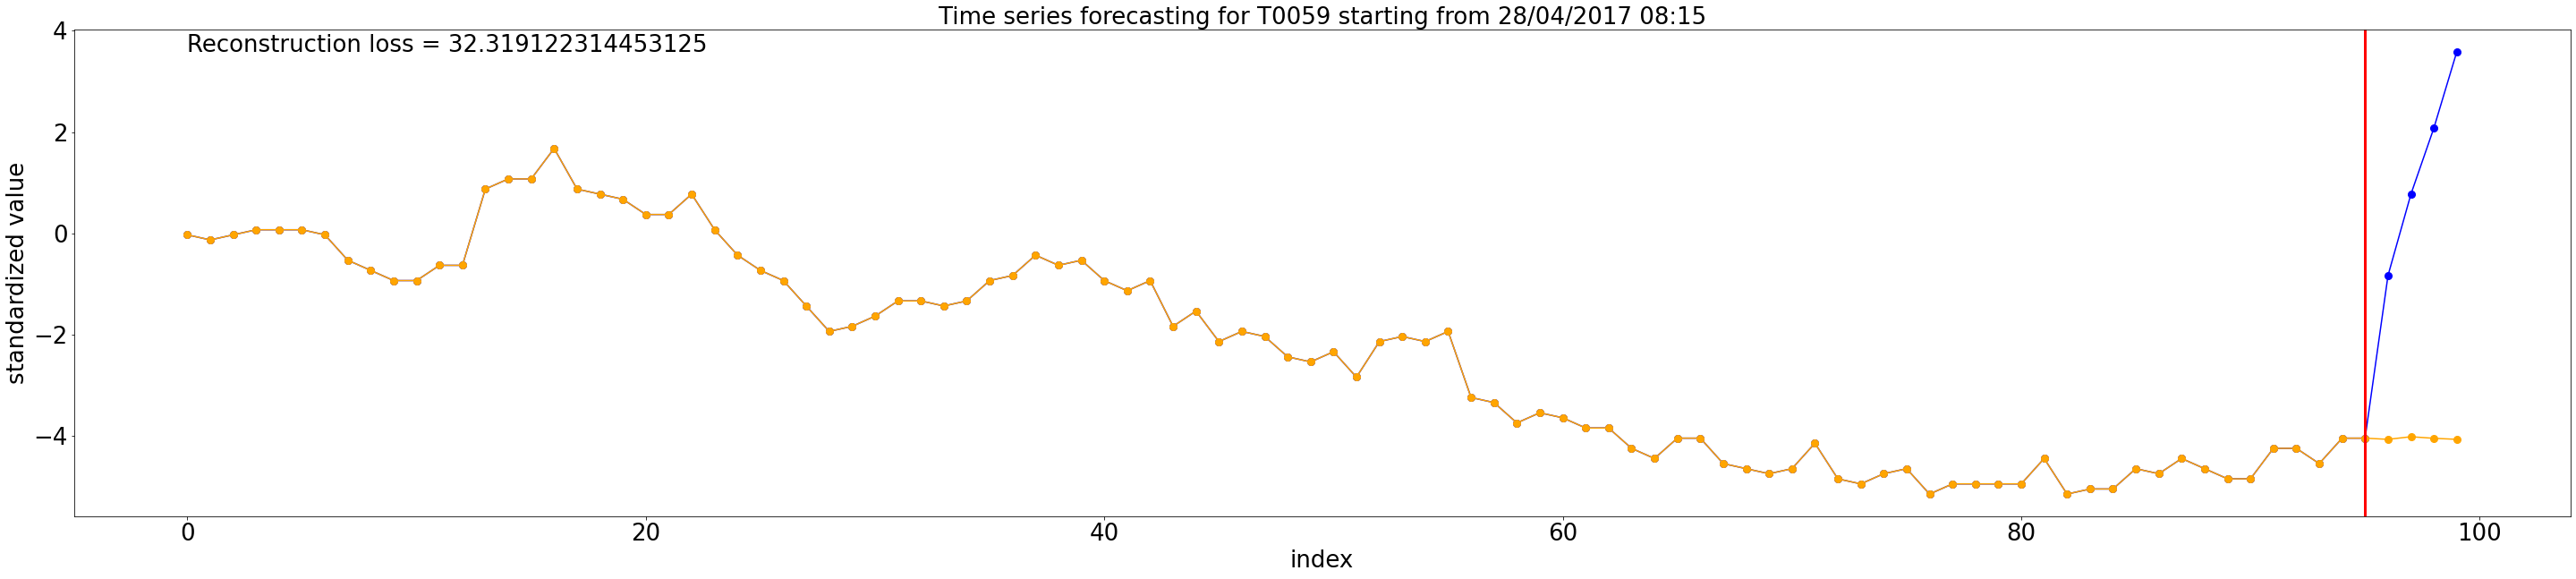

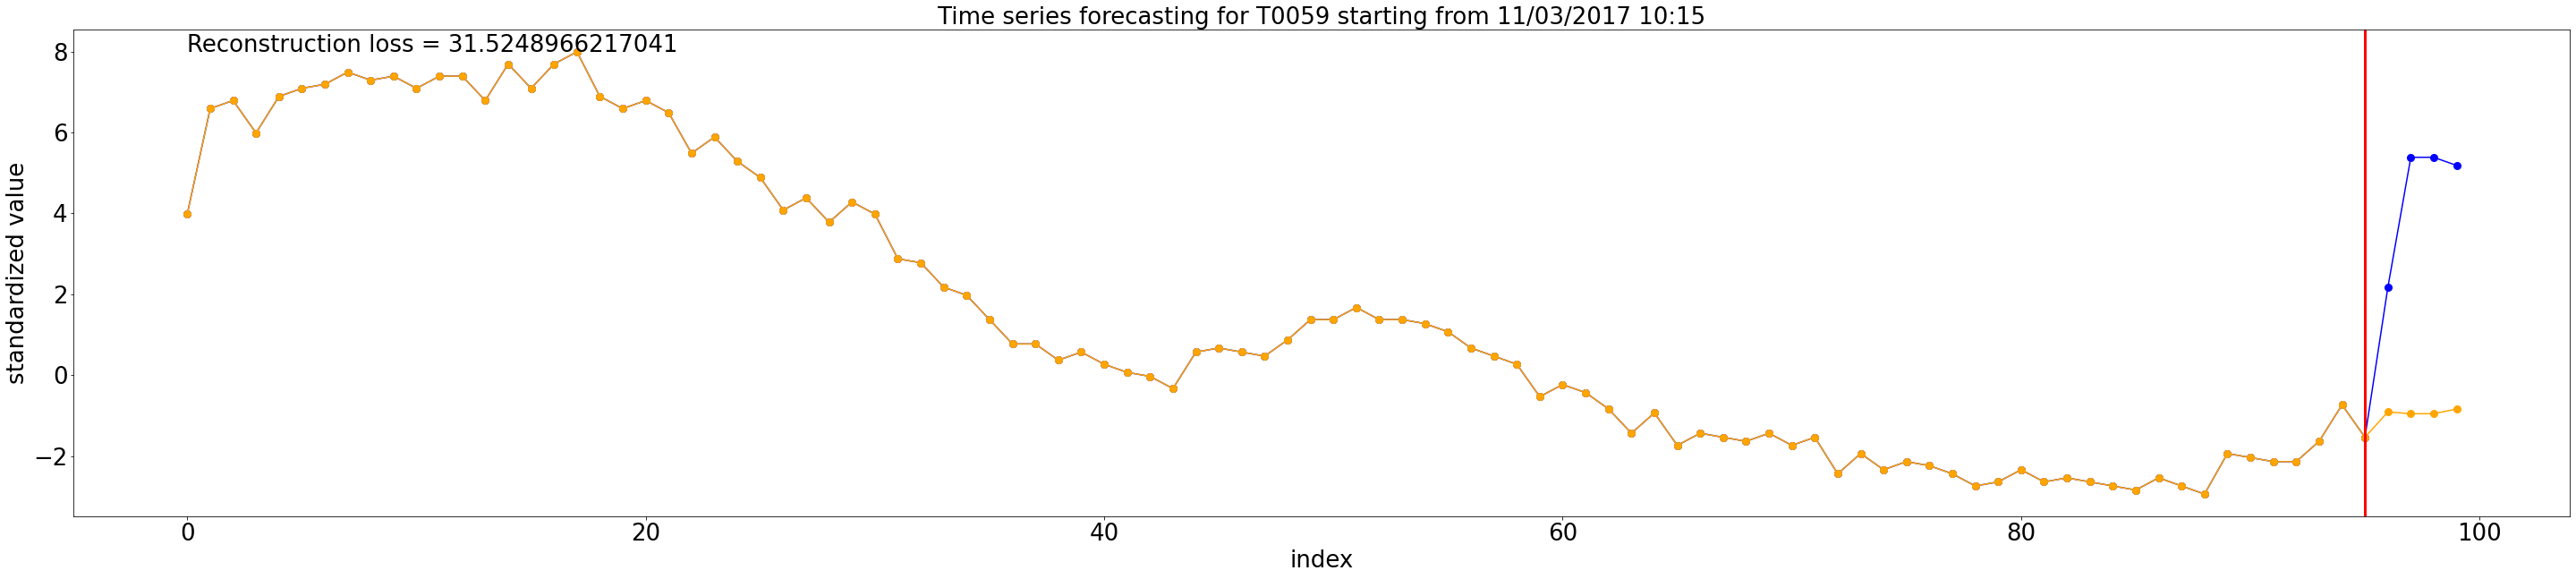

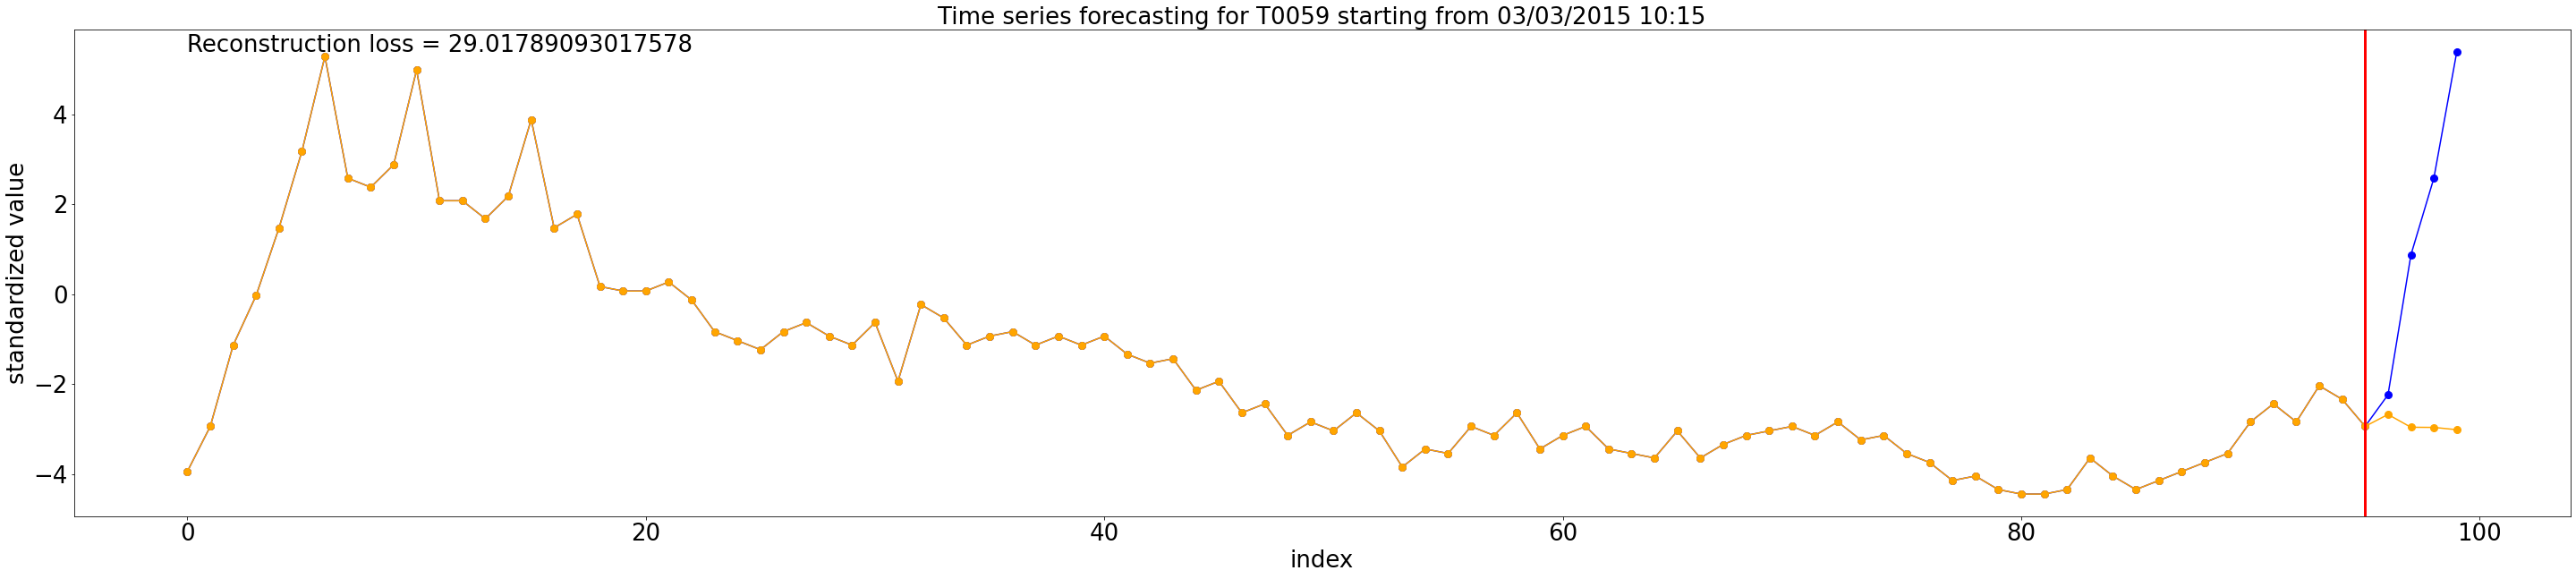

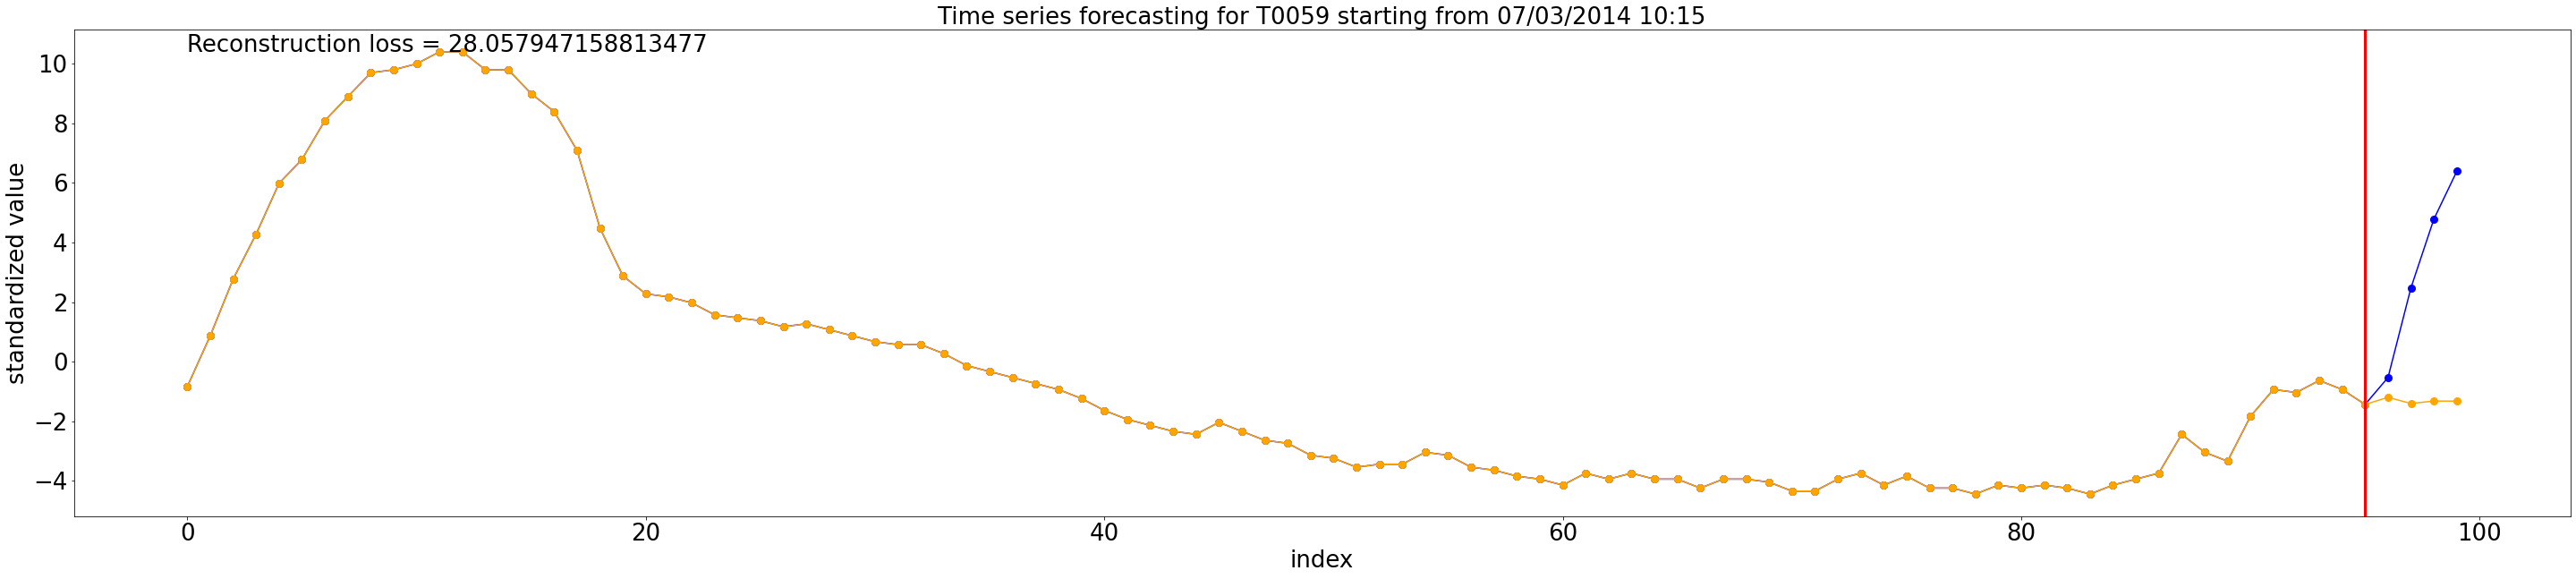

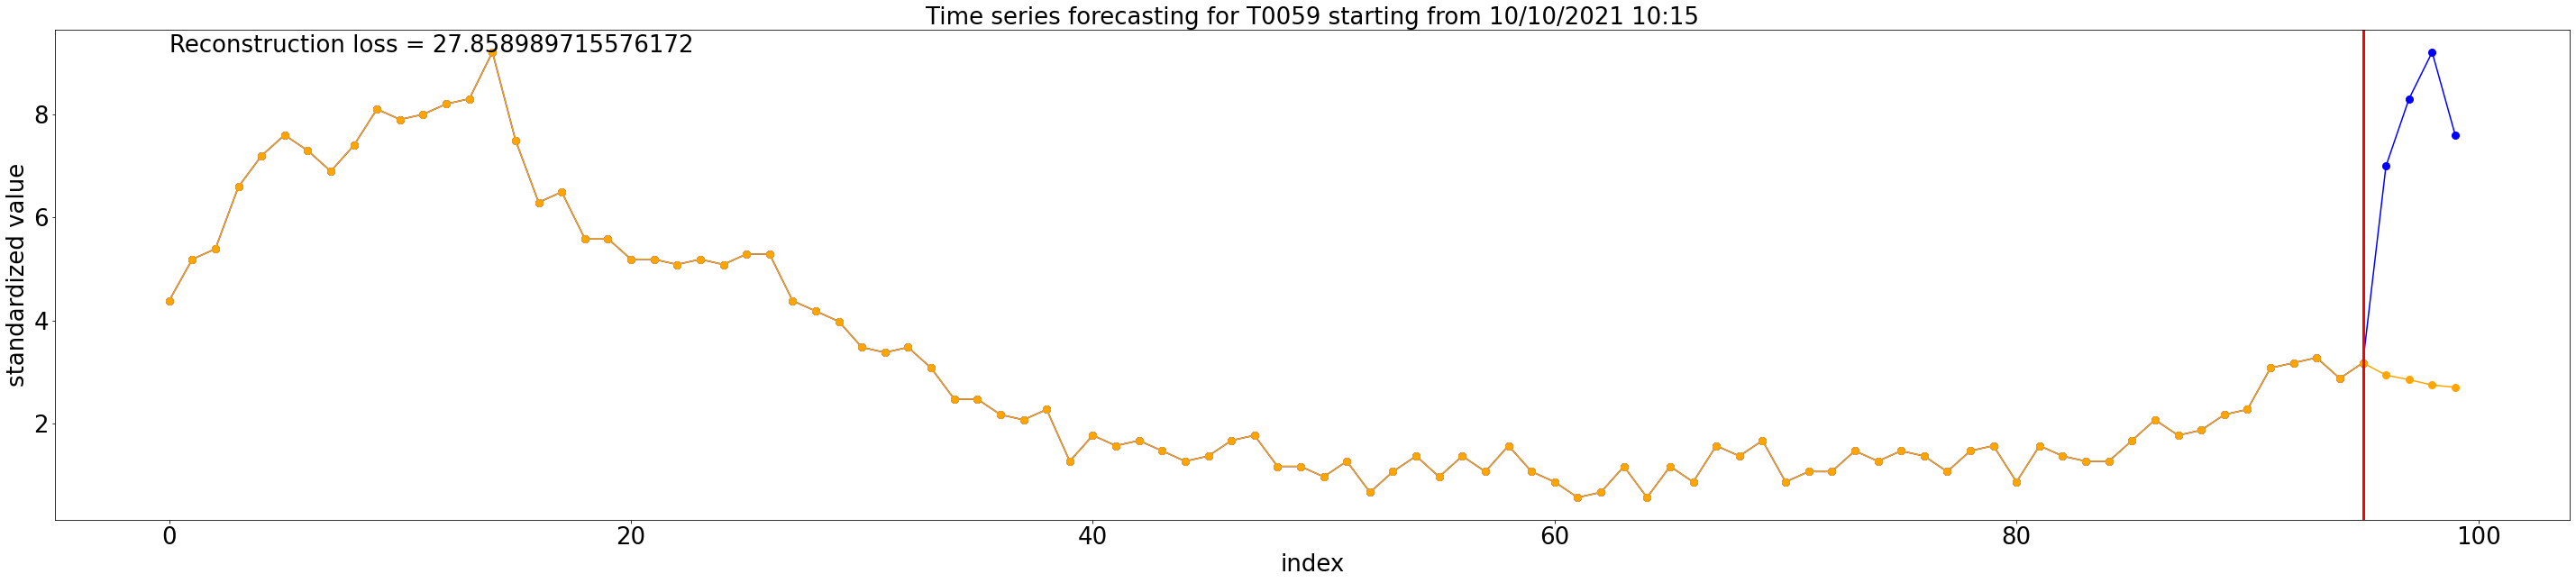

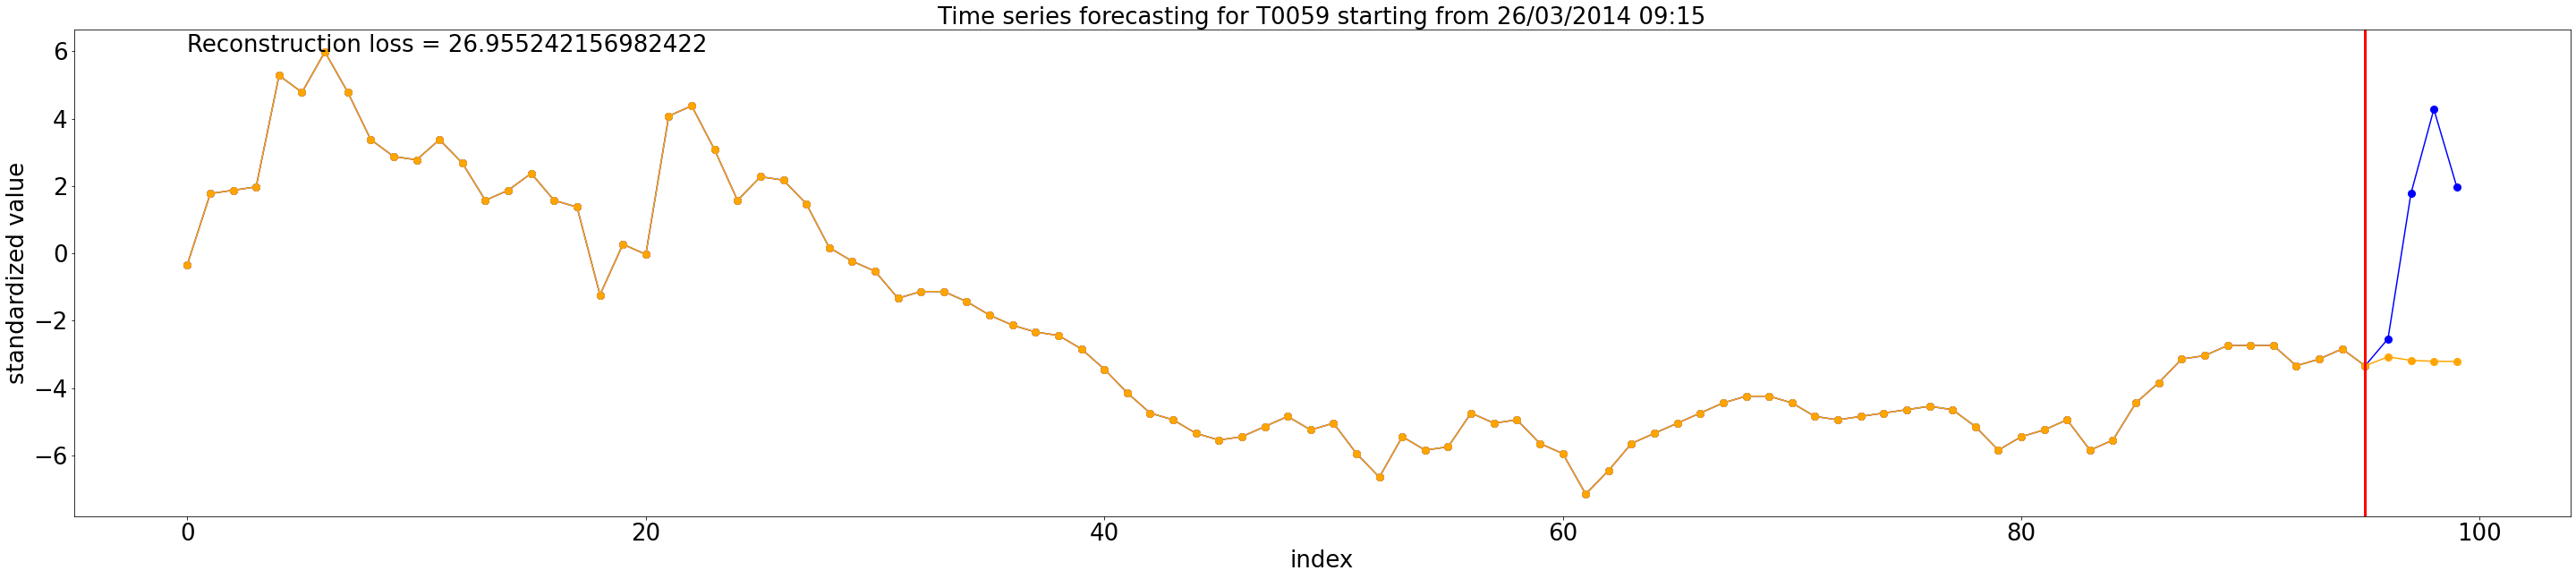

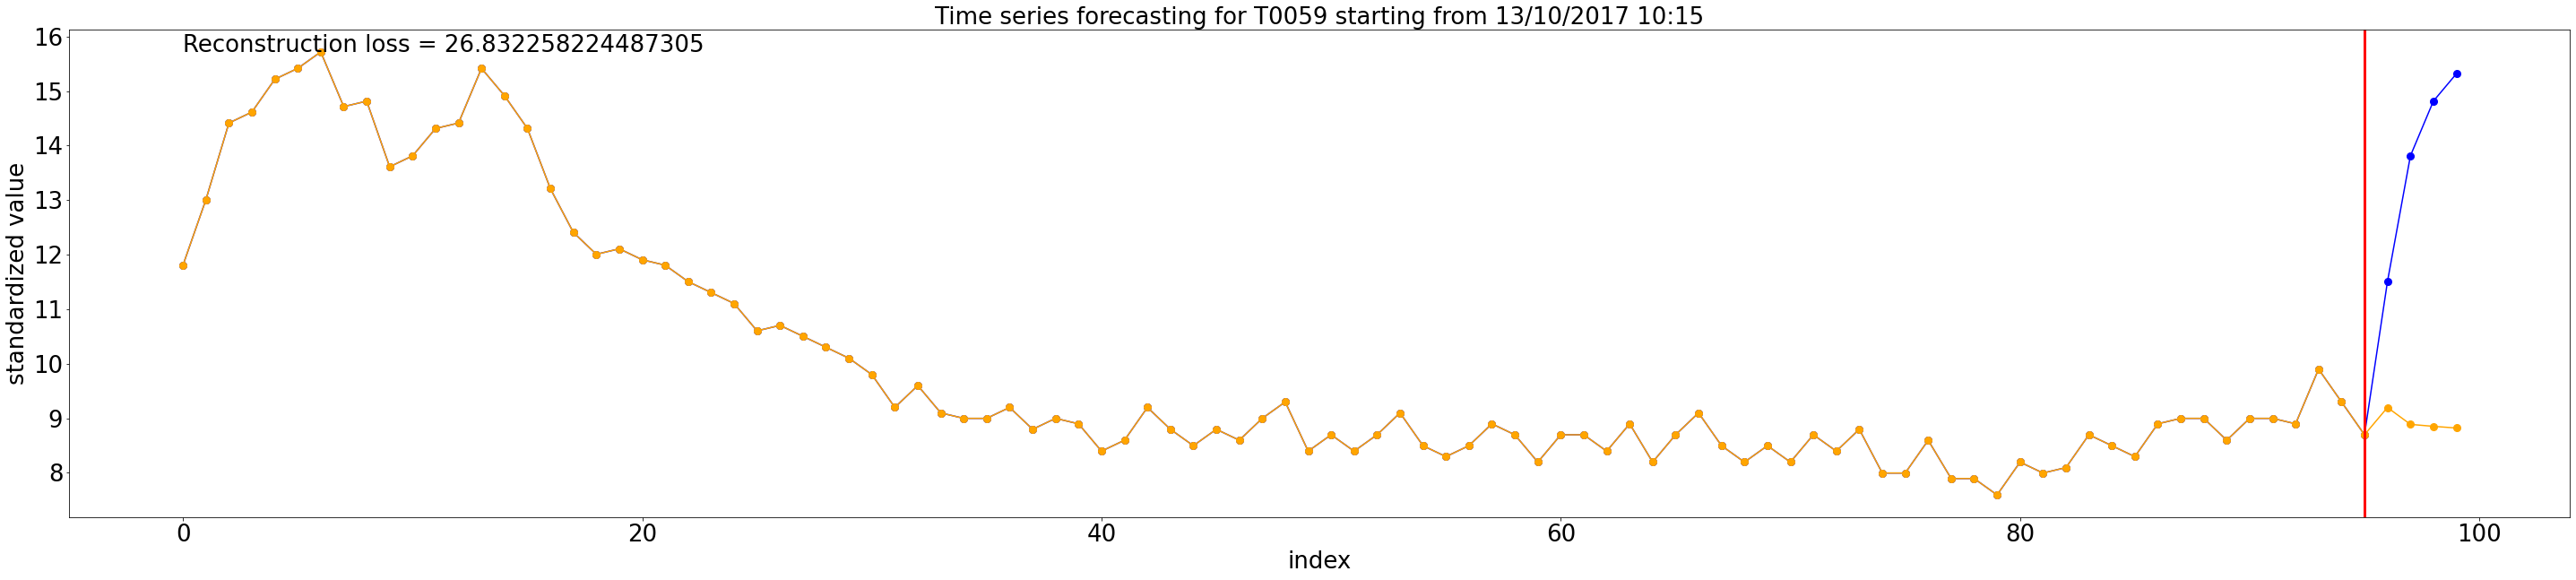

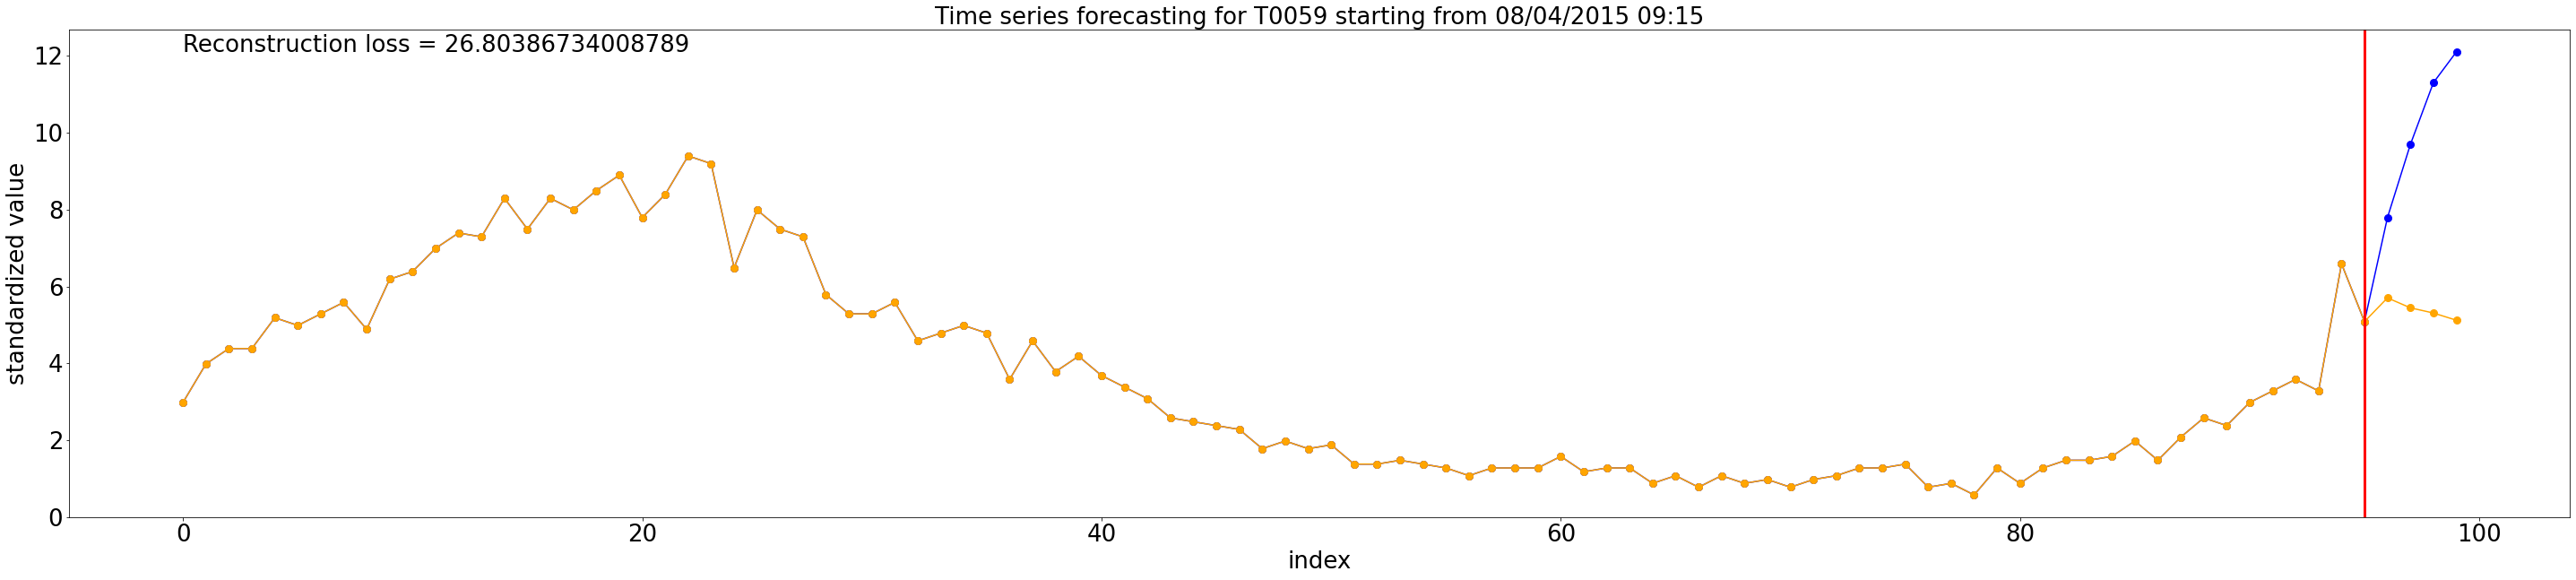

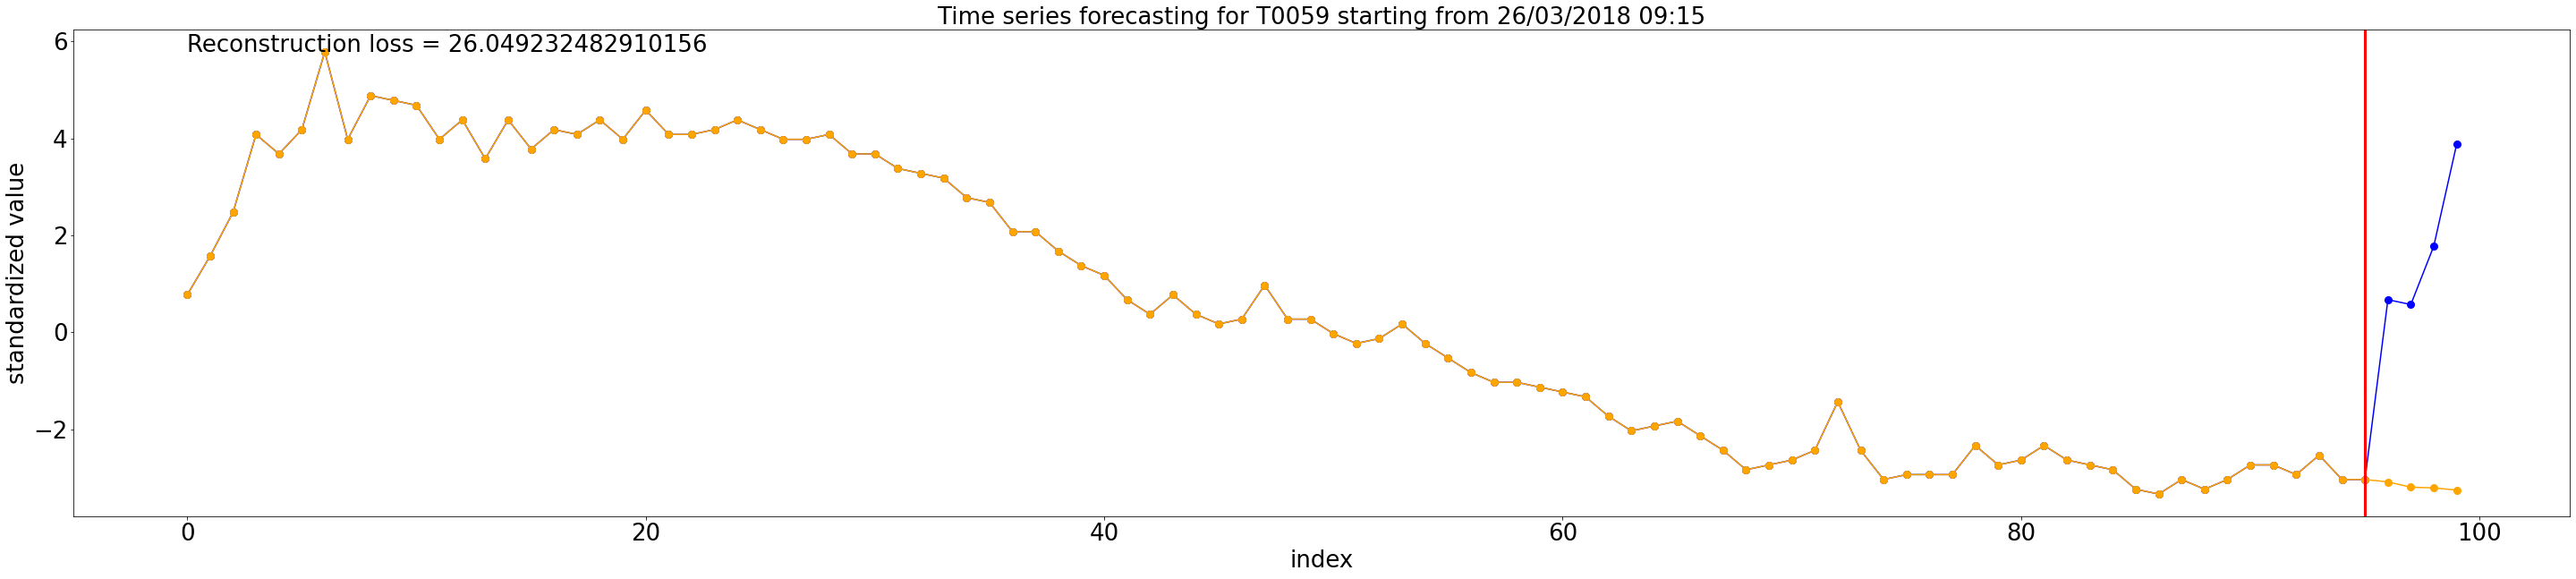

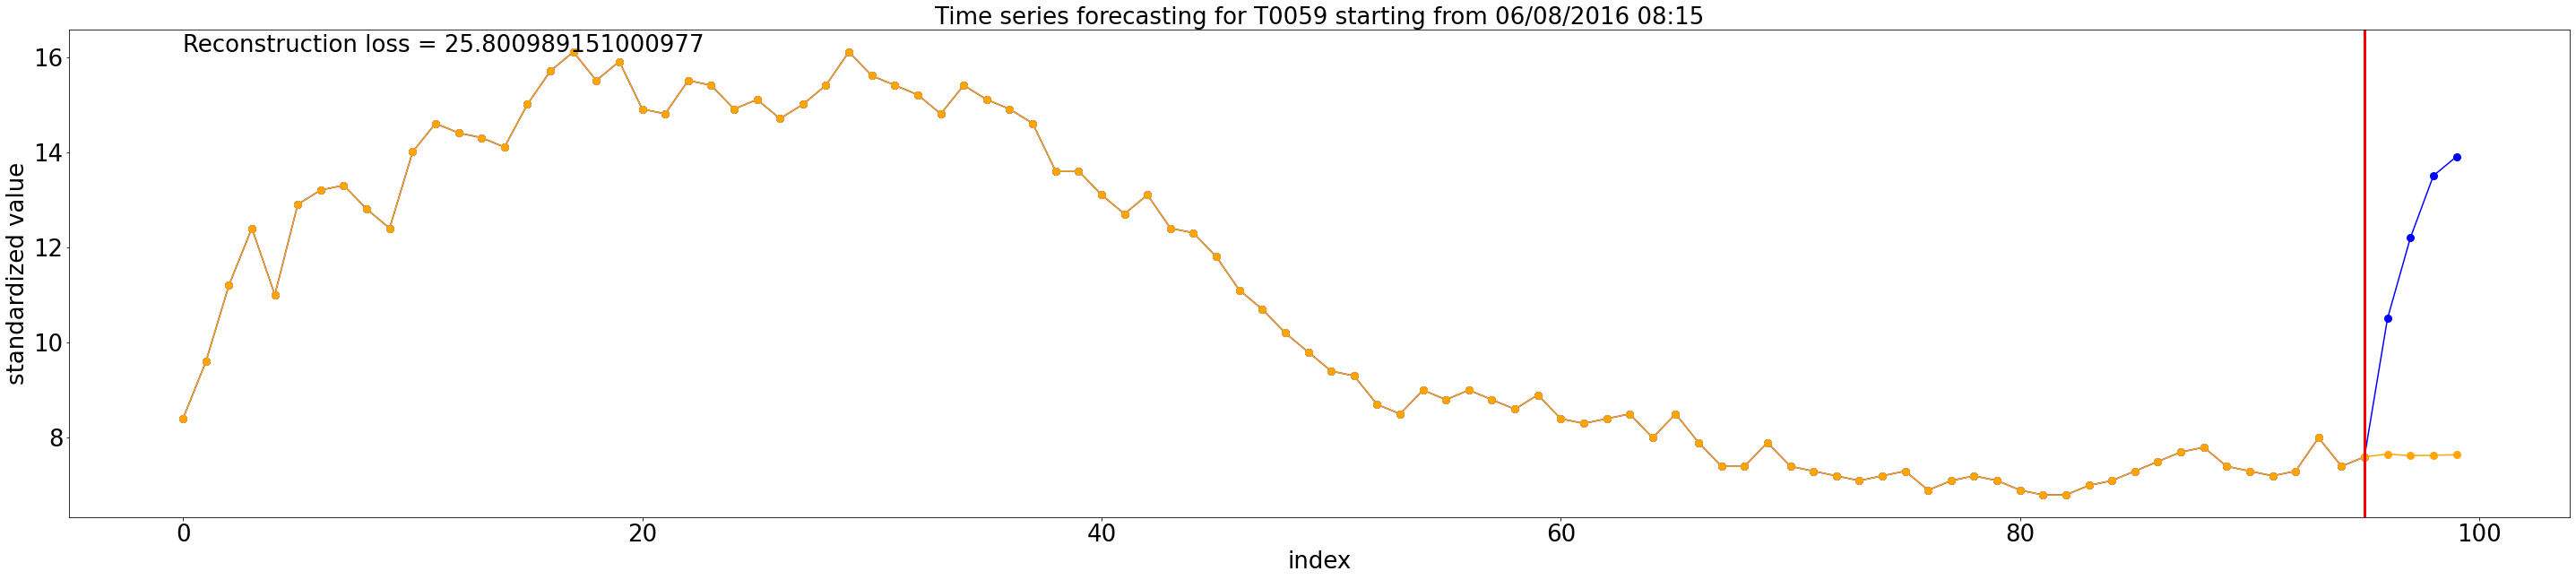

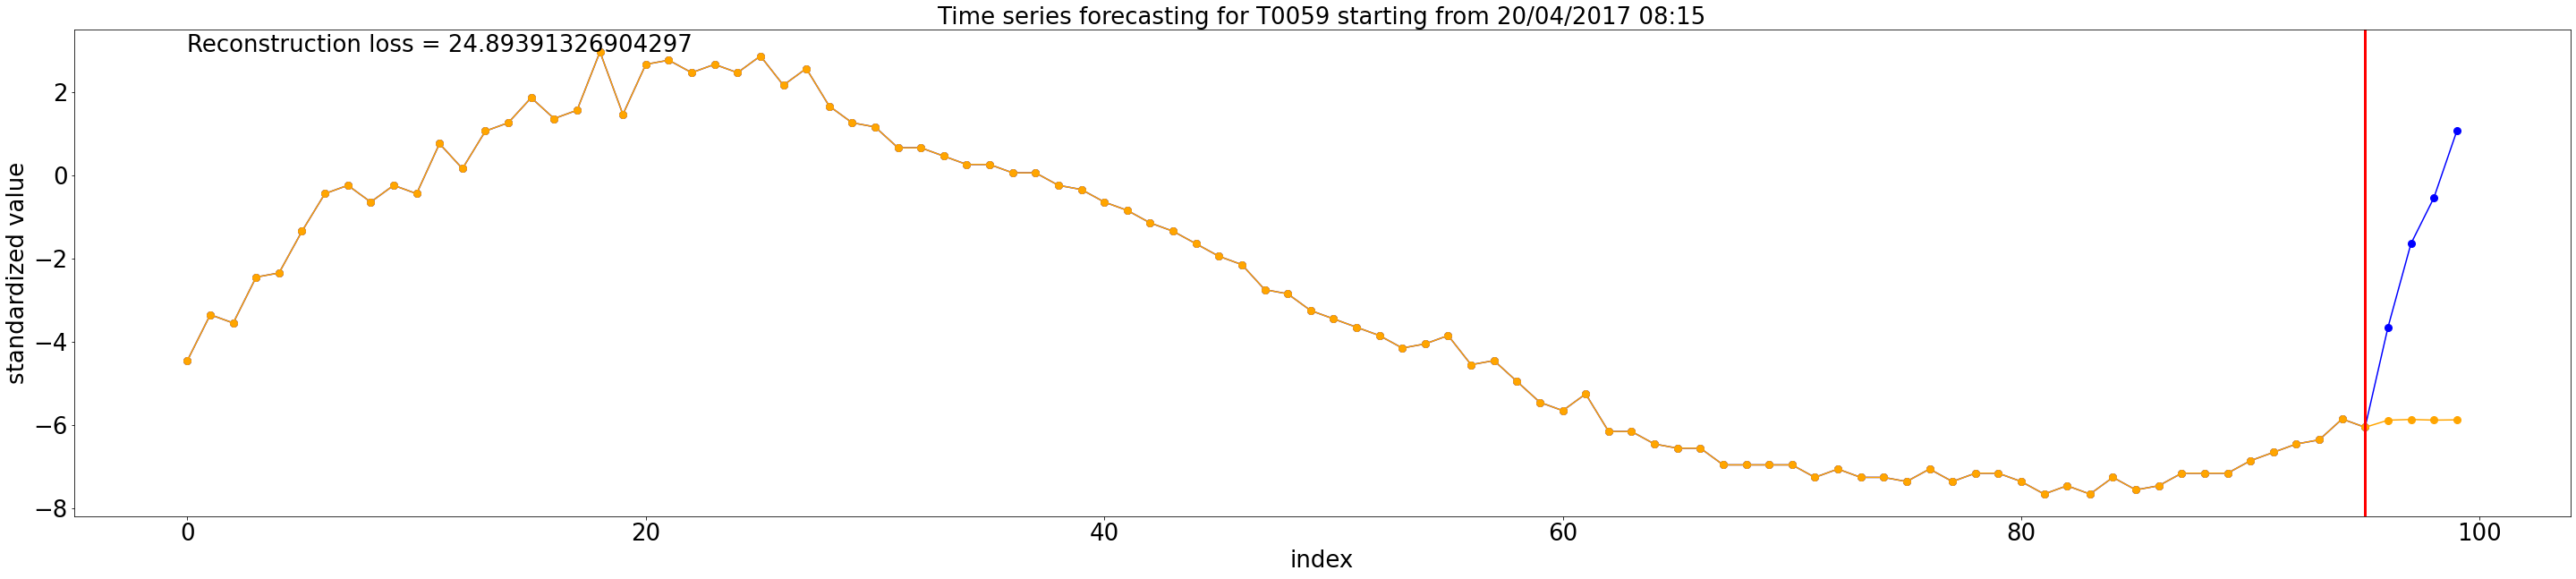

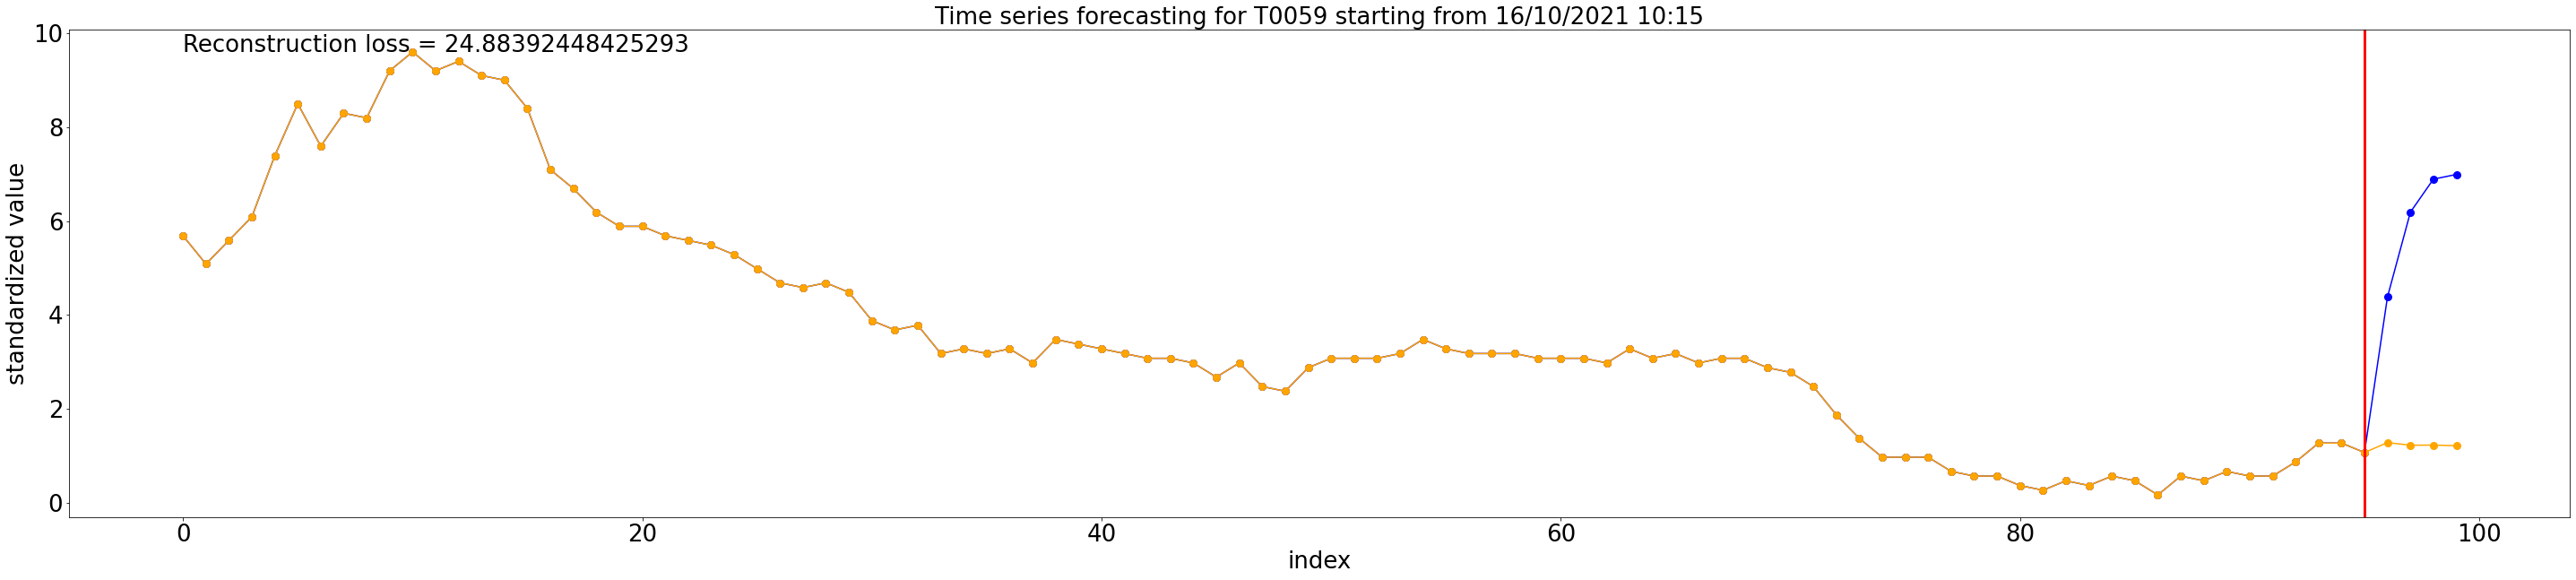

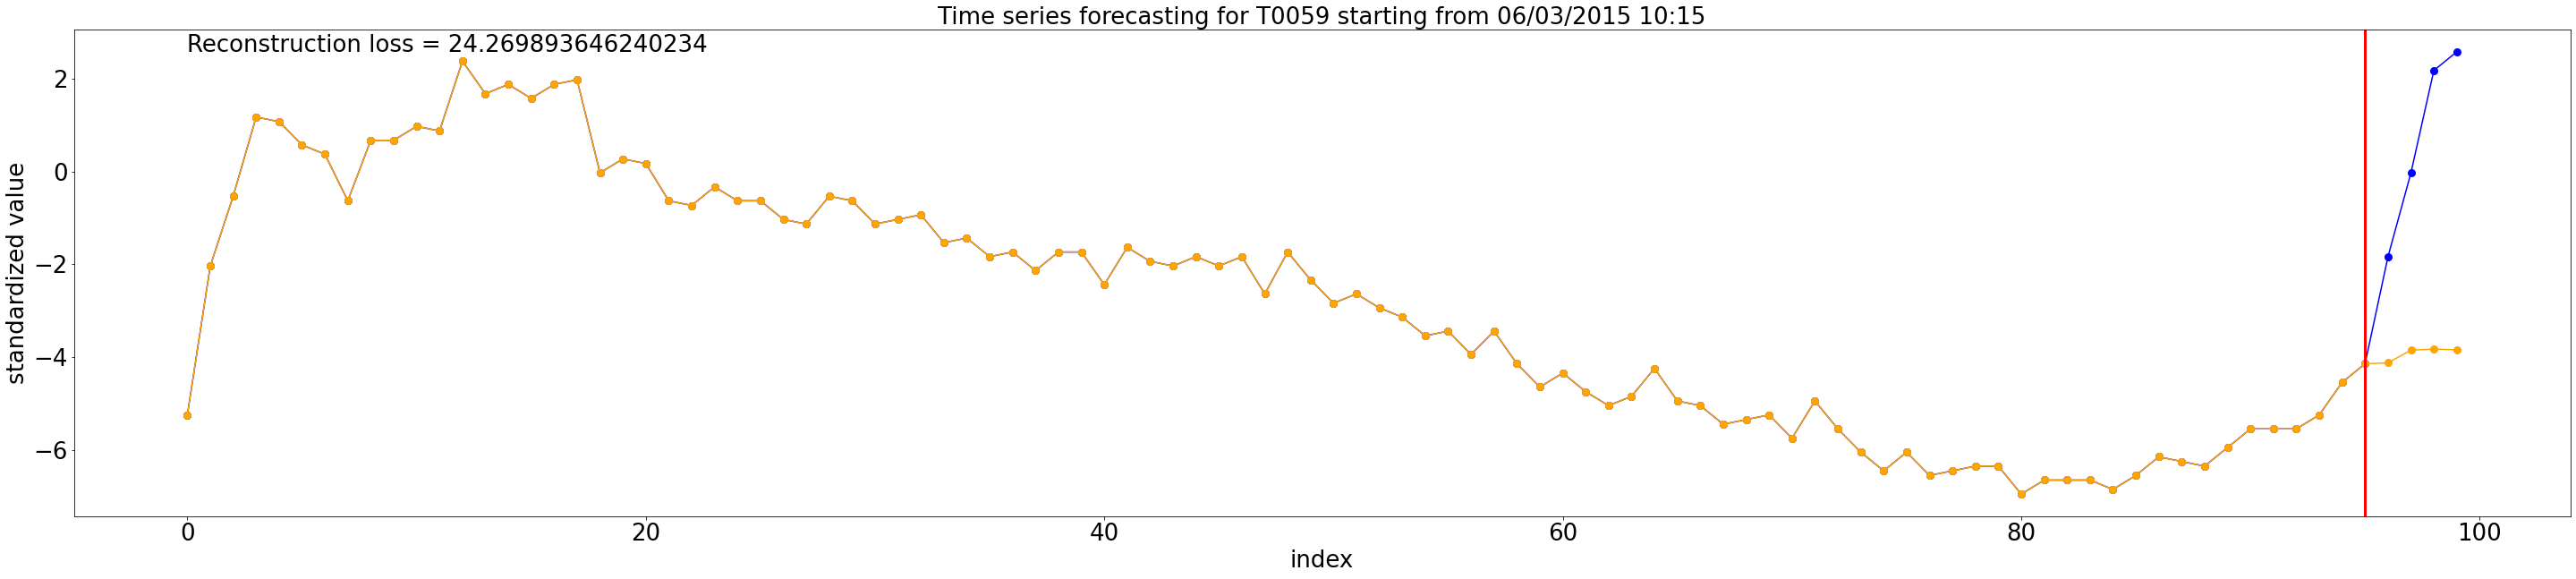

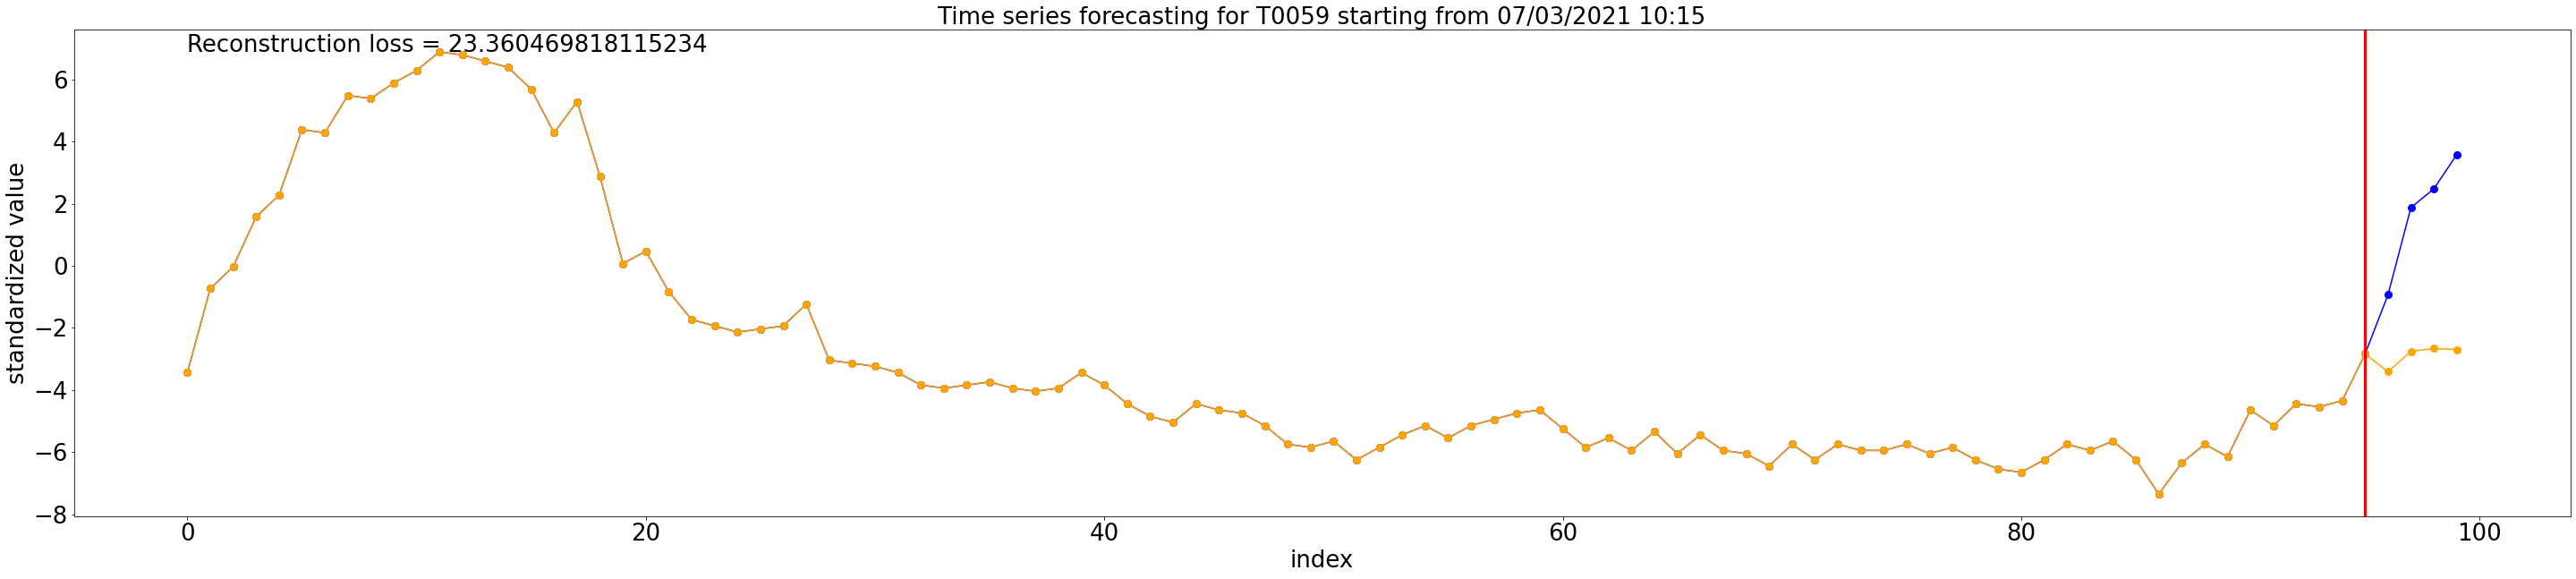

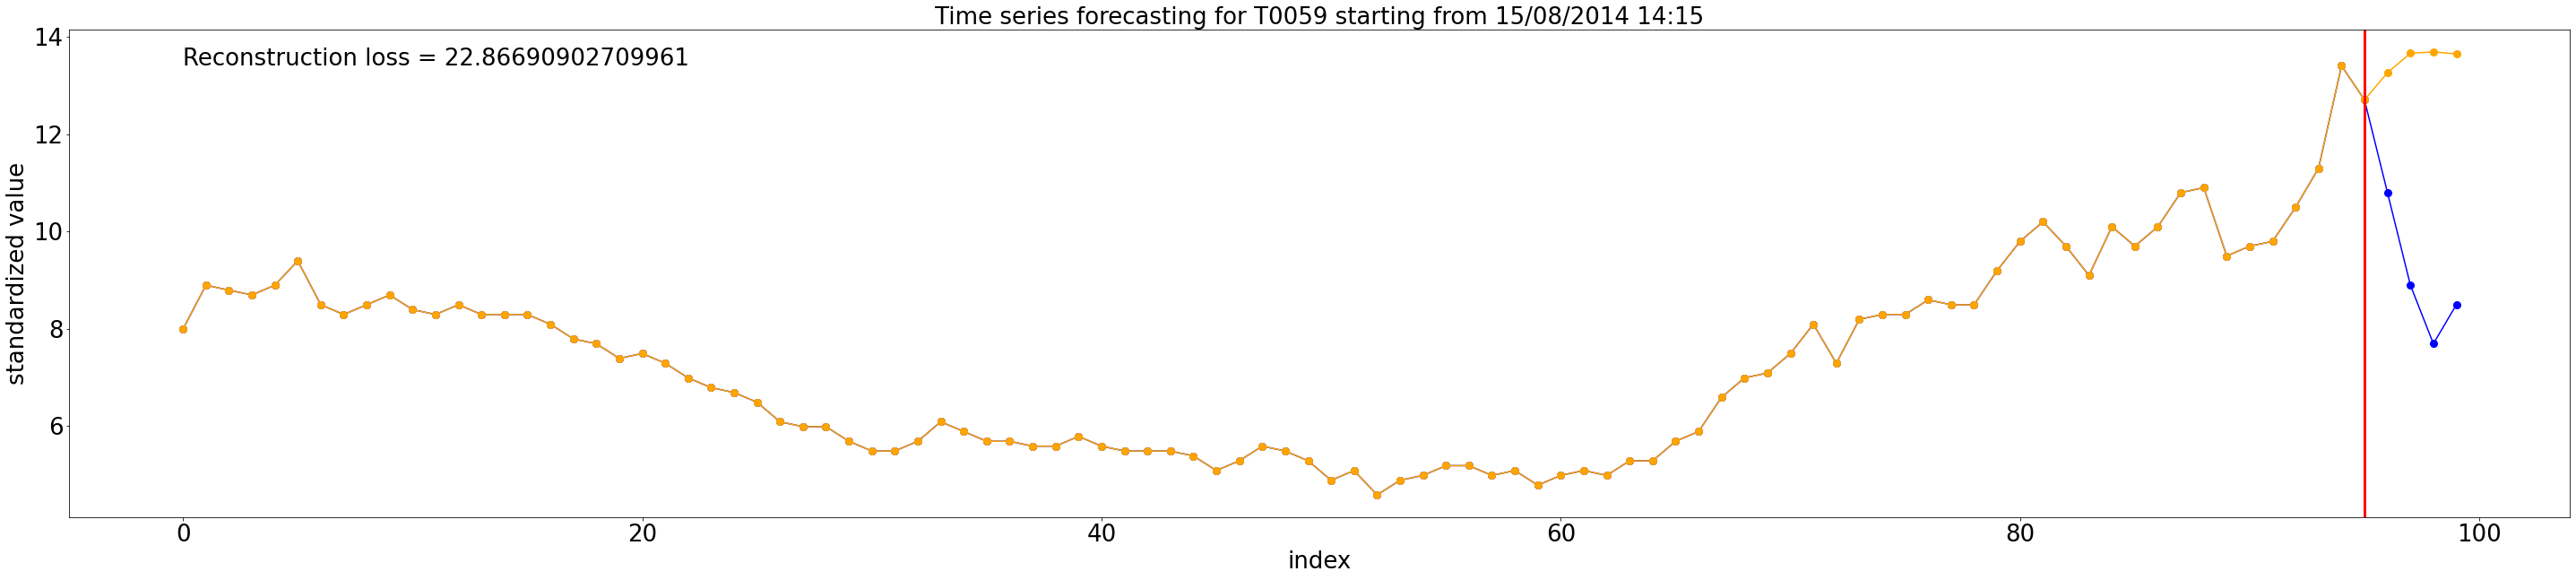

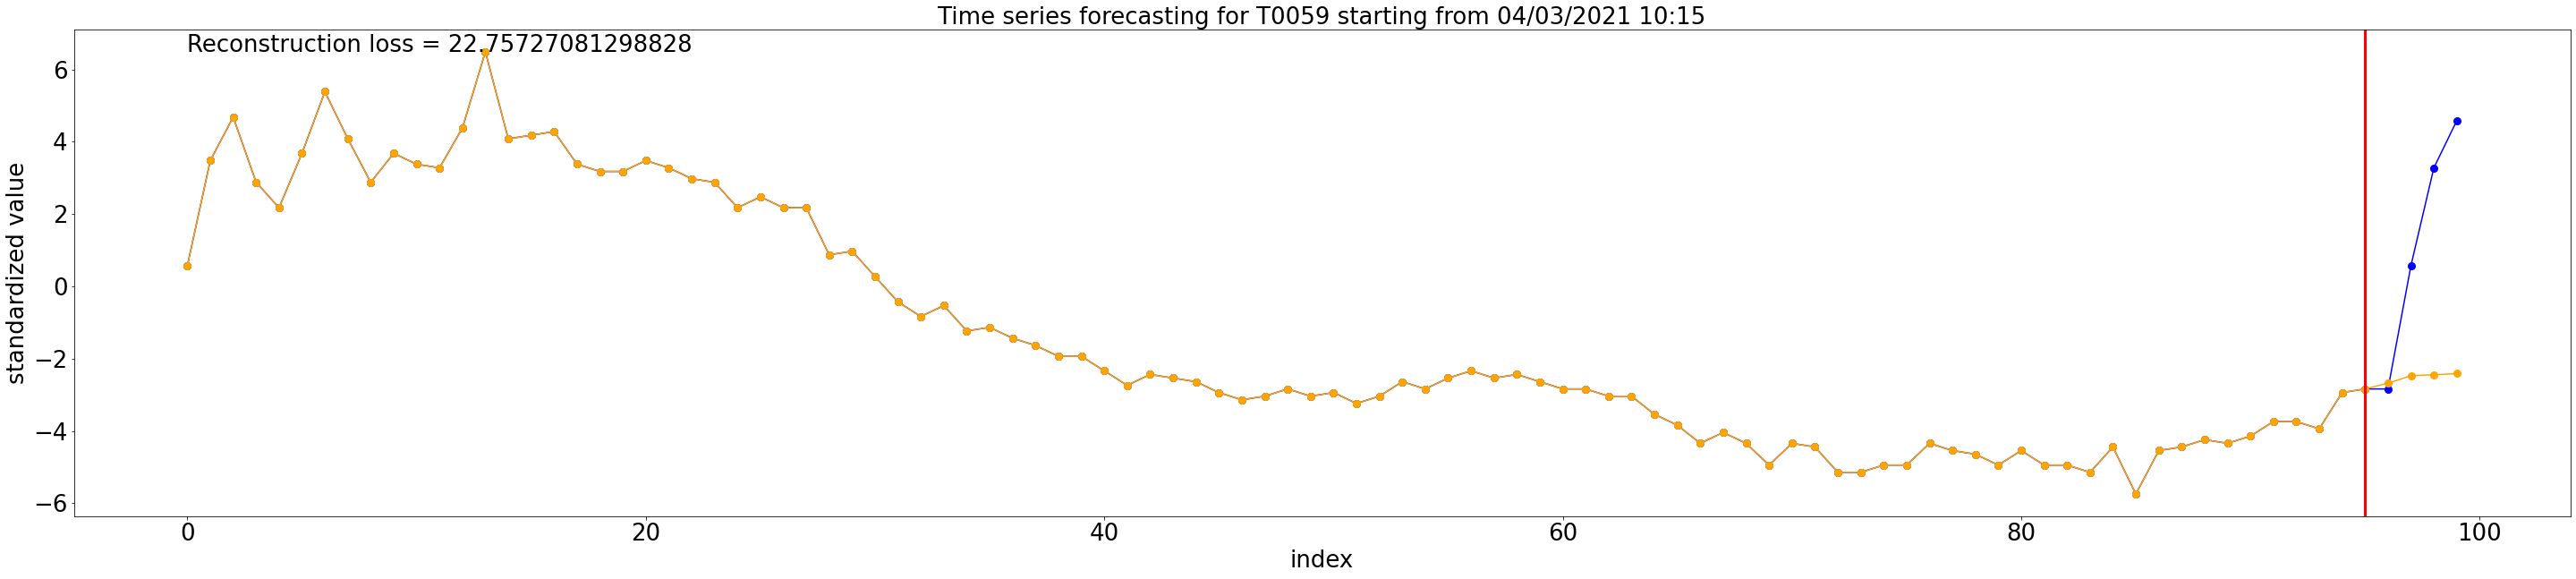

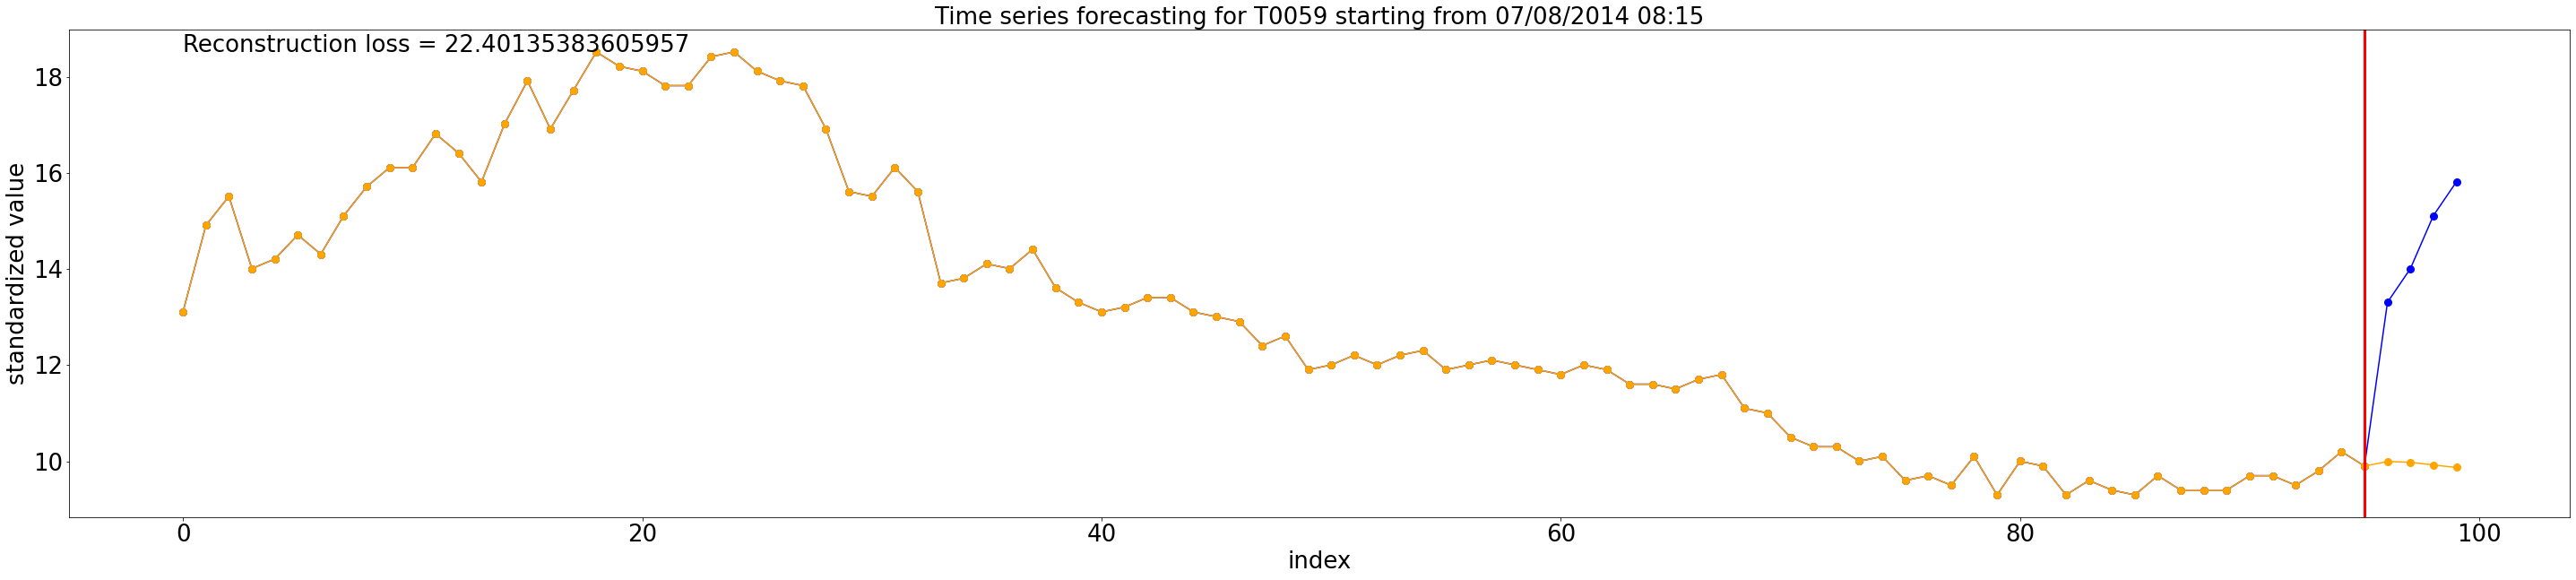

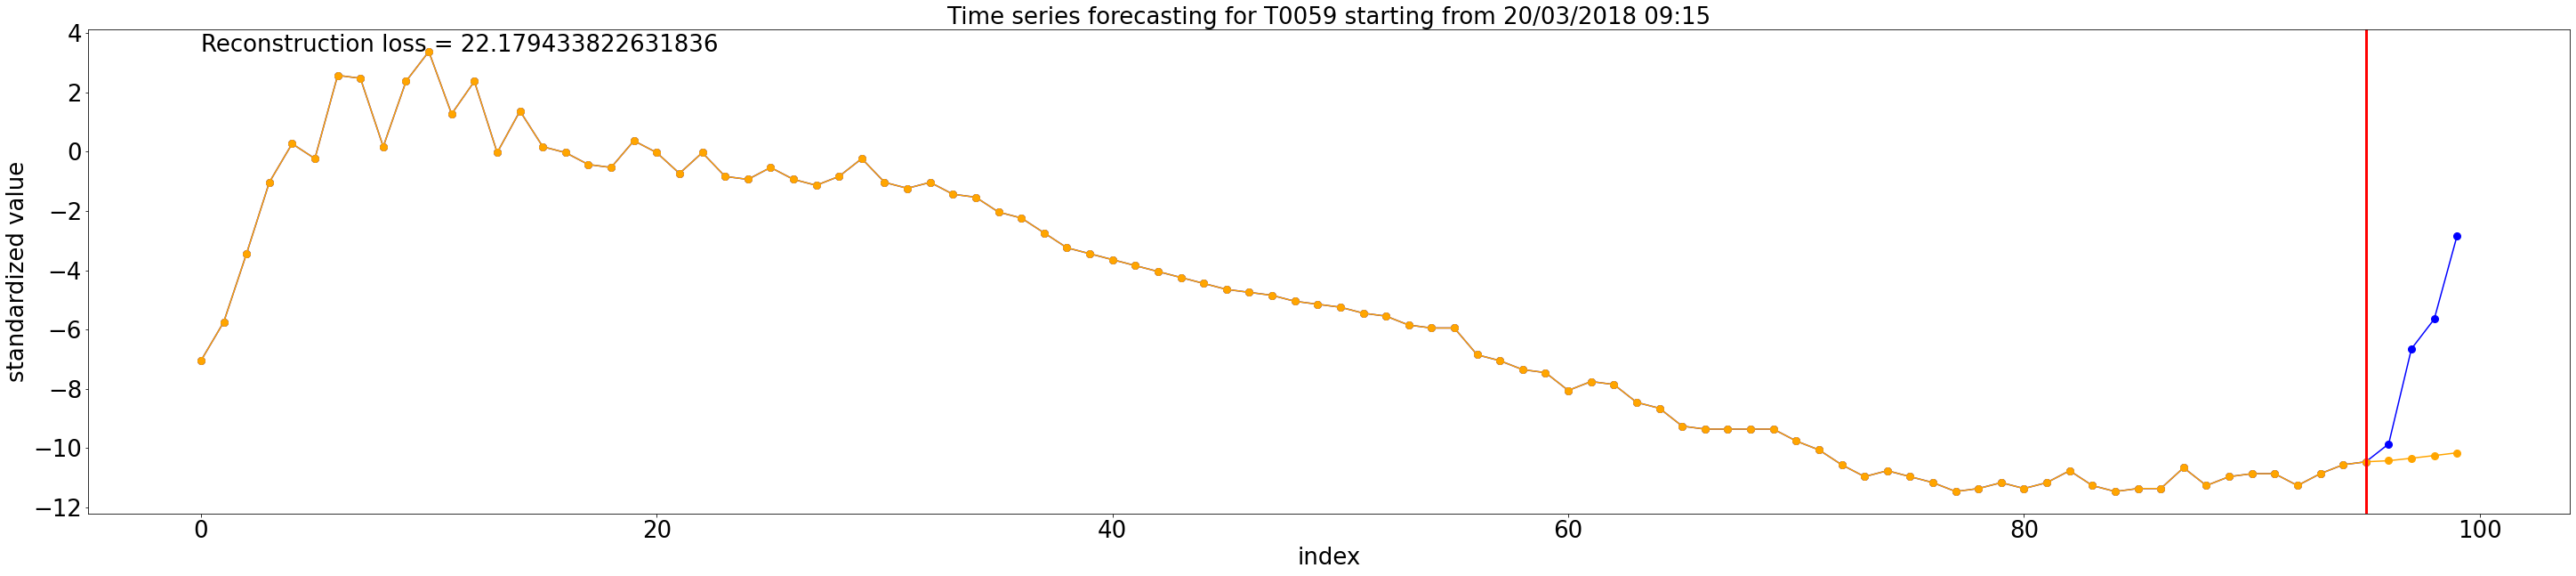

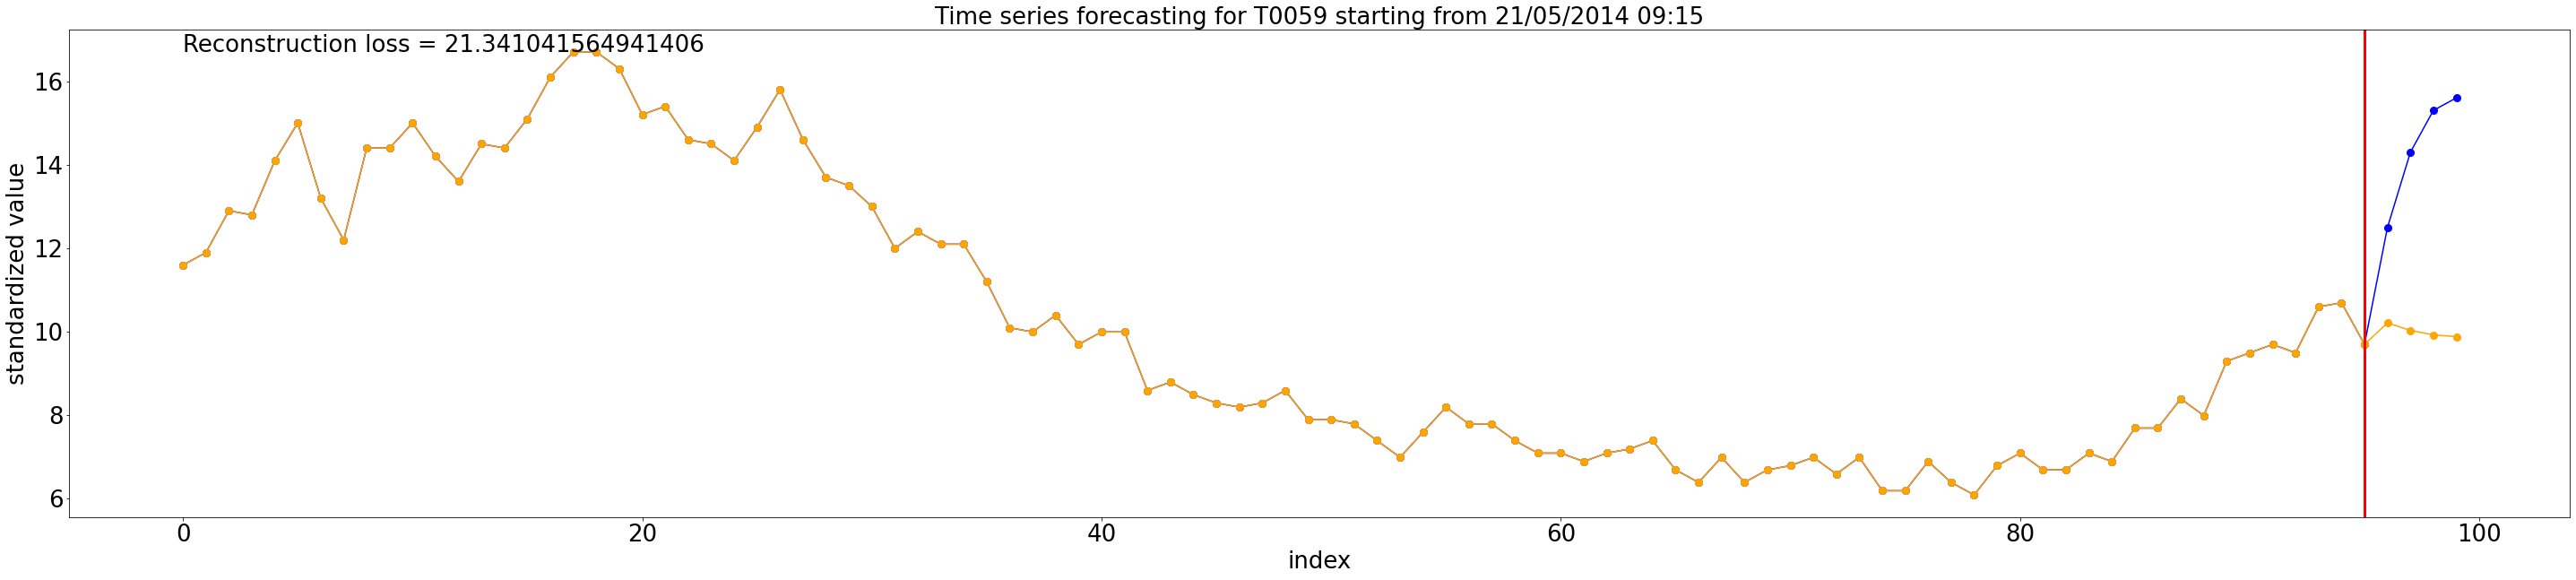

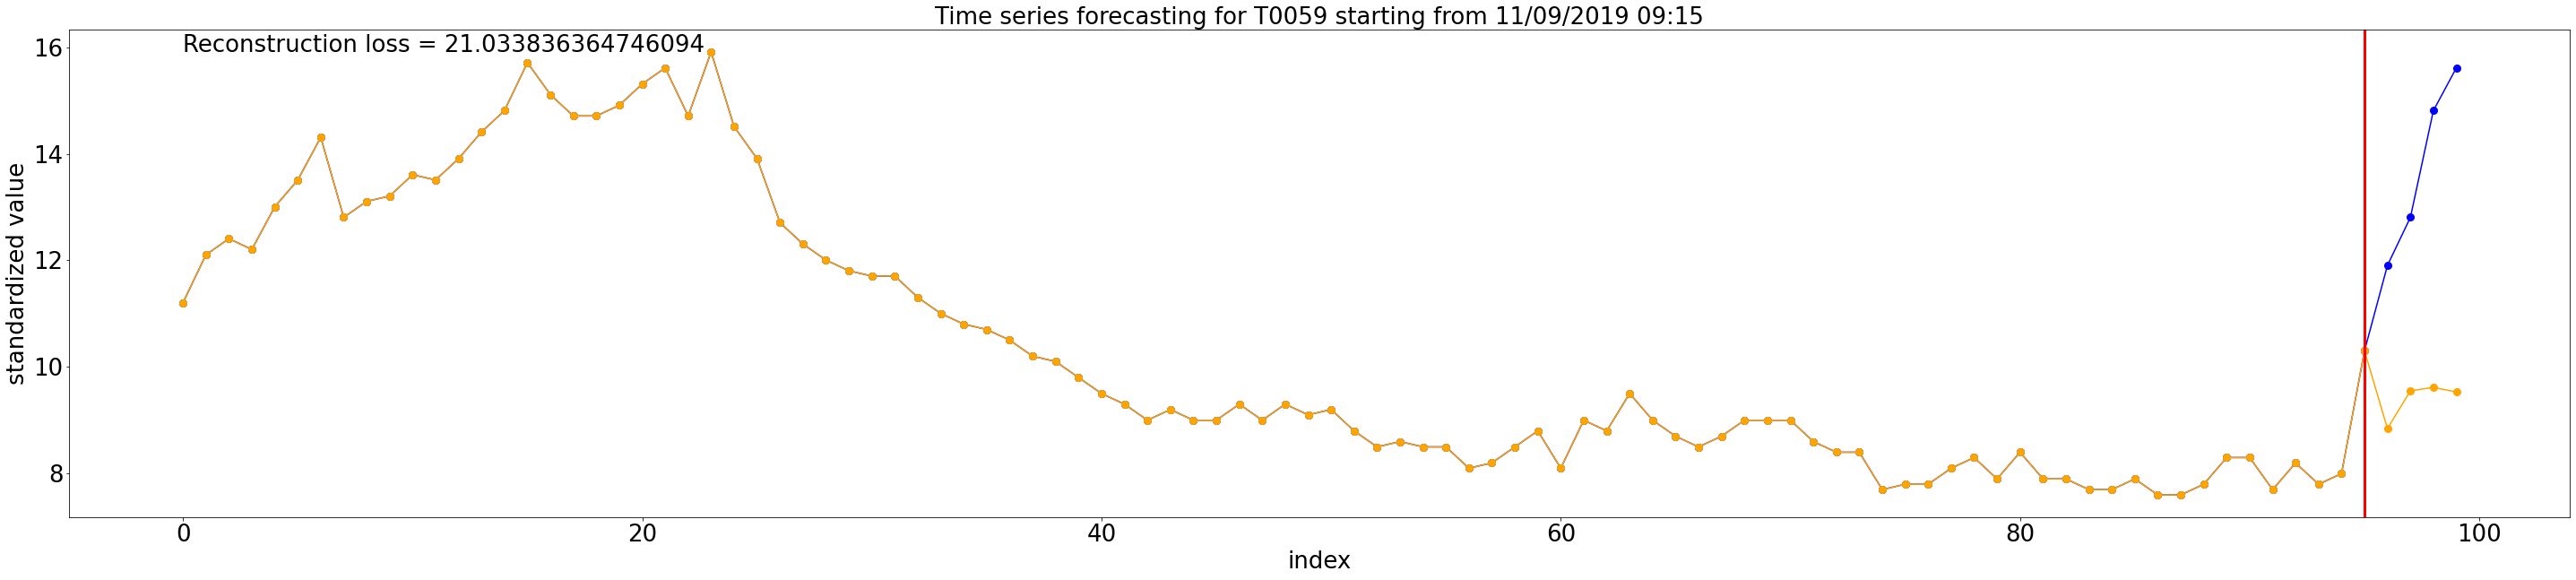

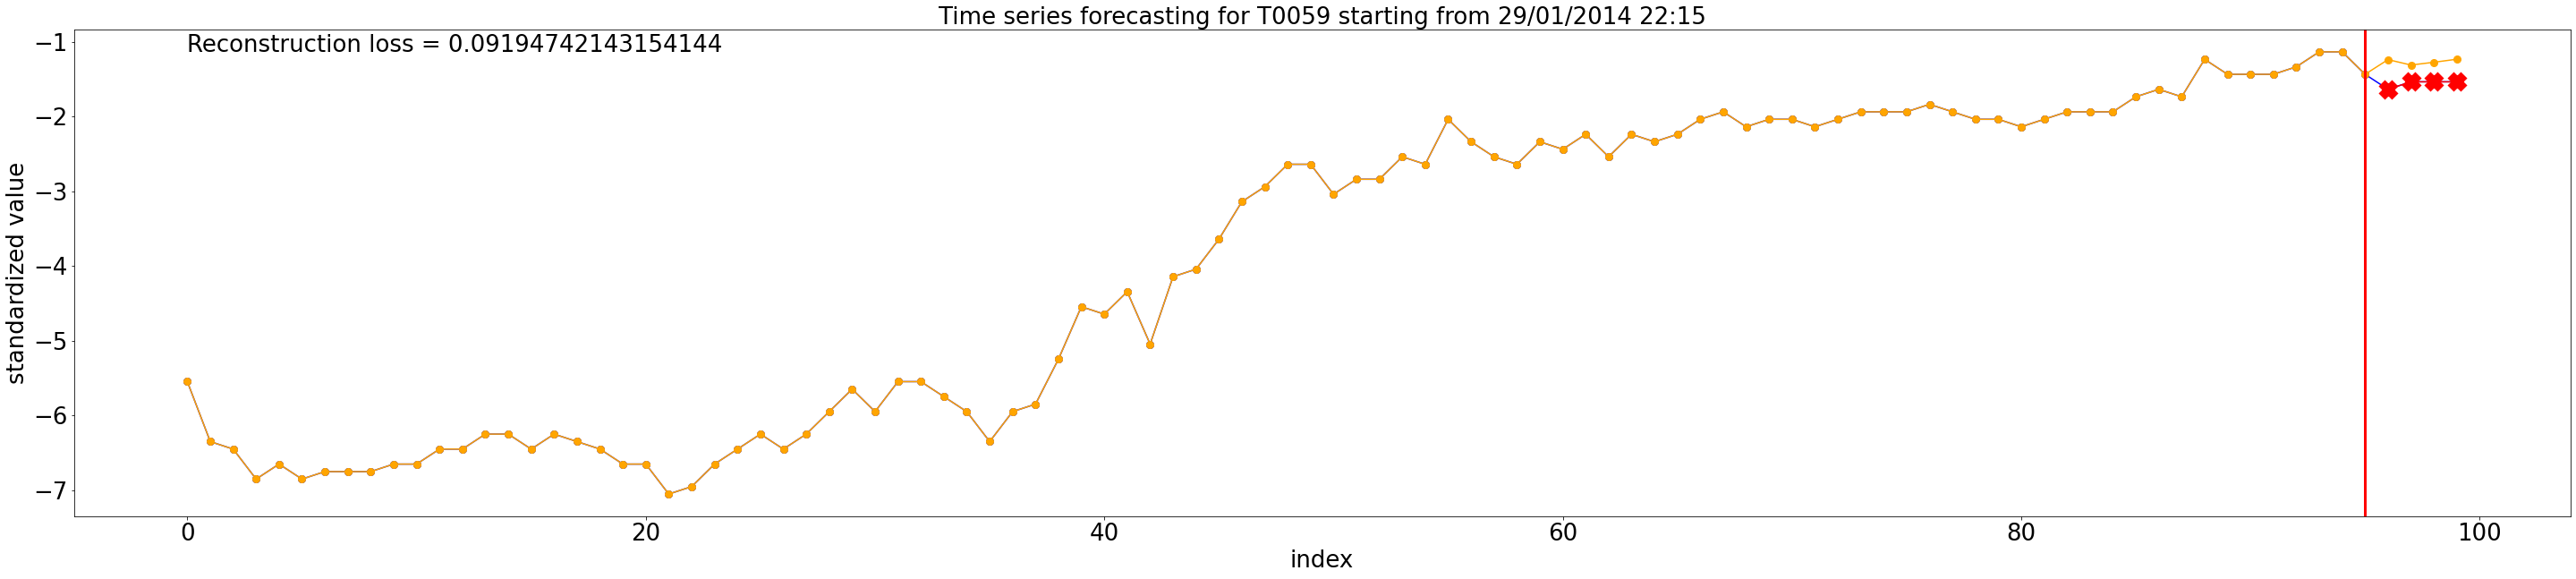

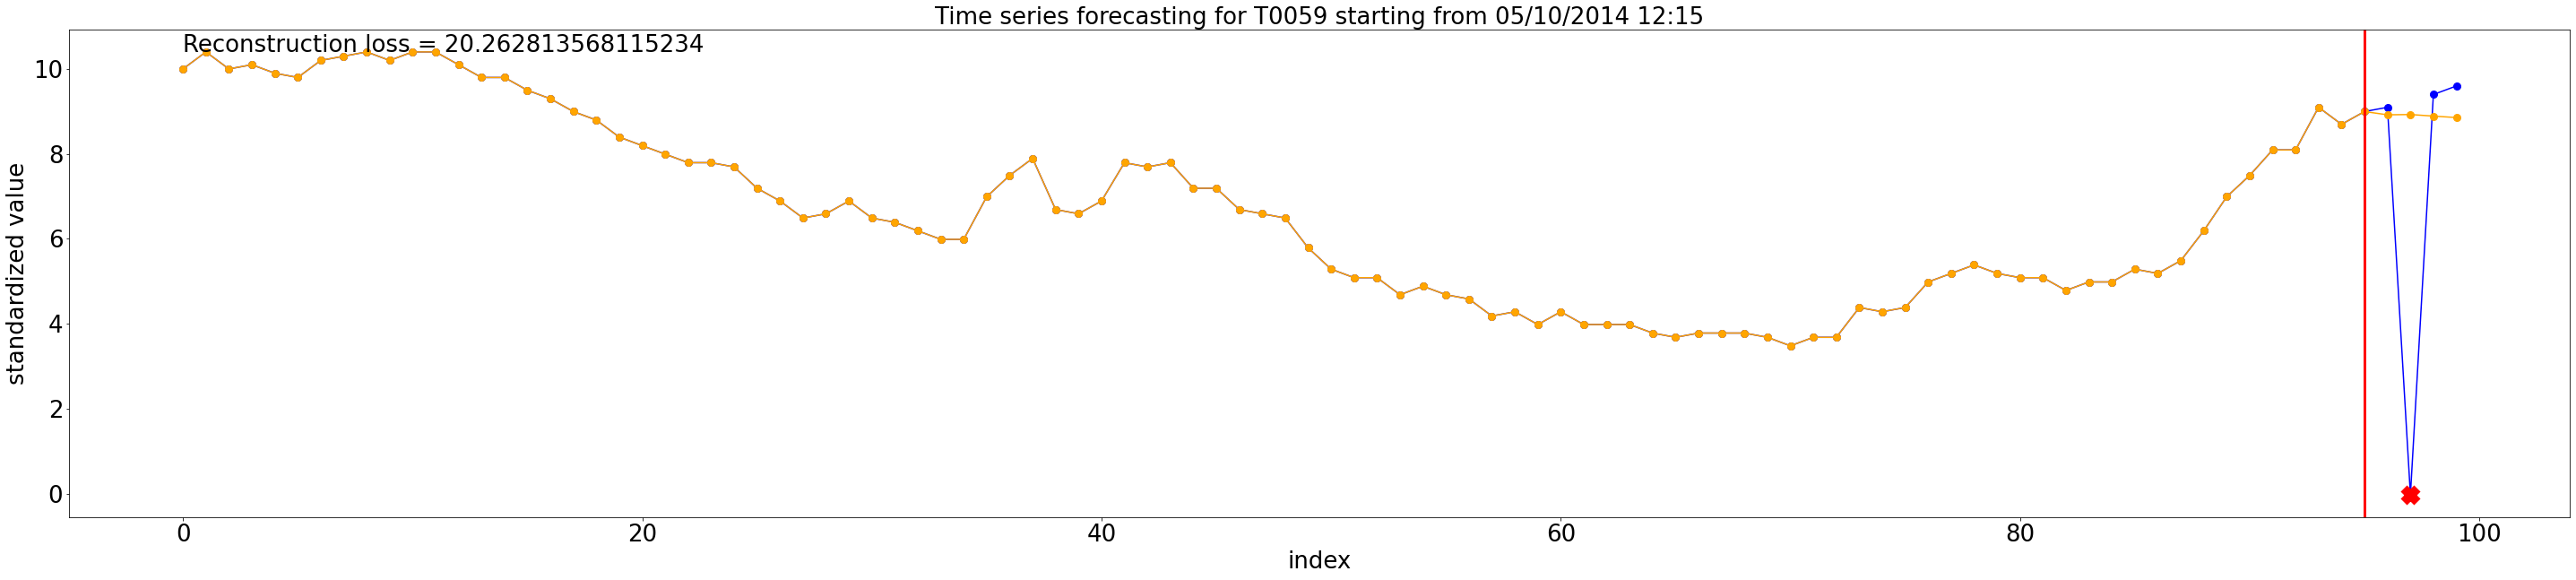

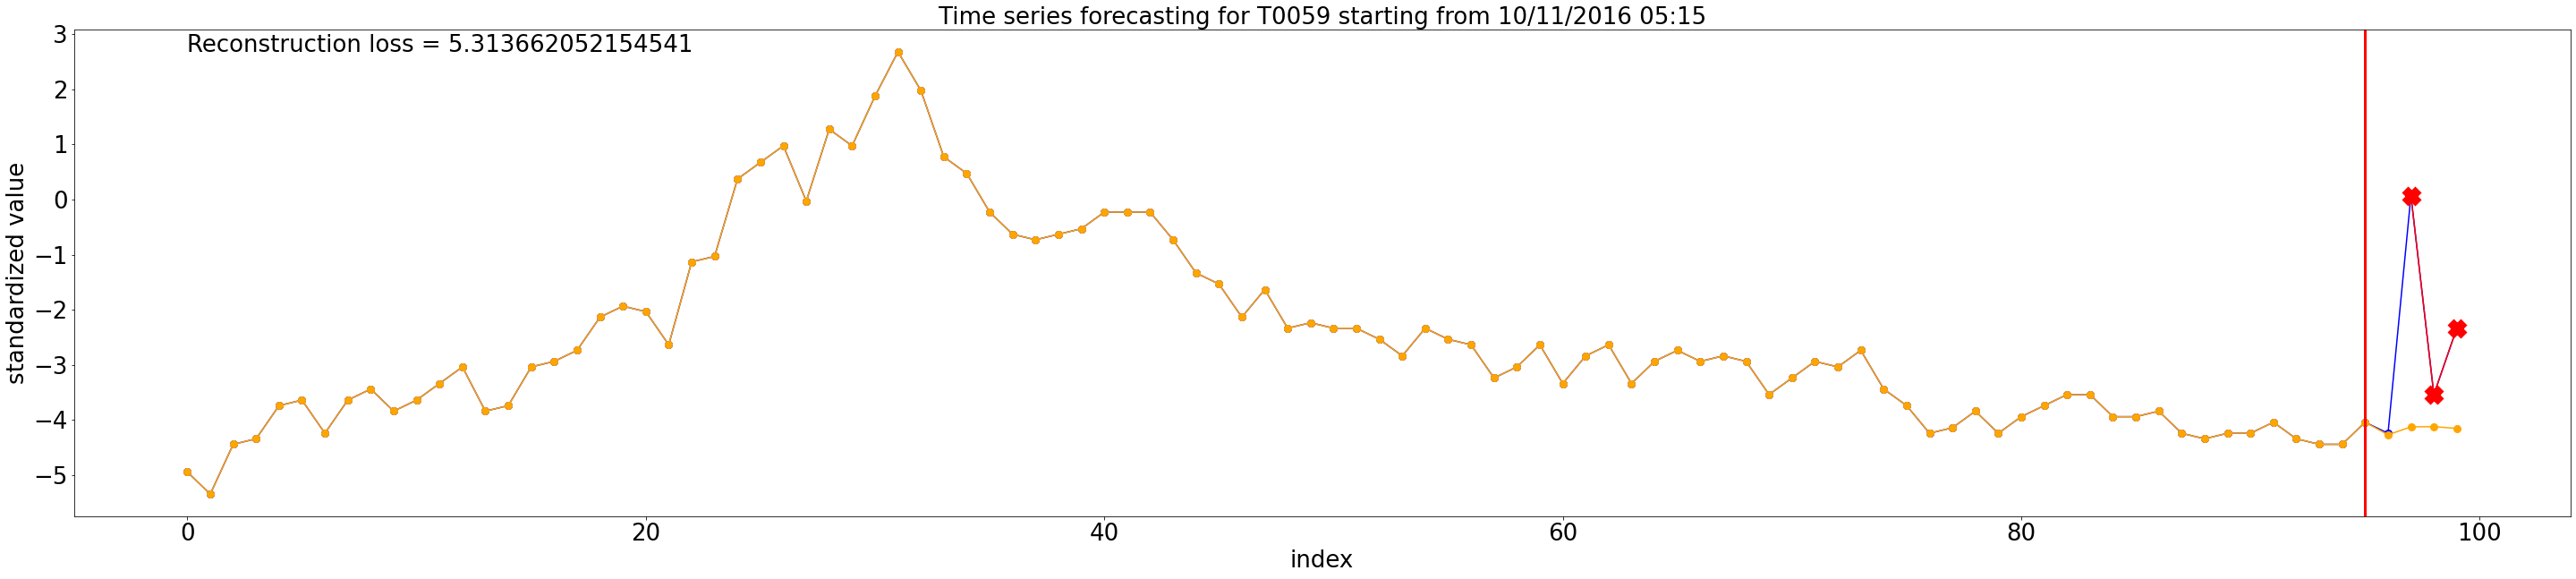

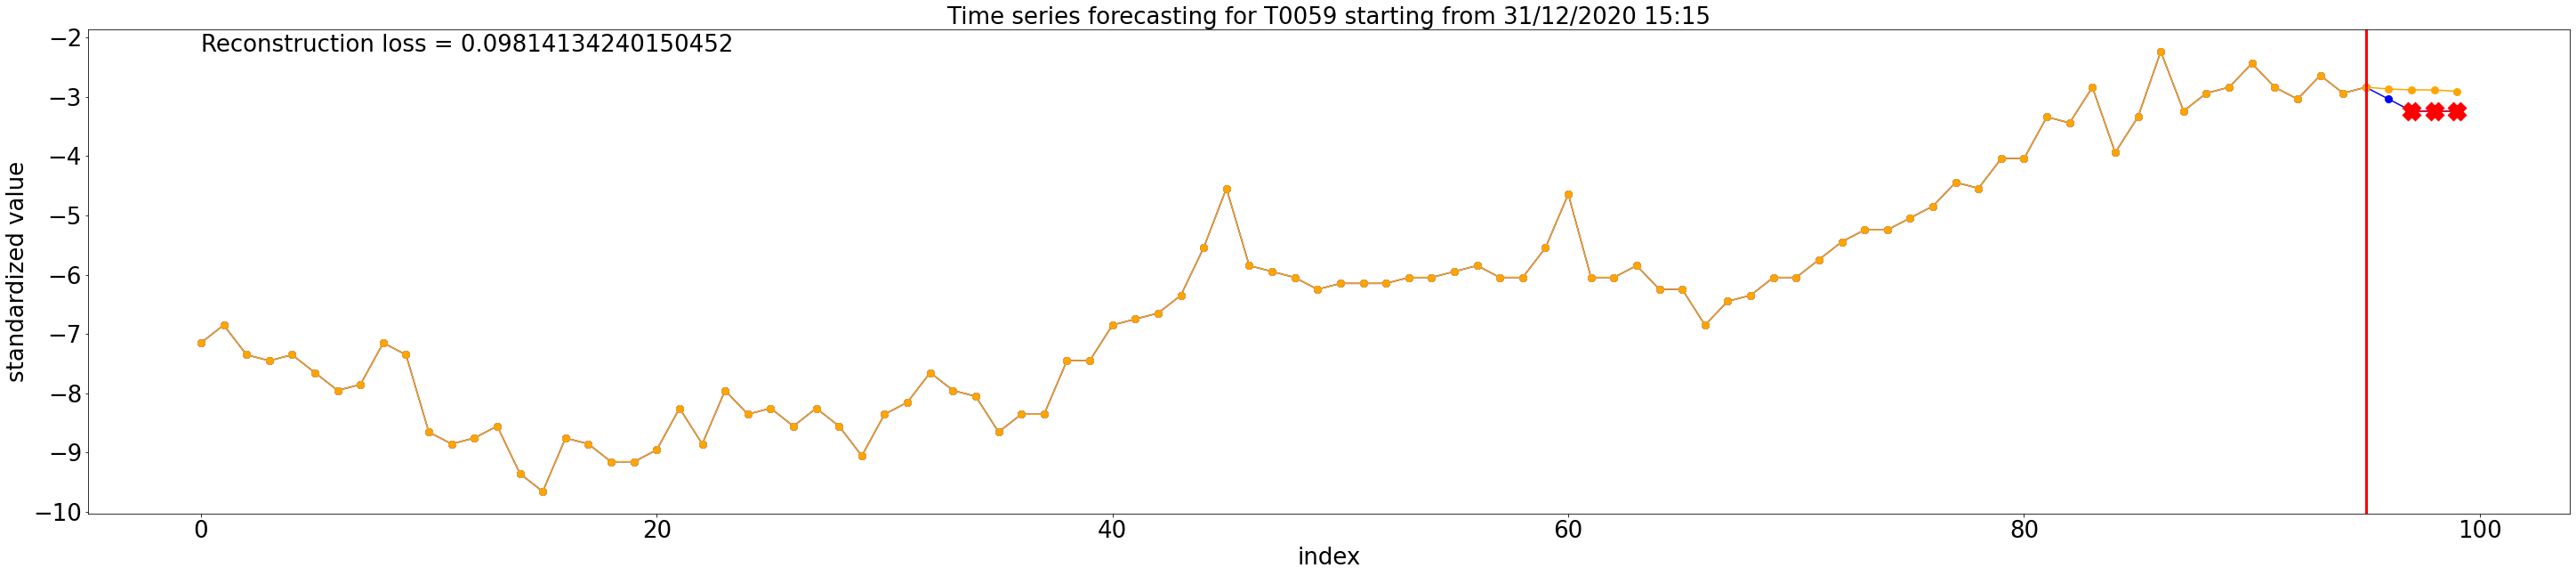

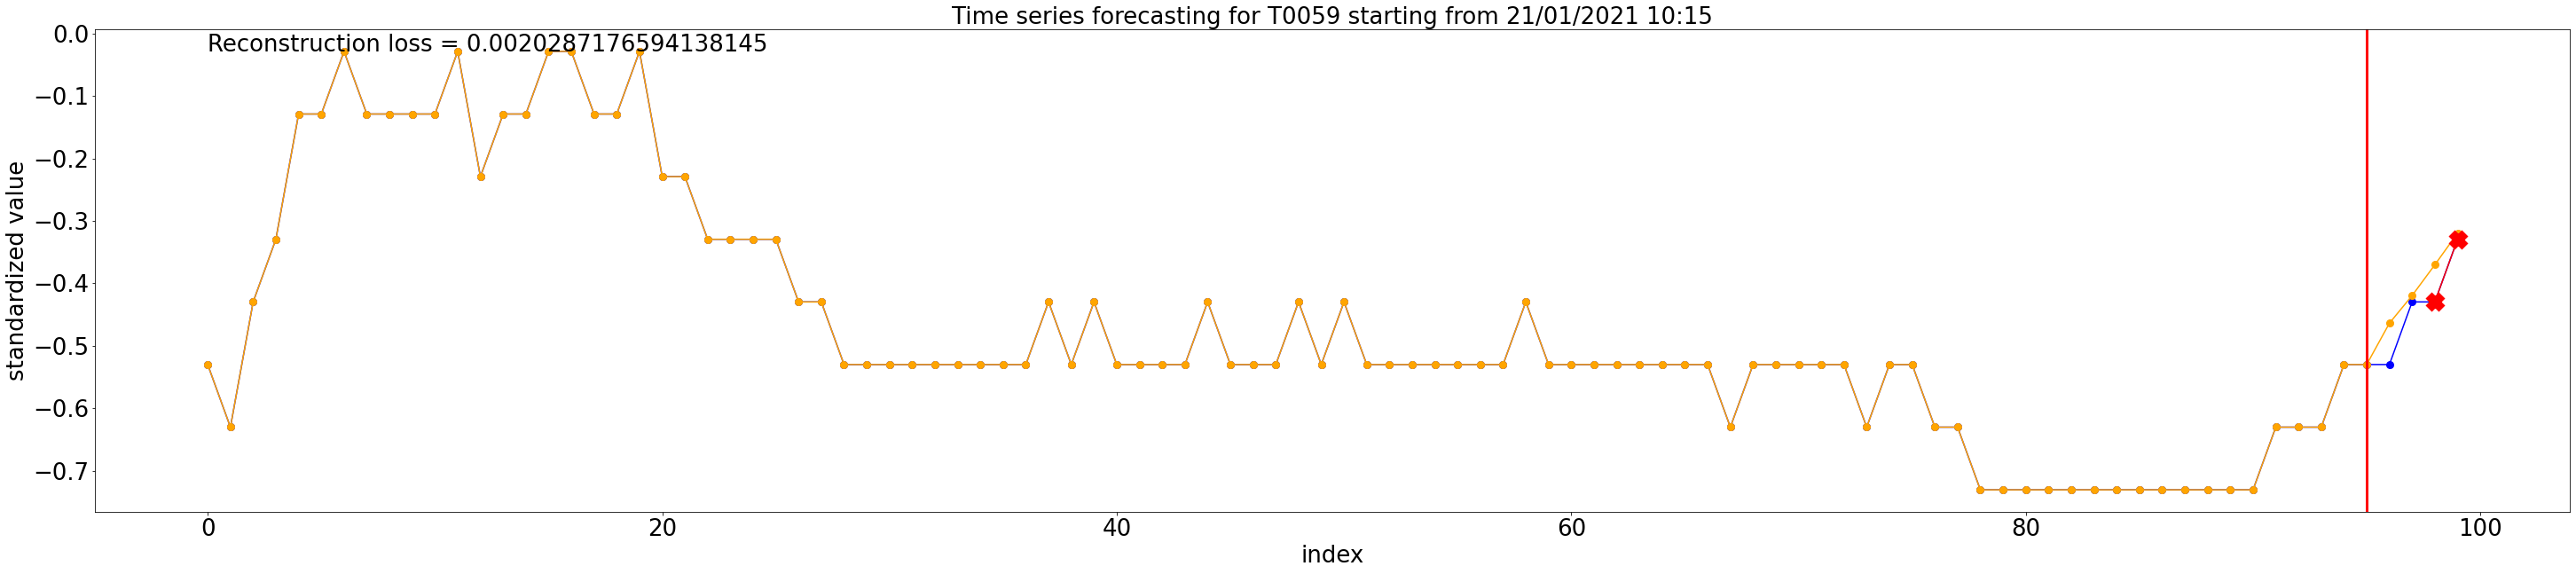

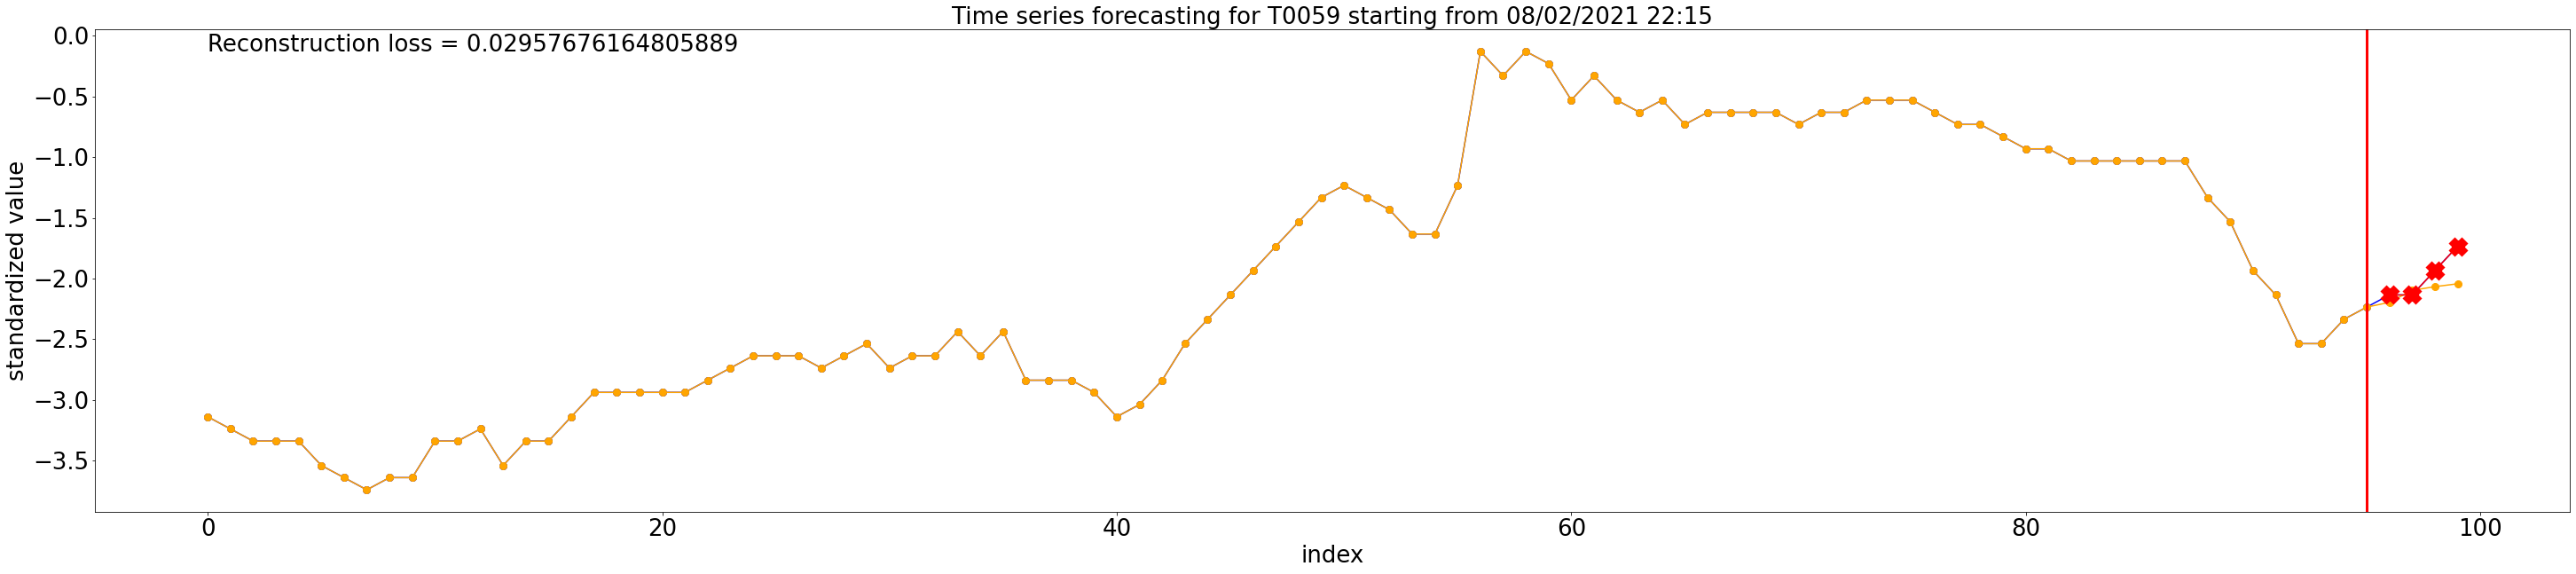

In [202]:
###
### PLOT THE TOP_K_loss EXAMPLES WITH LARGEST LOSS
### AND THE VALIDATED ANOMALIES
###
top_loss_indexes_list = list(top_loss_indexes.cpu().numpy())
# append validated anomalies (to be cleaned)
validated_anomalies = list(np.unique((sample_tensor_validation != 1).nonzero(as_tuple=True)[0].numpy()))
top_loss_indexes_list.extend(validated_anomalies)
ts_len = sample_tensor_features.size(1)

for i in top_loss_indexes_list:
  f = plt.figure()
  f.set_figwidth(50)
  f.set_figheight(10)
  # single_date = str(date[i])
  plt.title(f'Time series forecasting for {sensor_code} starting from {date[i]}' ,fontsize = 26)
  plt.ylabel('standardized value',fontsize=26)
  plt.xlabel('index',fontsize=26)
  plt.xticks(fontsize=26)
  plt.yticks(fontsize=26)
  
  # find the outliers according to the validation
  y_outliers = np.where(sample_tensor_validation[i].to("cpu") == 1, np.NaN, (sample_tensor_target[i]*std + mean).to("cpu"))
  # plt.xlim(96,102)
  original_signal = torch.cat((sample_tensor_features*std + mean, sample_tensor_target*std + mean), 1)[i]
  plt.plot(original_signal.to("cpu"), "o-",ms=8,color="blue")
  plt.text(0,max(original_signal),f'Reconstruction loss = {loss[i]}',fontsize=26)
  plt.plot((reconstructed[i]*std + mean).to("cpu"),"o-",ms=8,color="orange")
  plt.plot(np.arange(ts_len,ts_len+n_previsions), y_outliers, "x-",ms=15,mew=10,color="red")
  # plt.fill_between(line_deviation.index,under_line,over_line, color='b', alpha=.1)
  plt.axvline(x=ts_len-1, color='red',lw=3)
  # plt.savefig('T0010_temperature_anomaly.pdf')

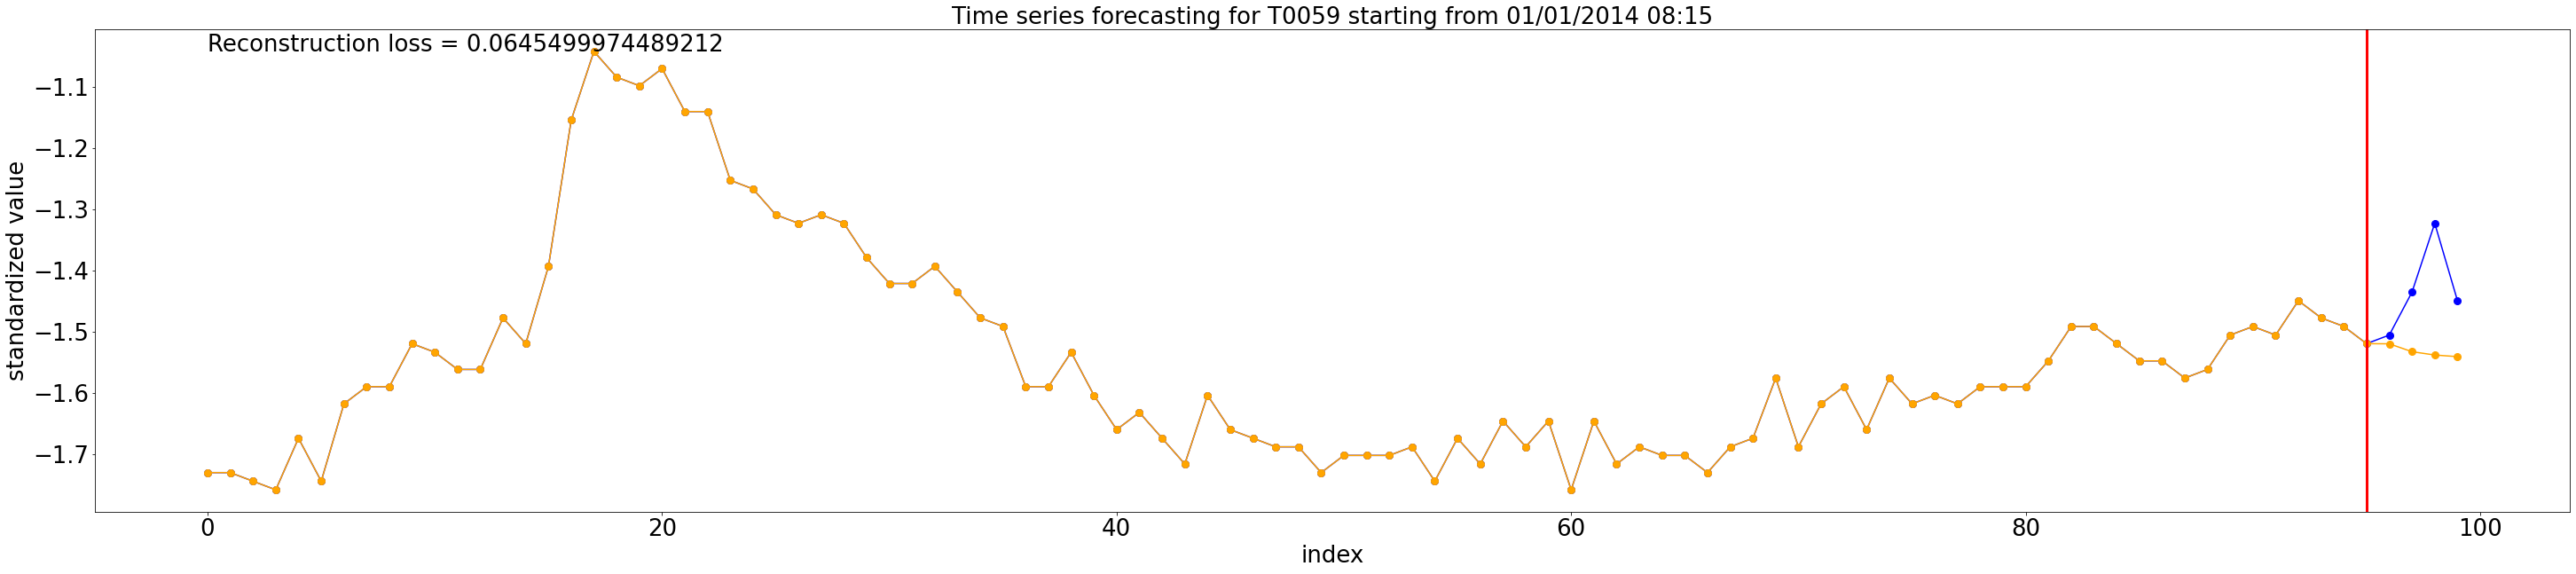

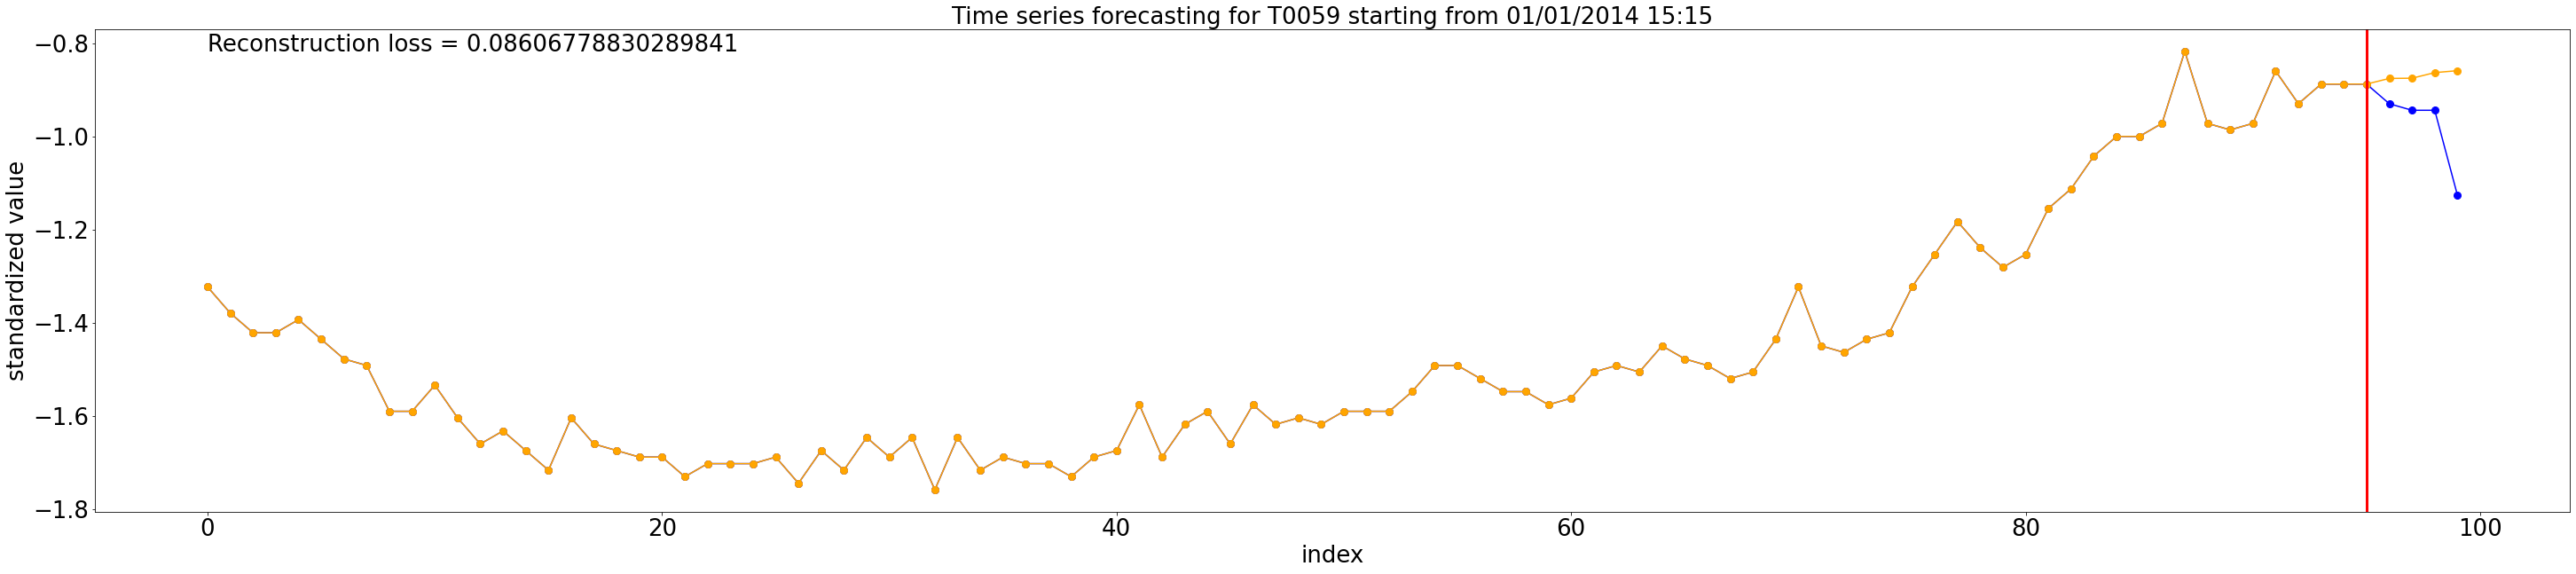

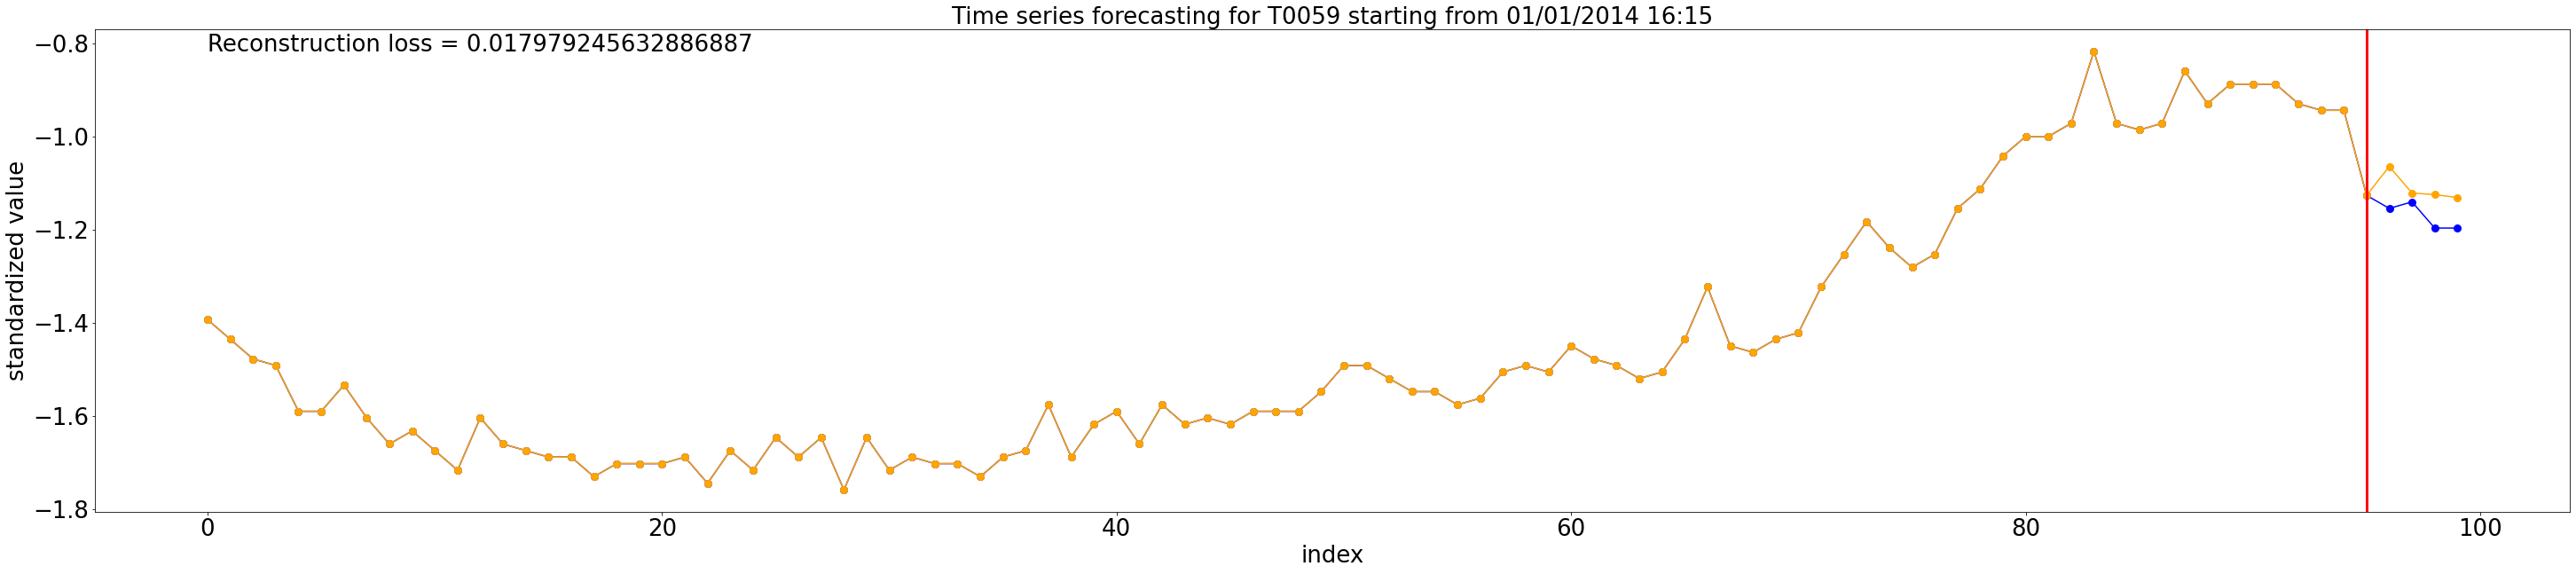

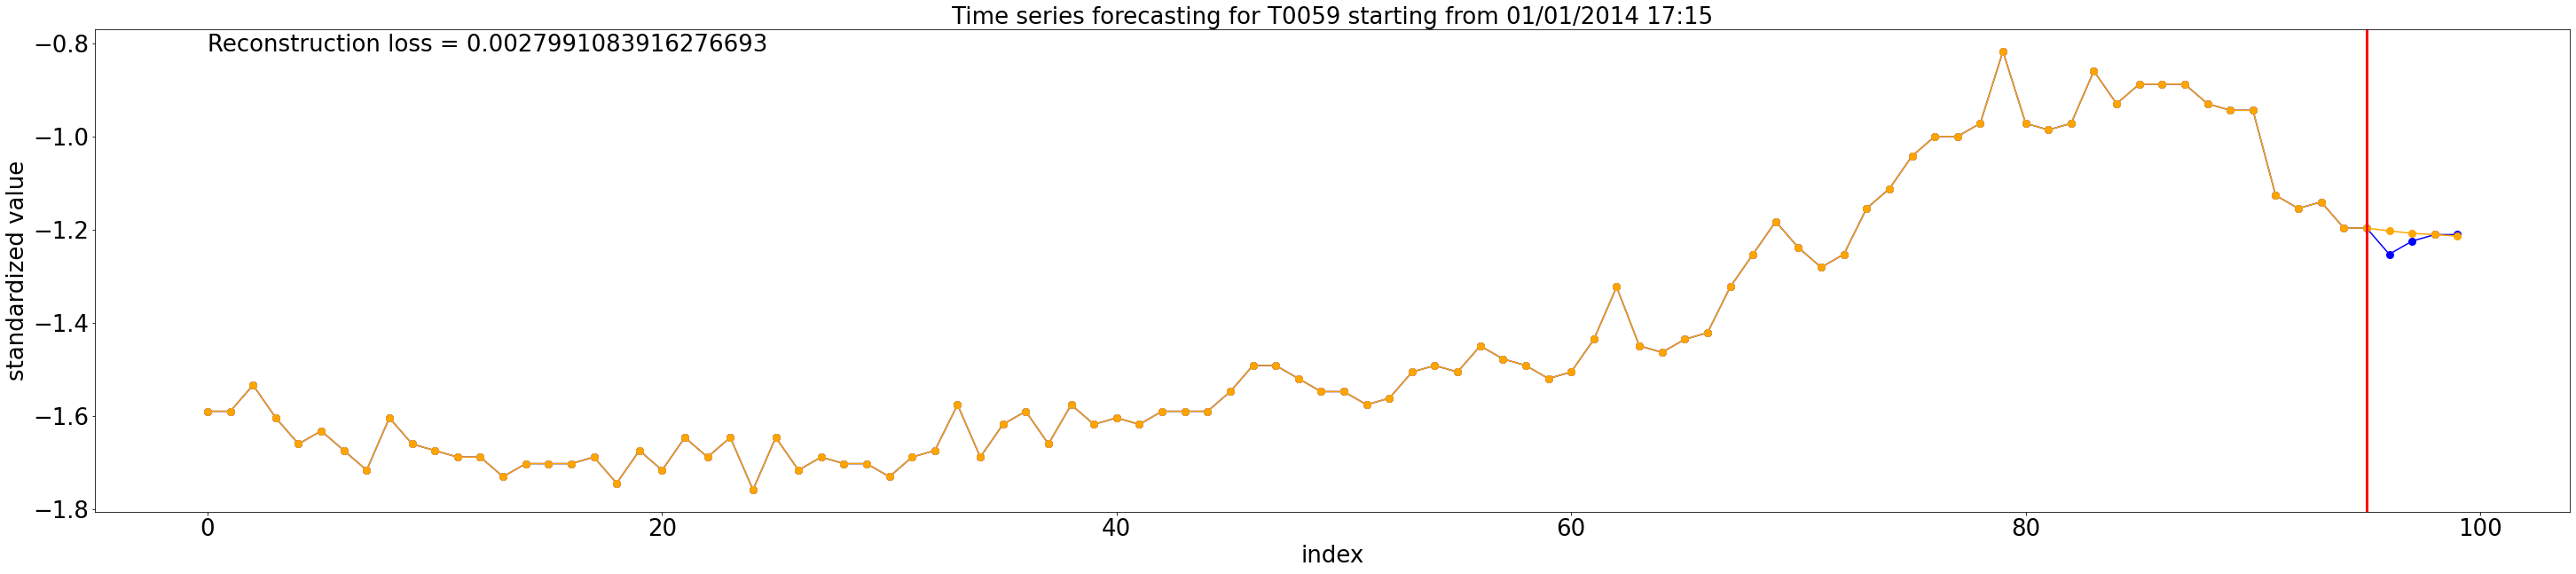

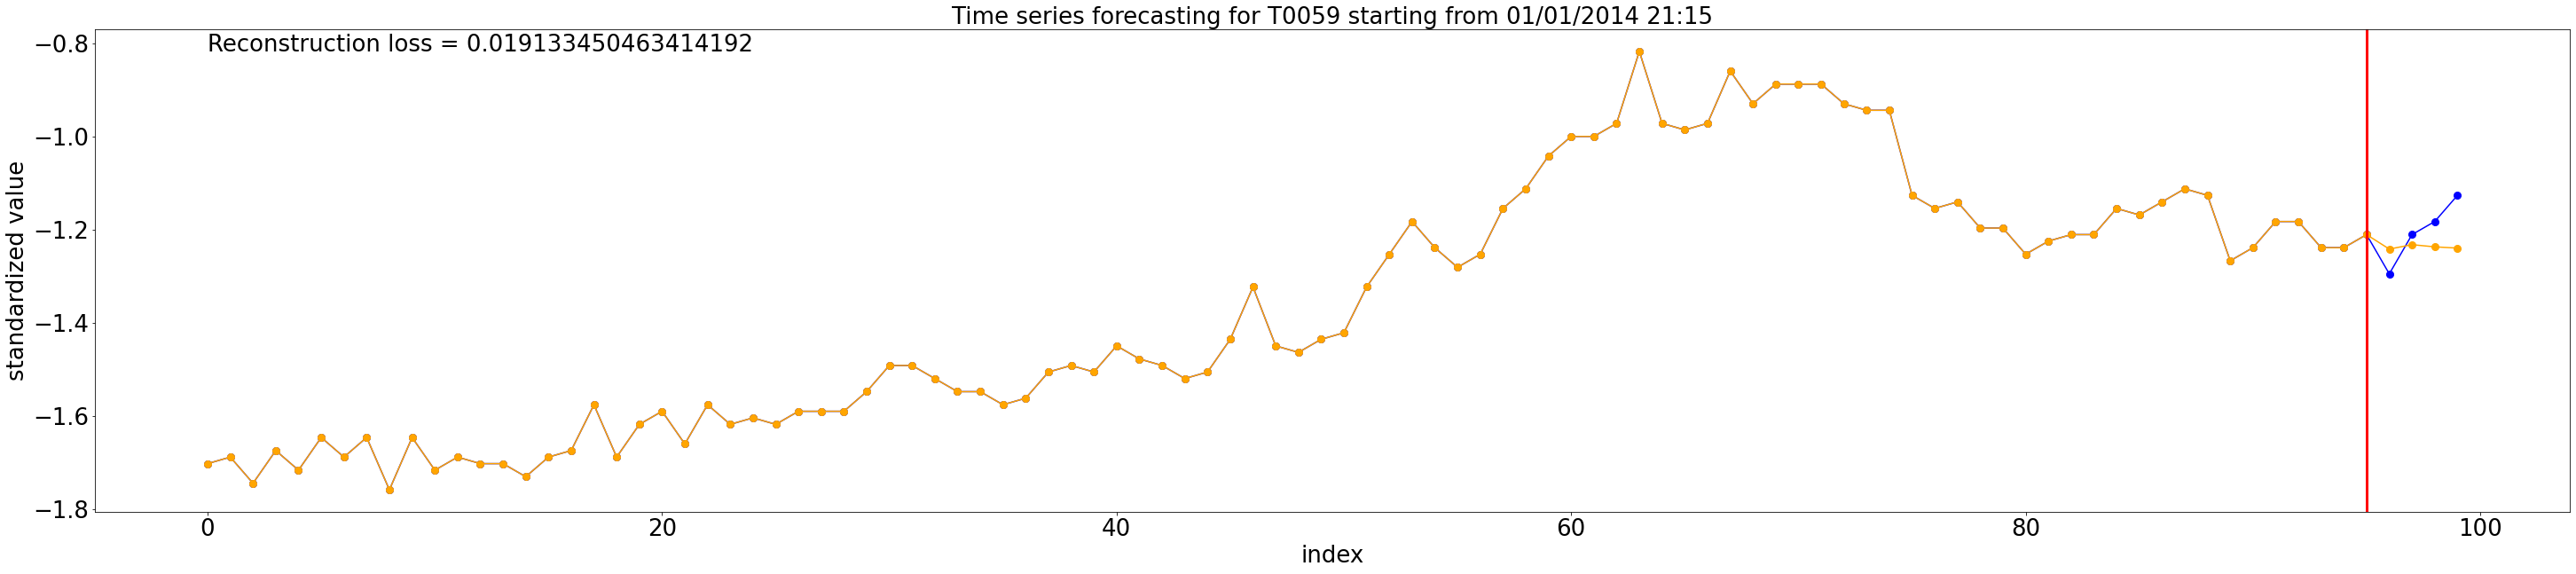

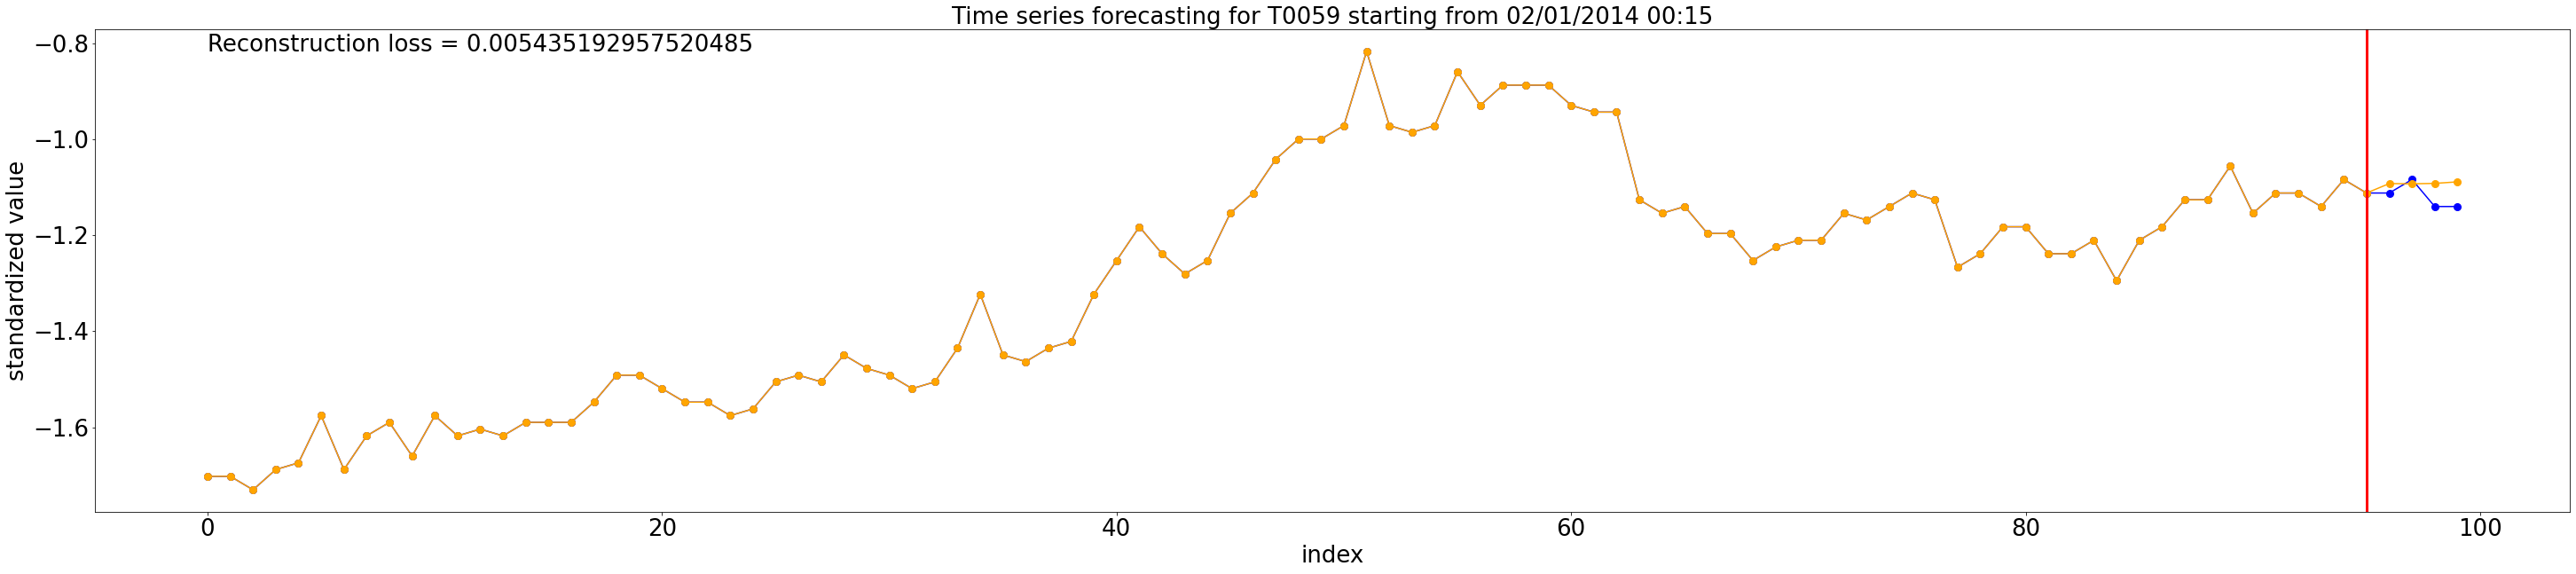

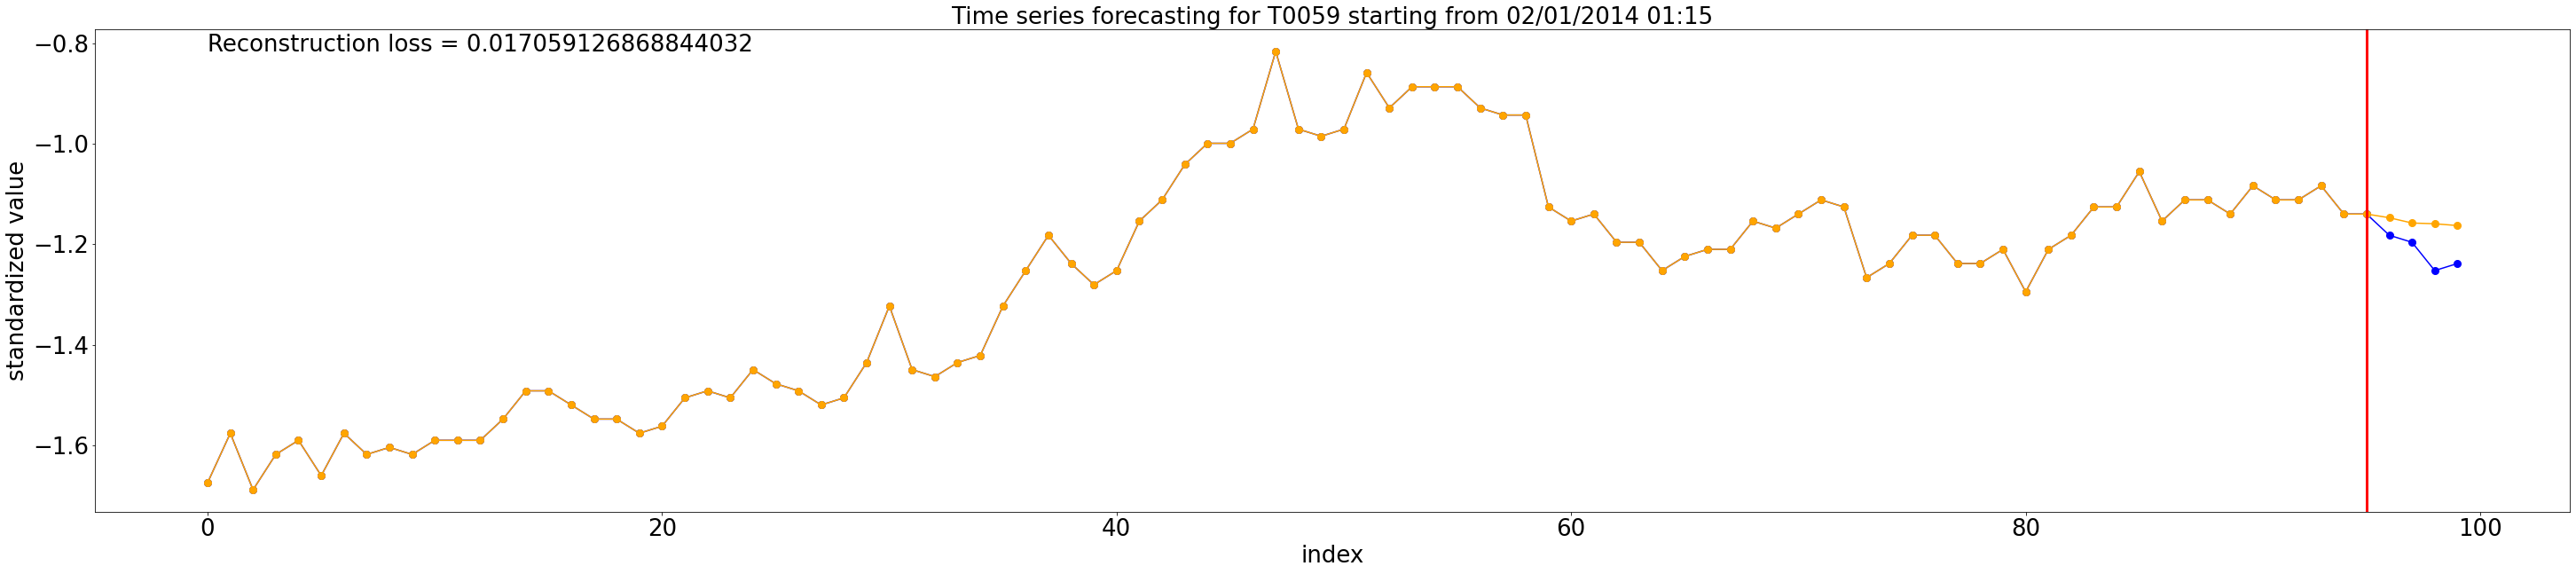

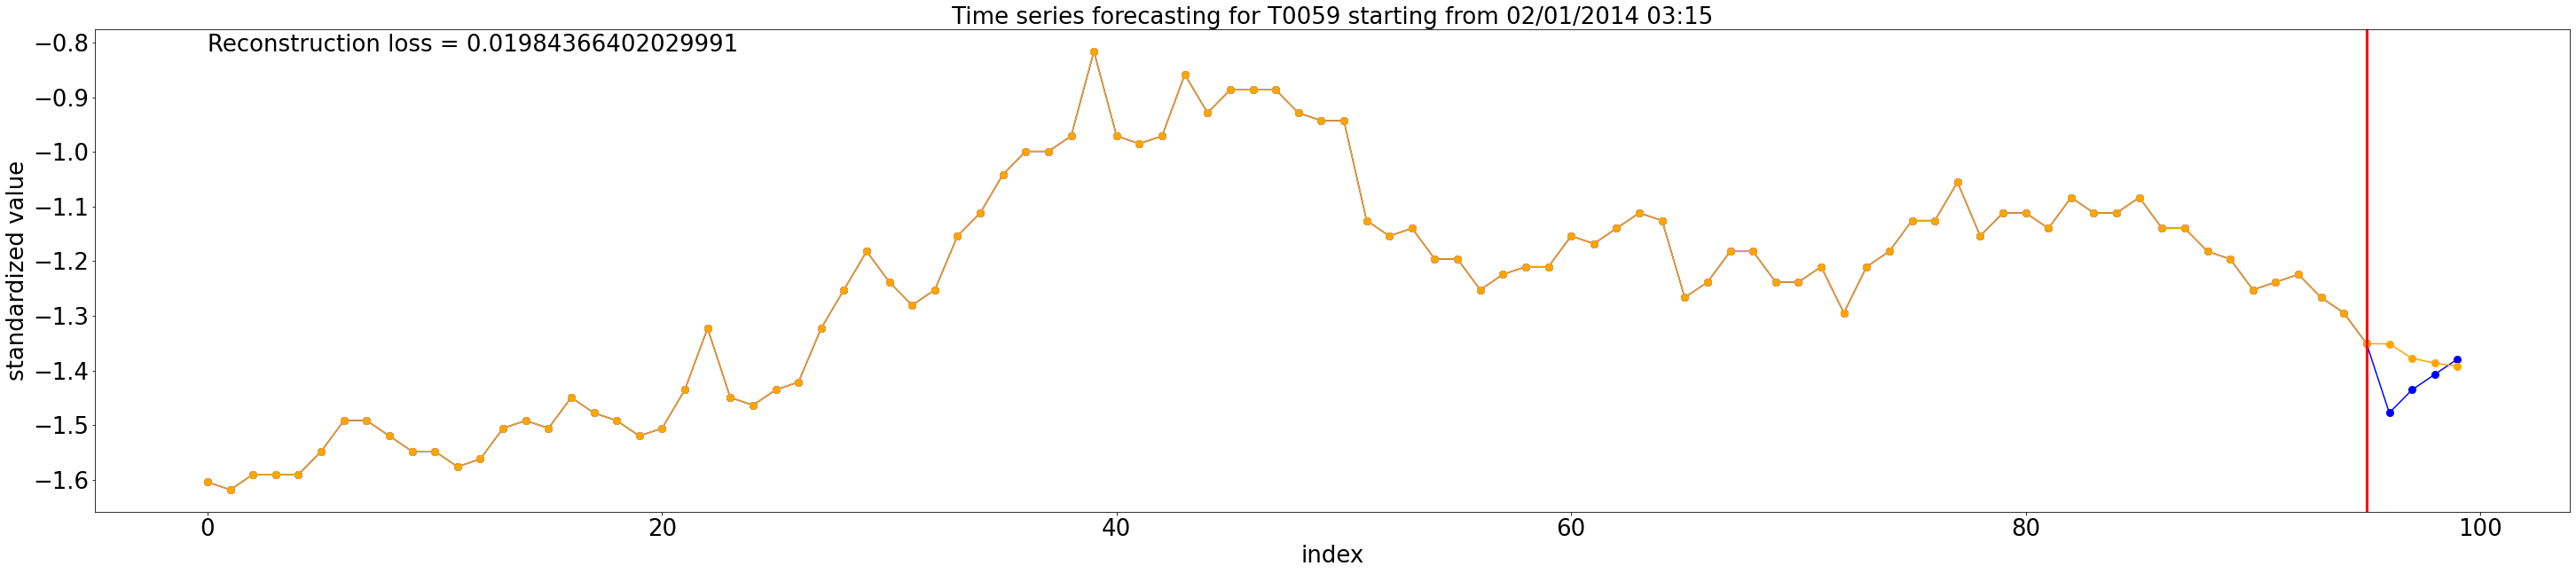

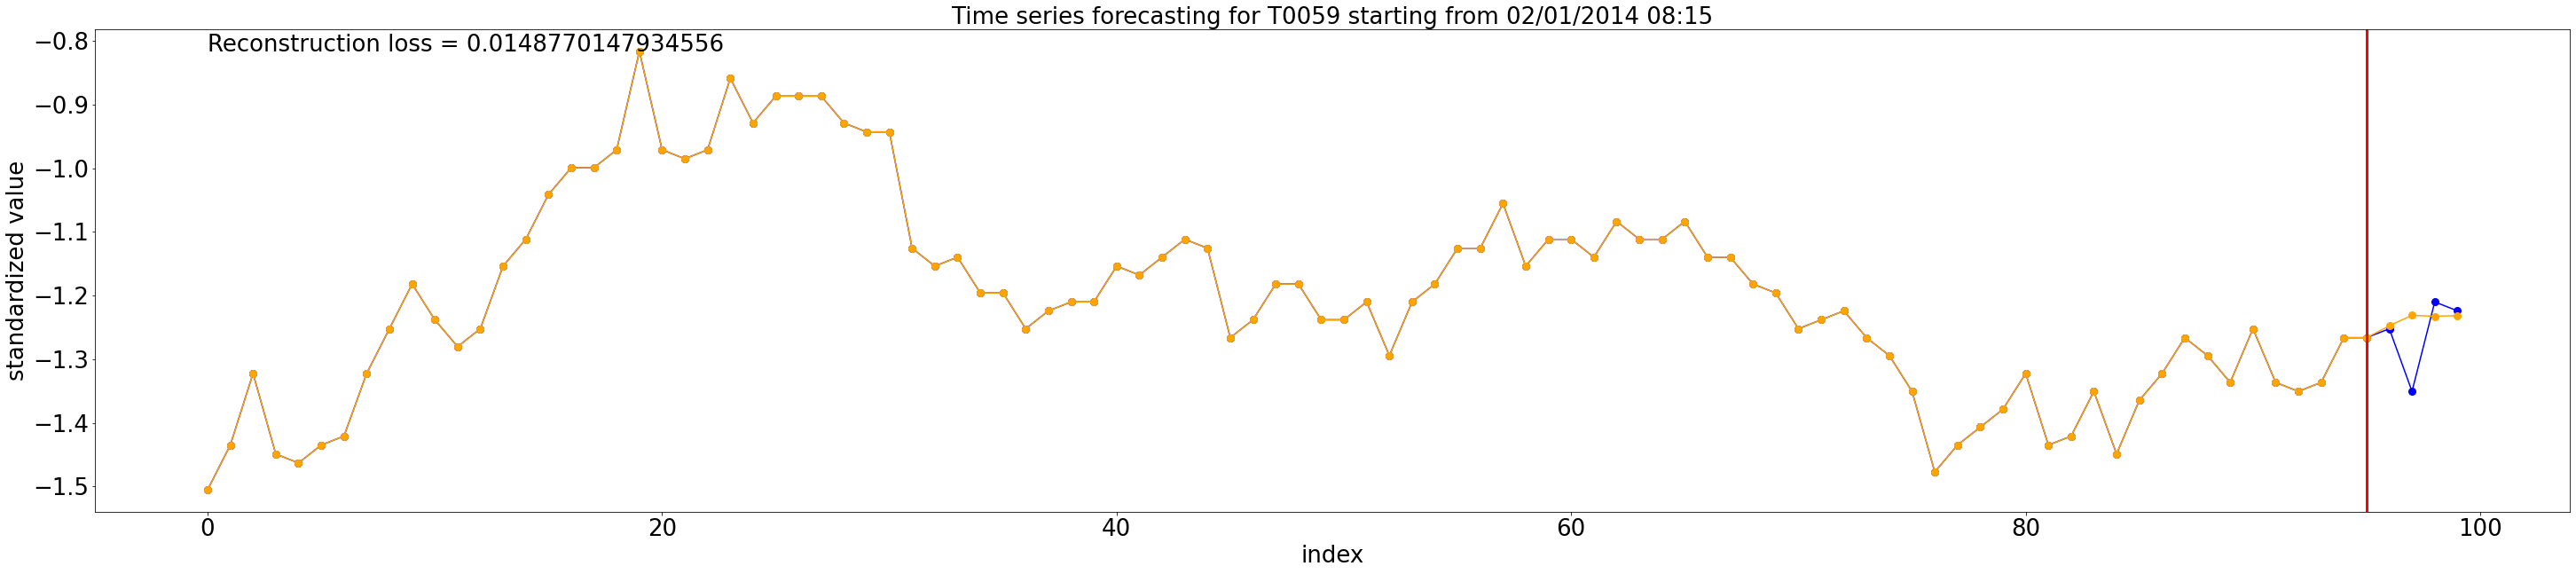

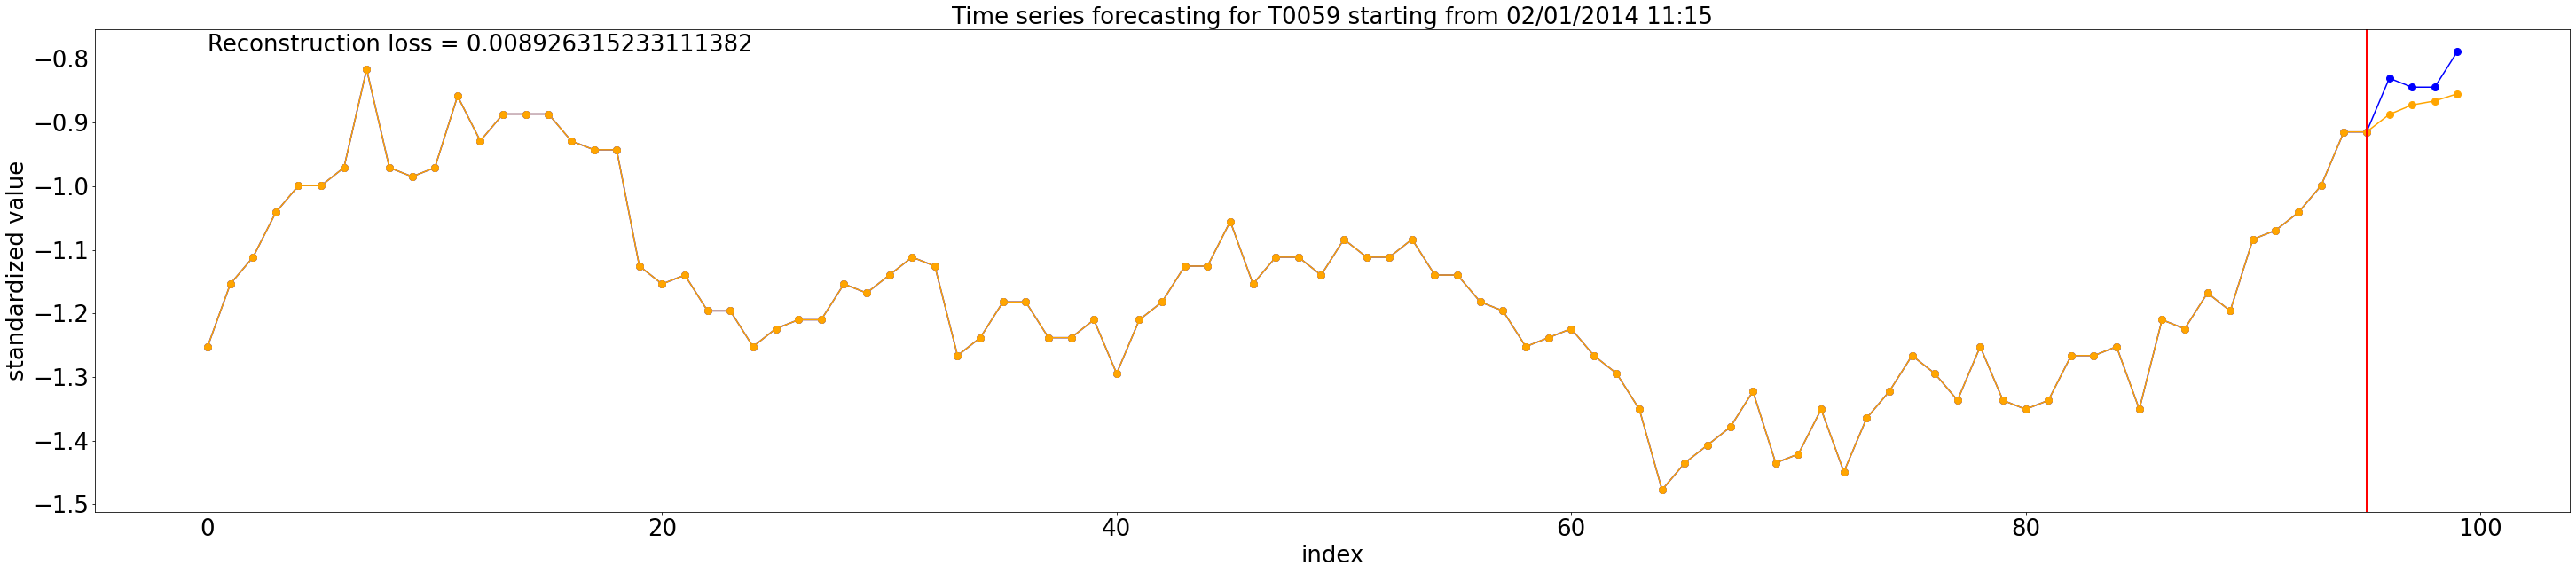

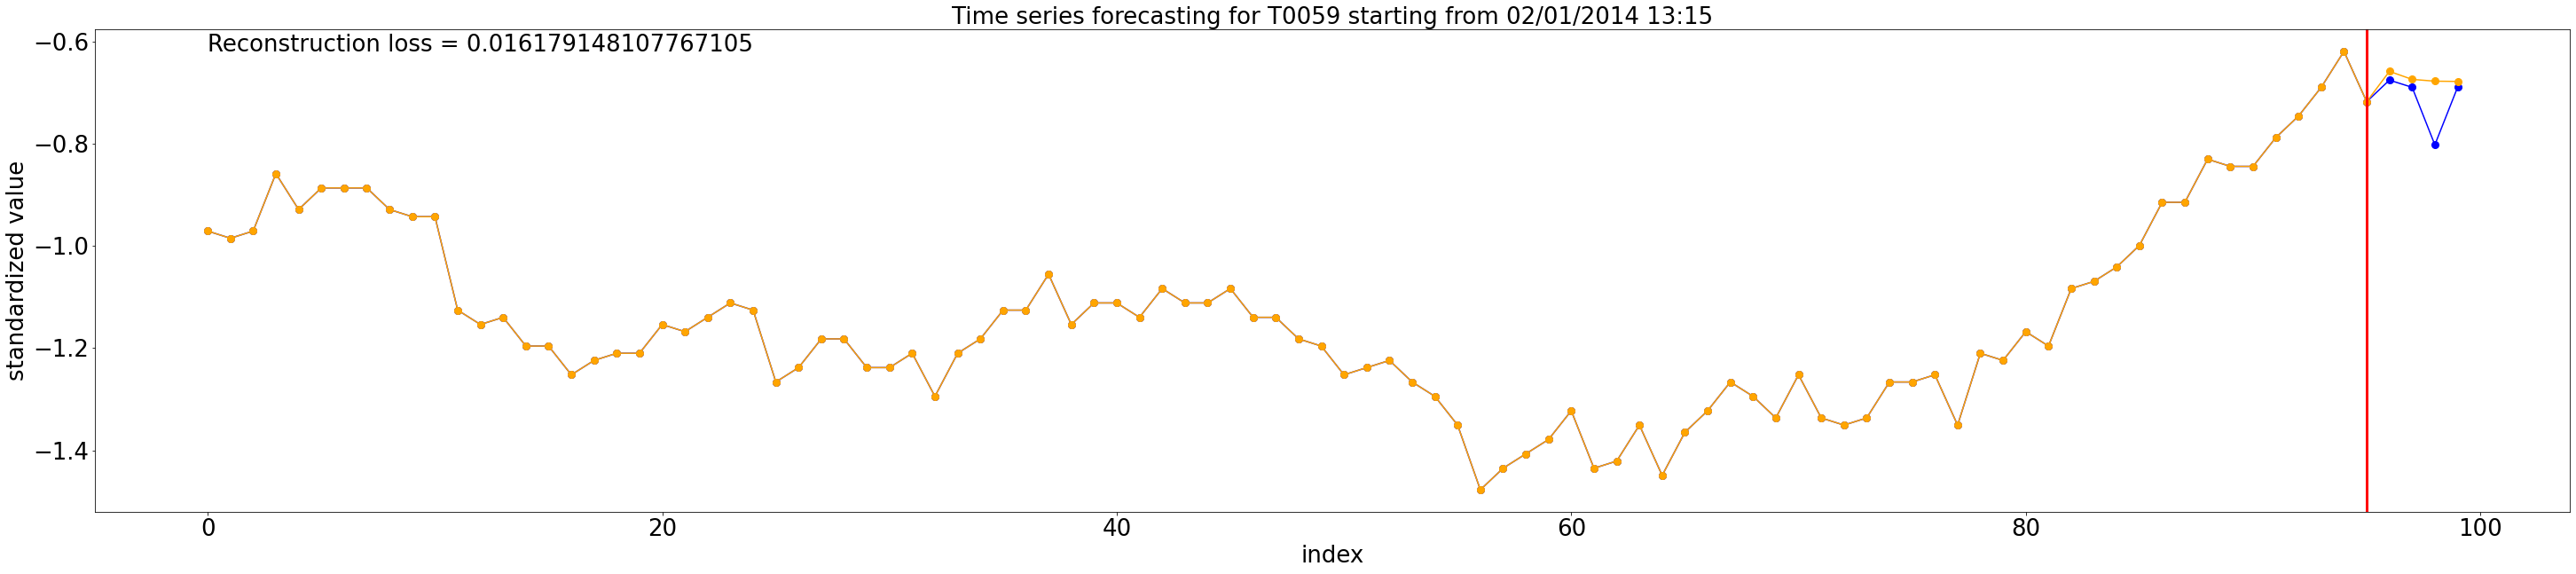

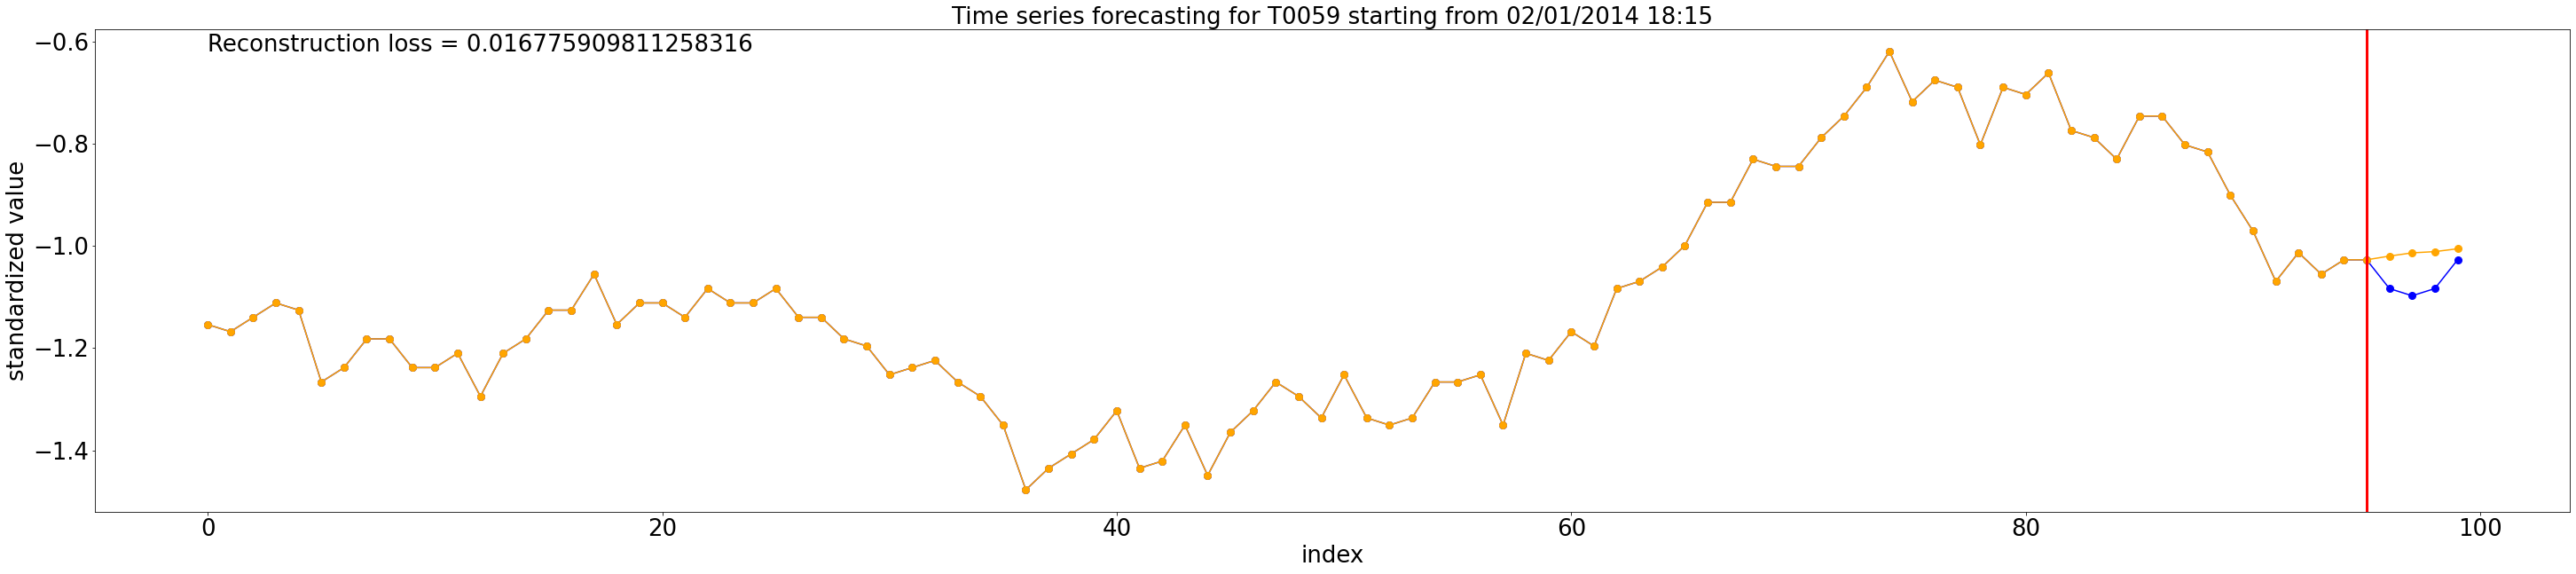

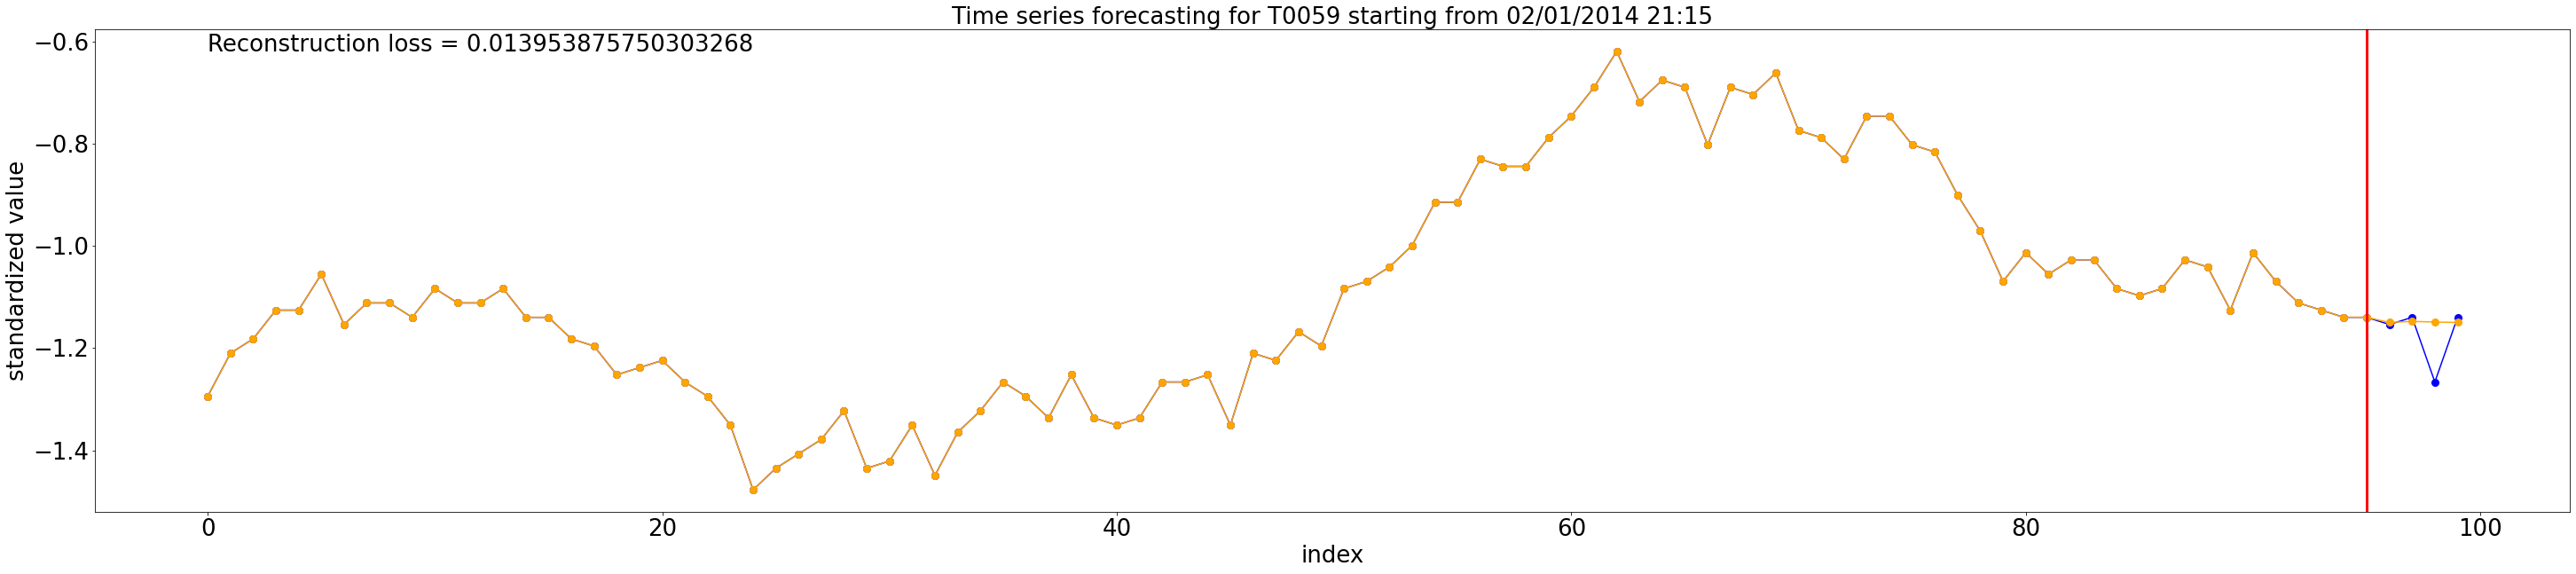

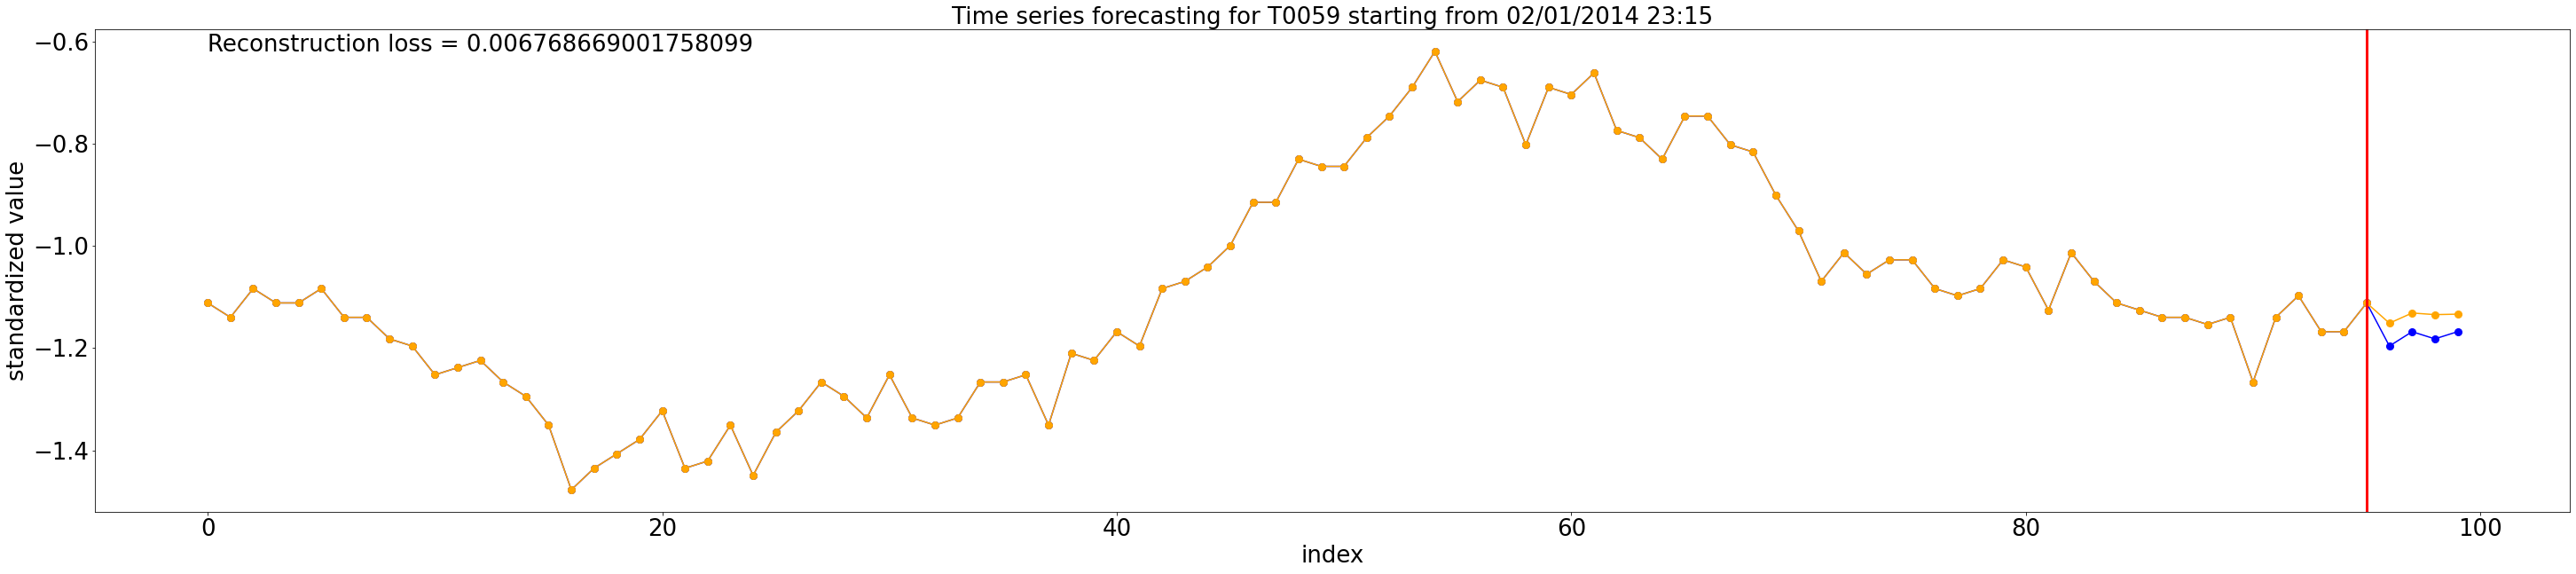

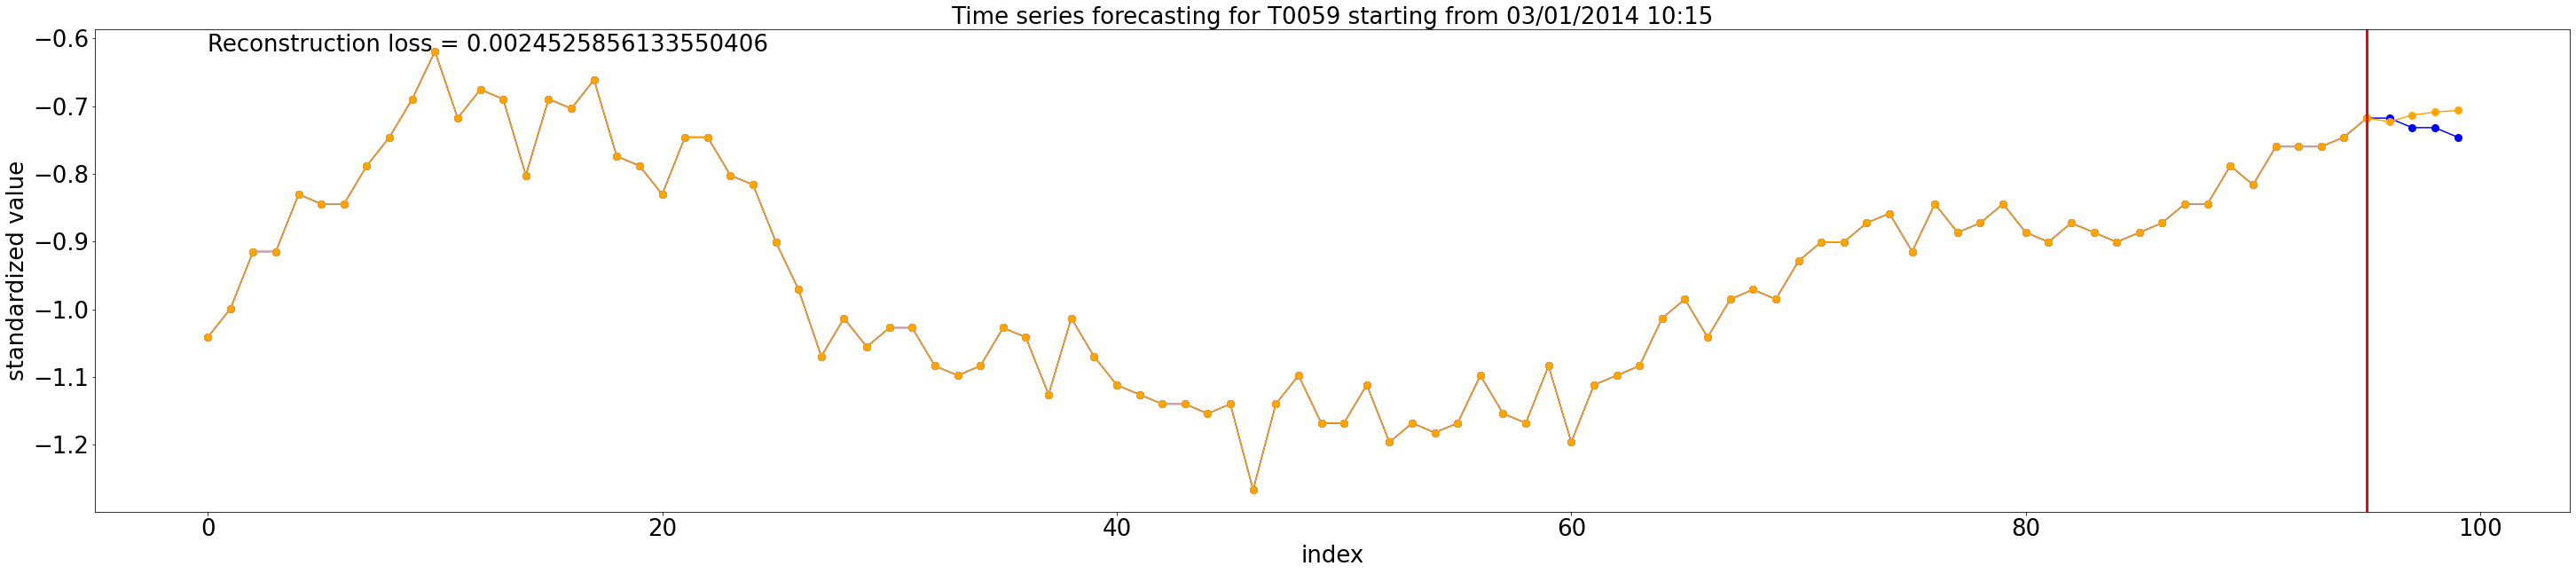

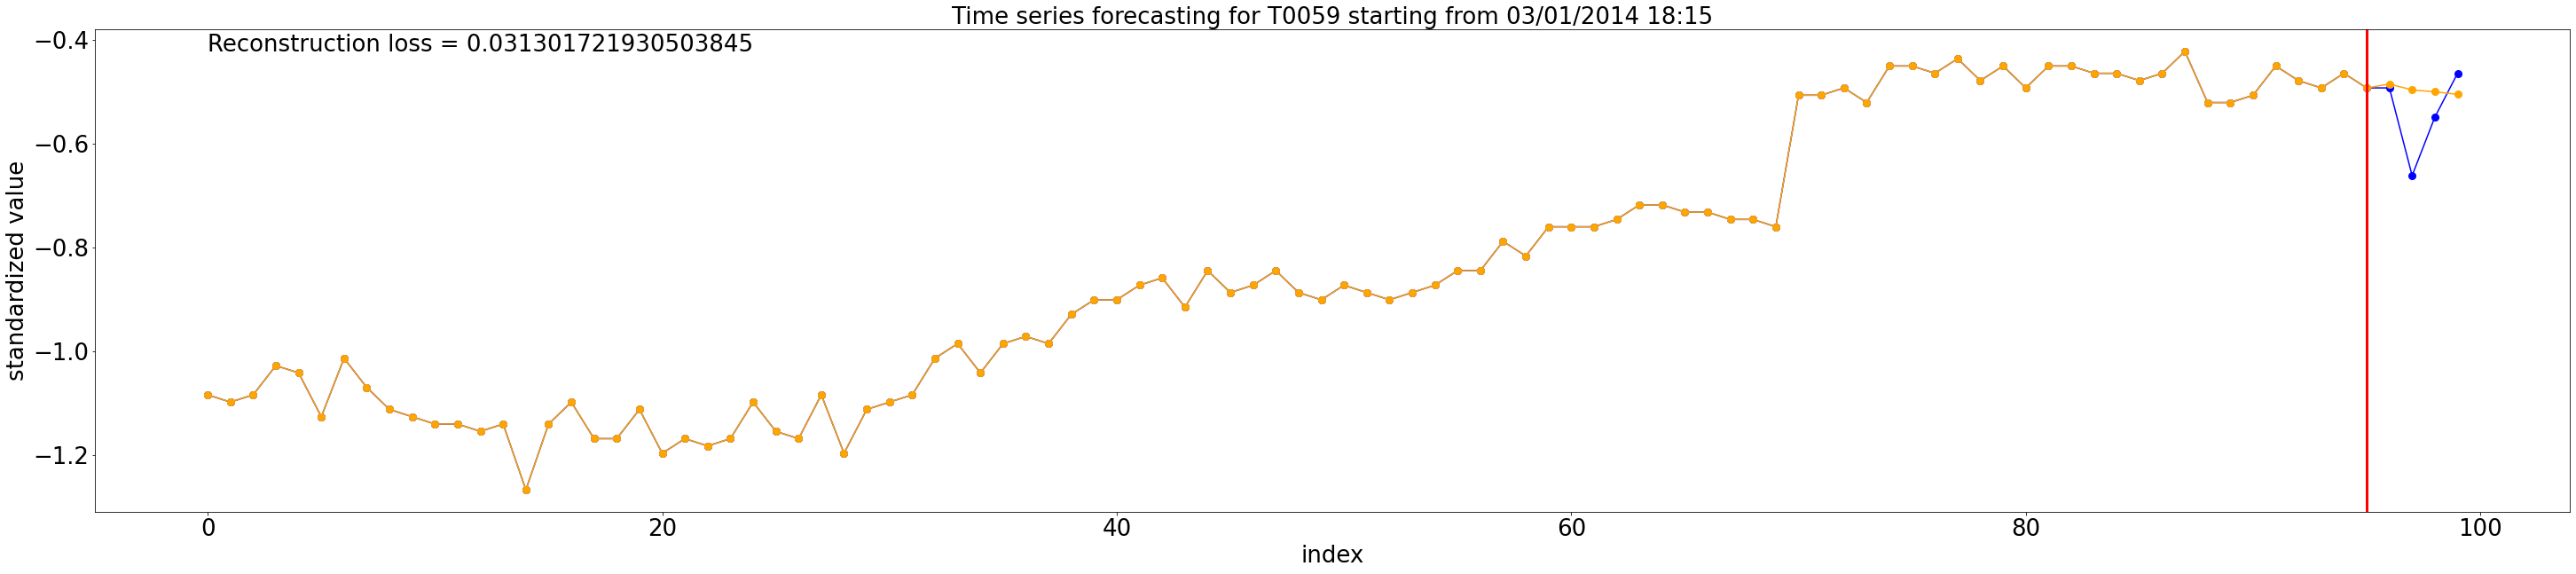

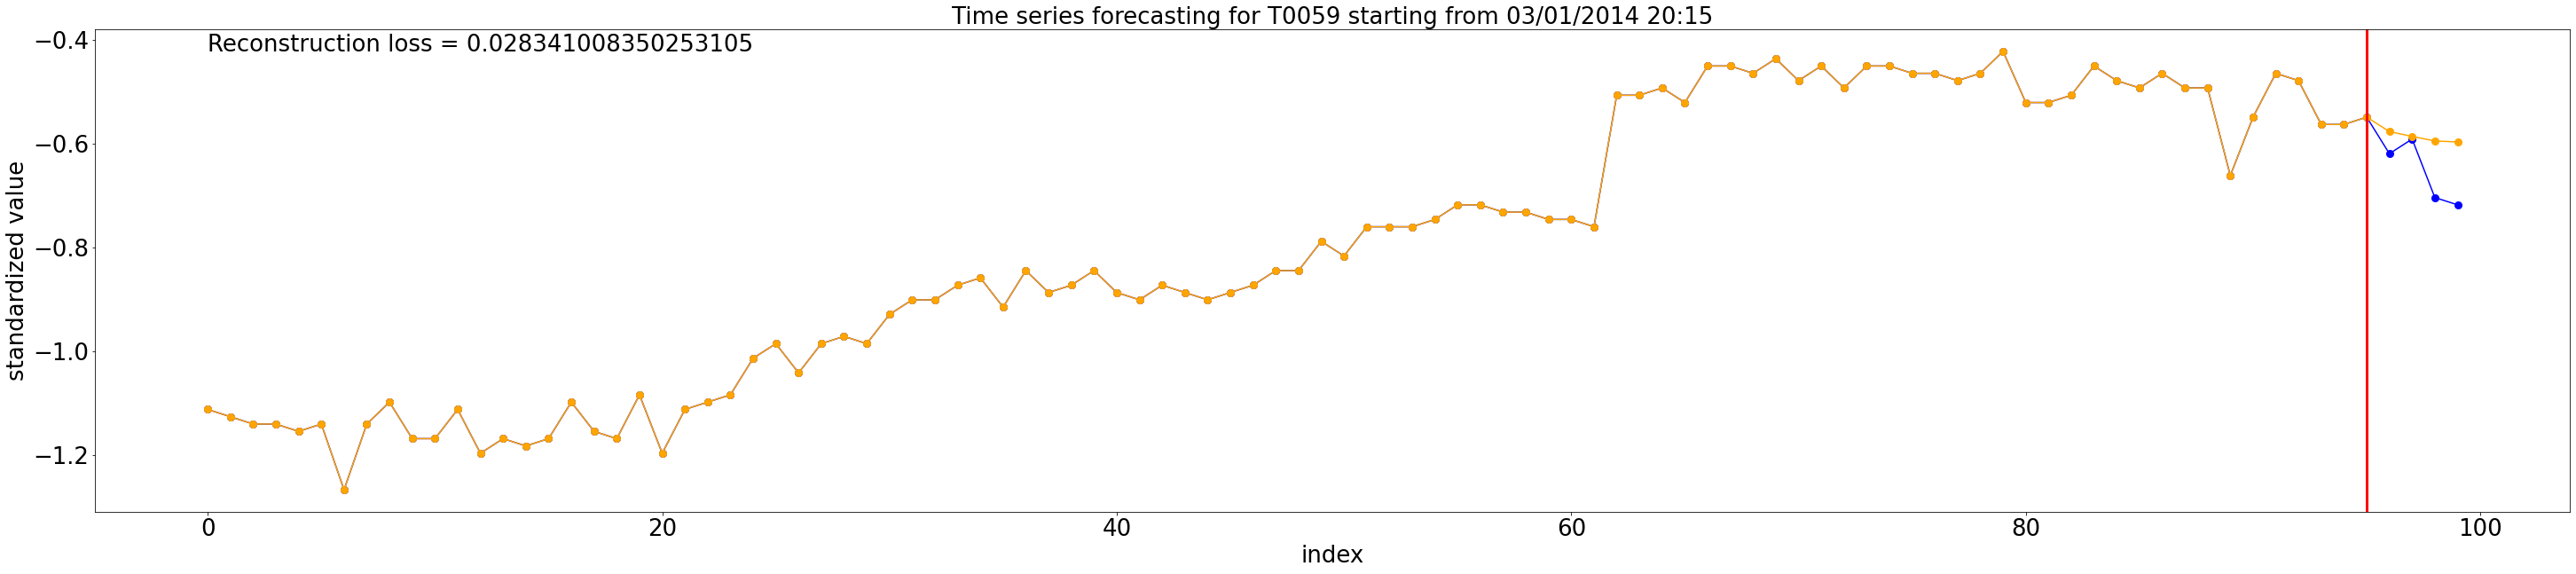

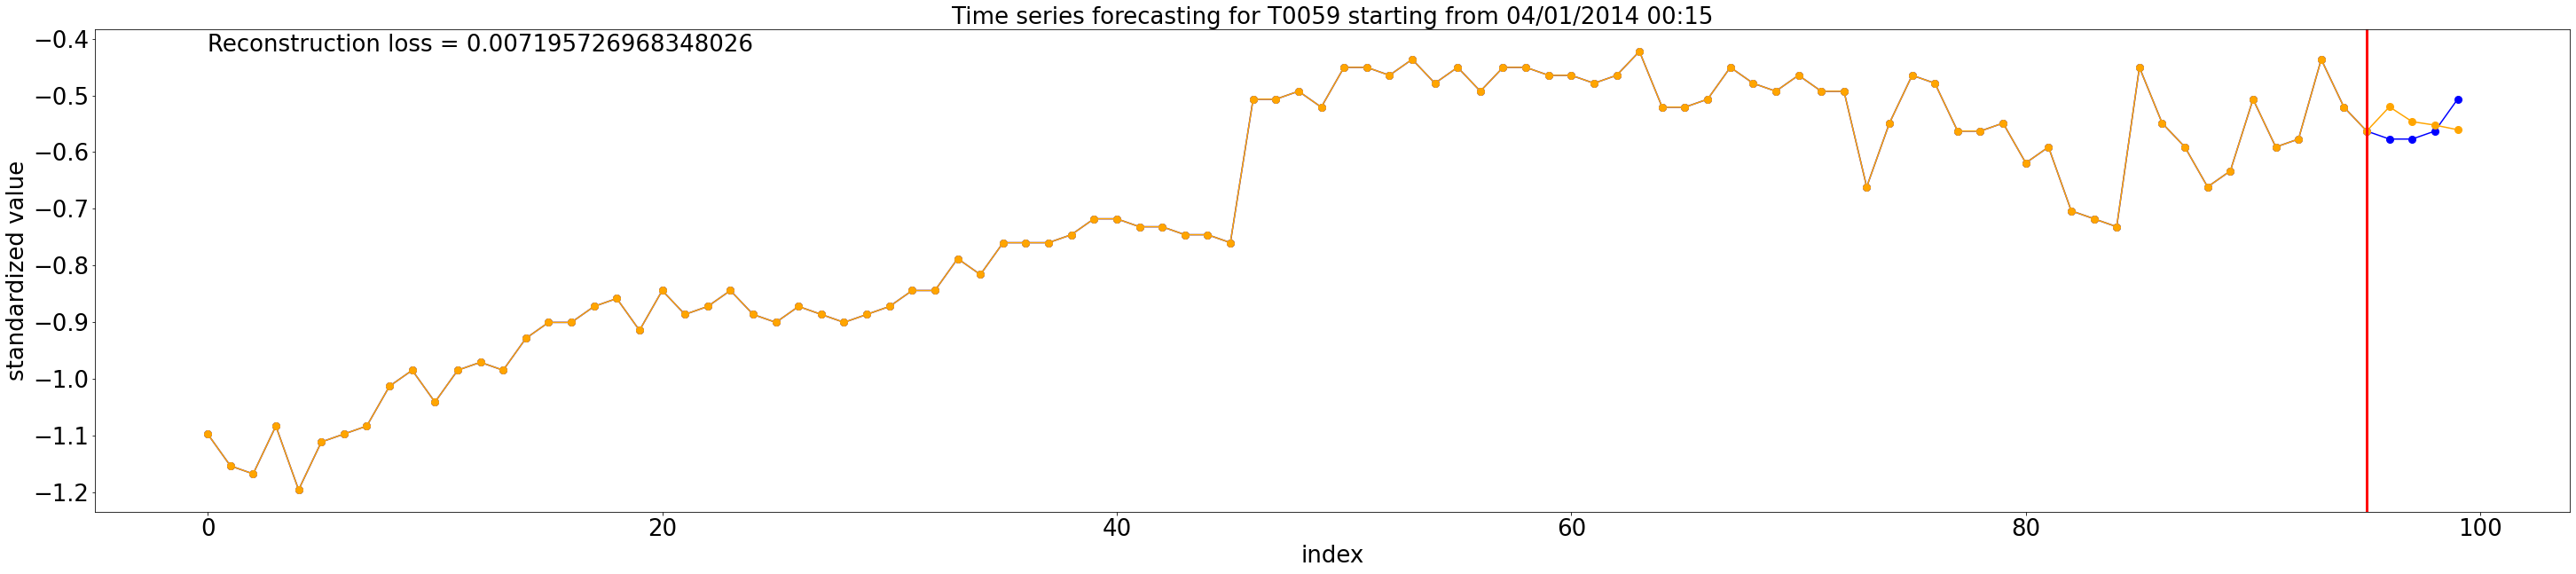

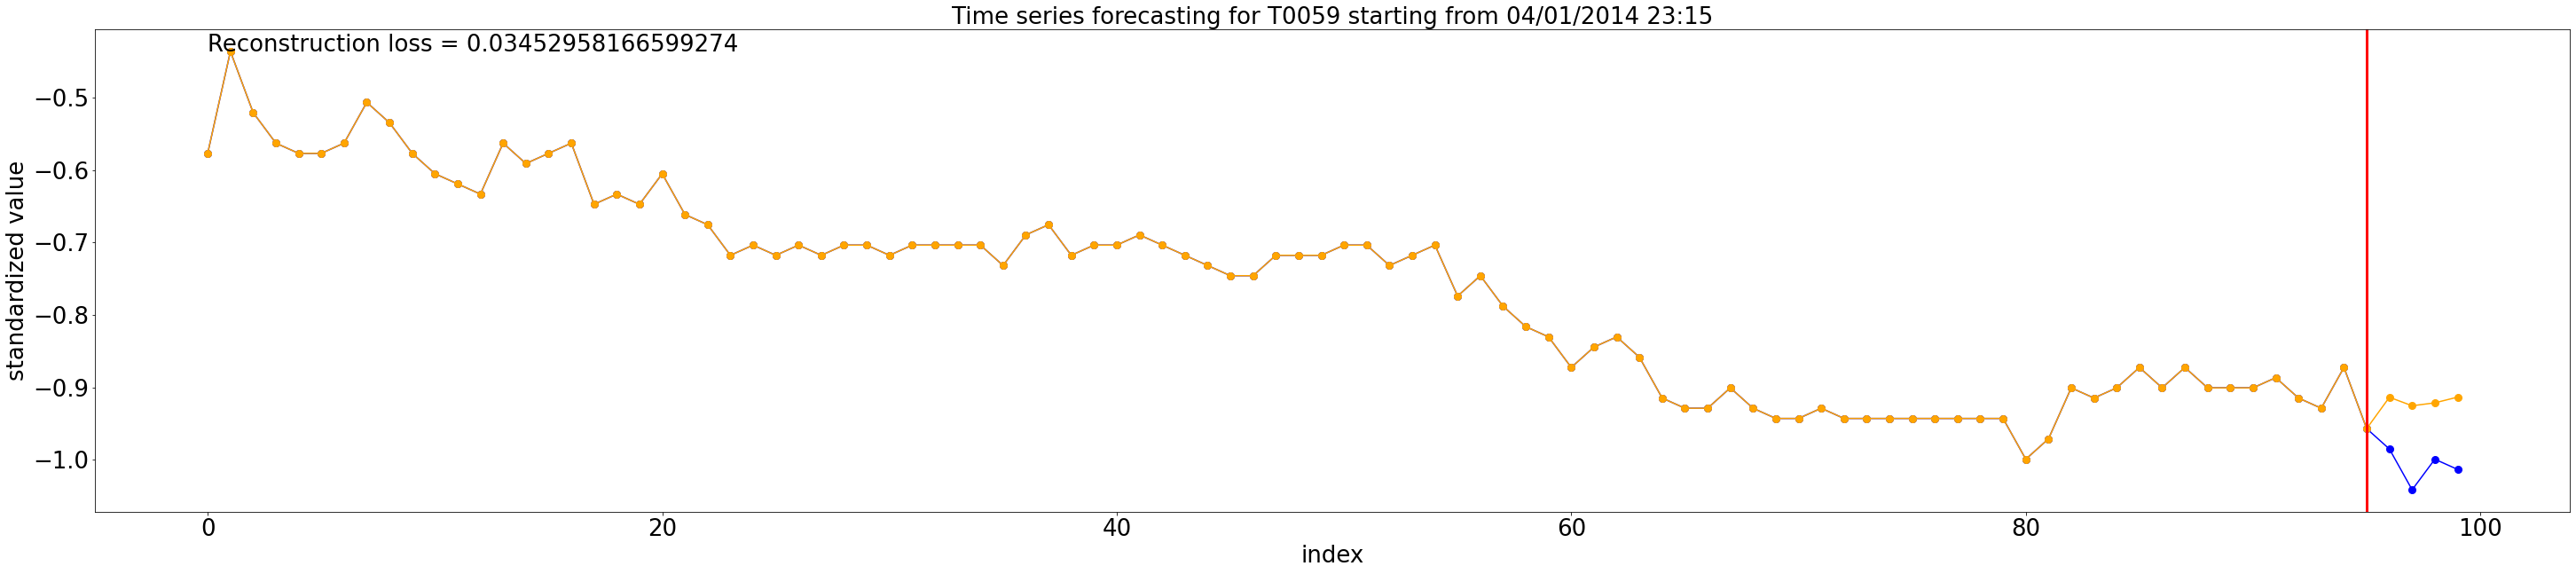

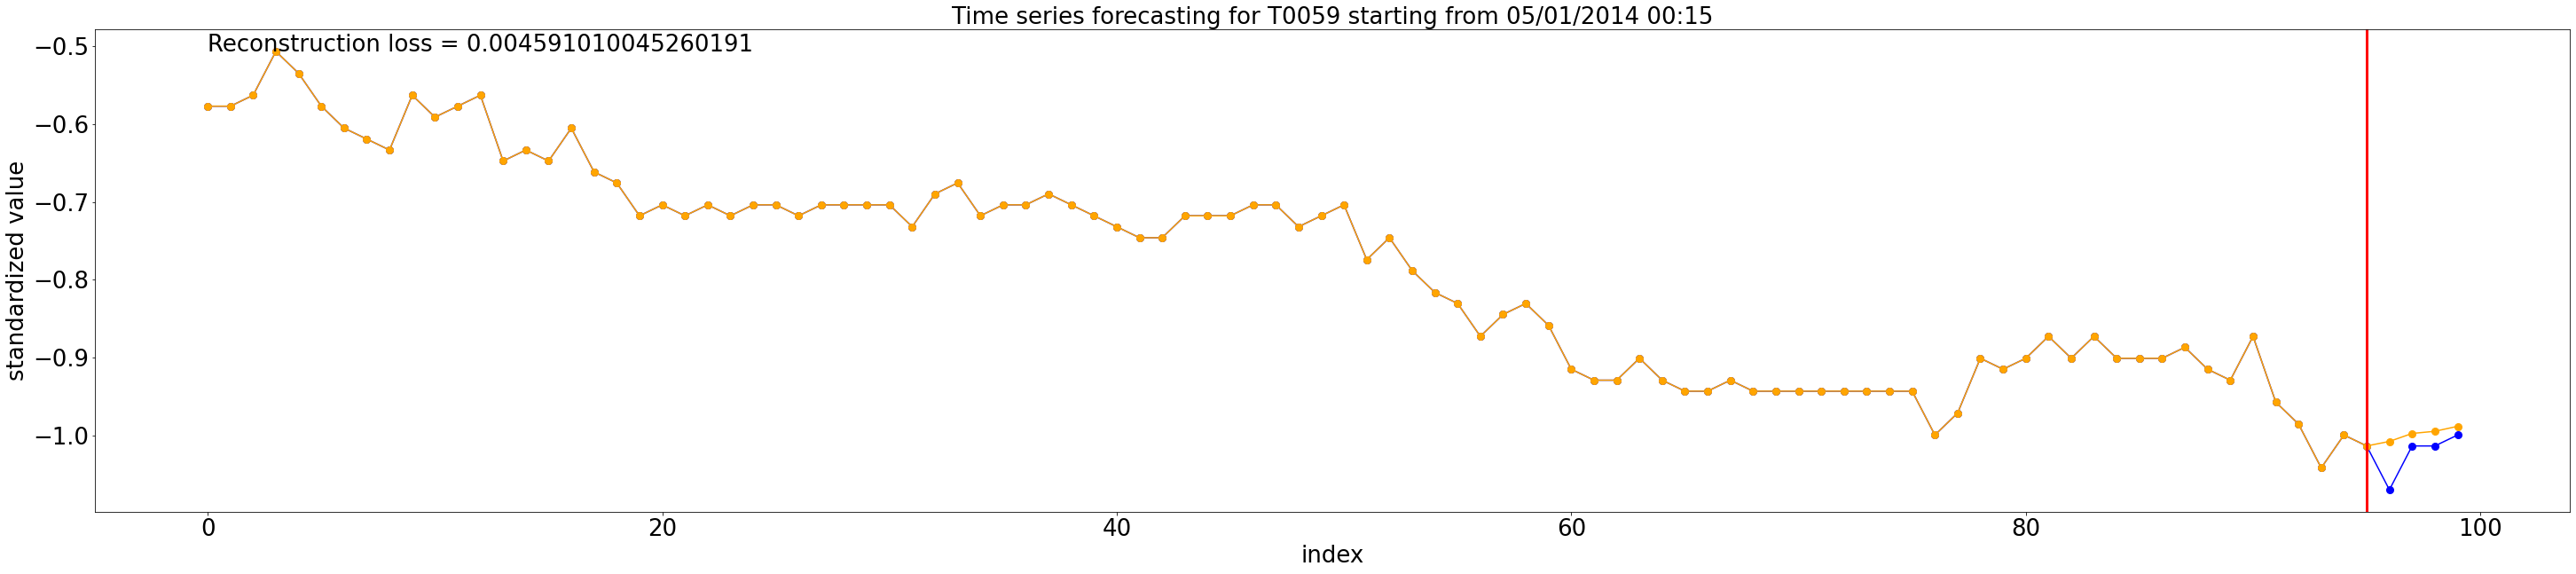

In [204]:
###
### PLOT SOME OTHER EXAMPLES
###
lowest_loss_indexes_list = list(lowest_loss_indexes.cpu().numpy())
ts_len = sample_tensor_features.size(1)

for i in range(0,20):#lowest_loss_indexes_list:
  f = plt.figure()
  f.set_figwidth(50)
  f.set_figheight(10)
  # single_date = str(date[i])
  plt.title(f'Time series forecasting for {sensor_code} starting from {date[i]}' ,fontsize = 26)
  plt.ylabel('standardized value',fontsize=26)
  plt.xlabel('index',fontsize=26)
  plt.xticks(fontsize=26)
  plt.yticks(fontsize=26)
  
  # find the outliers according to the validation
  y_outliers = np.where(sample_tensor_validation[i].to("cpu") == 1, np.NaN, sample_tensor_target[i].to("cpu"))
  # plt.xlim(96,102)
  original_signal = torch.cat((sample_tensor_features, sample_tensor_target), 1)[i]
  plt.plot(original_signal.to("cpu"), "o-",ms=8,color="blue")
  plt.text(0,max(original_signal),f'Reconstruction loss = {loss[i]}',fontsize=26)
  plt.plot(reconstructed[i].to("cpu"),"o-",ms=8,color="orange")
  plt.plot(np.arange(ts_len,ts_len+n_previsions), y_outliers, "x-",ms=15,mew=10,color="red")
  # plt.fill_between(line_deviation.index,under_line,over_line, color='b', alpha=.1)
  plt.axvline(x=ts_len-1, color='red',lw=3)
  # plt.savefig('T0010_temperature_anomaly.pdf')

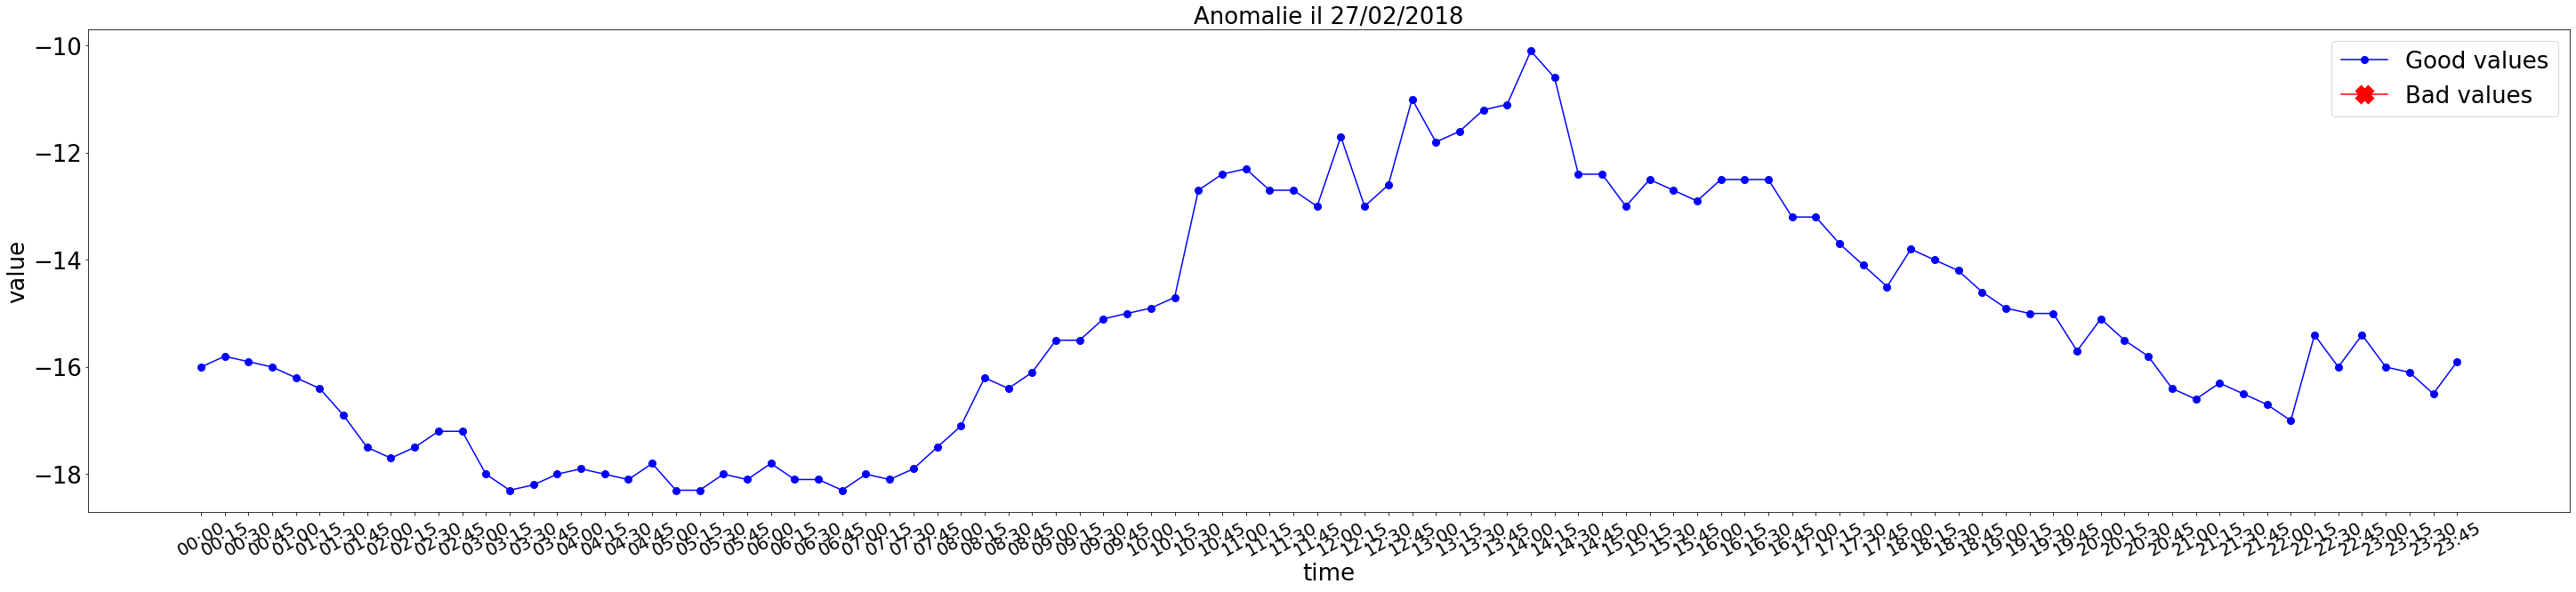

In [145]:
string_to_plot = "27/02/2018" 
station_num = "T0059" 

df = df_single_station
# Converting string in to datetime
df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y')
date_to_plot = datetime.strptime(string_to_plot, '%d/%m/%Y')

# Create a dataframe of only that station in that day
df_filtered = df[(df['label'] == station_num) &
                  (df['date'] == date_to_plot)]

# Split good and bad data into 2 samples 
# y_good_samples = np.where(df_filtered["validation_code"] == 0, df_filtered.value, nan)
y_signal = df_filtered.value

# y_bad_samples = np.where(df_filtered["validation_code"] == 0, nan, df_filtered.value)
y_outliers = np.where(df_filtered["validation_code"].values == 1, np.NaN, df_filtered.value)

# Define the x axis value
x_plot = df_filtered.time

f = plt.figure()
f.set_figwidth(50)
f.set_figheight(10)

# Create subplot
ax = plt.subplot()

# Set labels
plt.title('Anomalie il ' +string_to_plot ,fontsize = 26)
plt.ylabel('value',fontsize=26)
plt.xlabel('time',fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=26)
# Define tick label to avoid overlapping
ax.set_xticklabels(x_plot,rotation=30)

# Plotting datas with different markers
plt.plot(x_plot, y_signal, "o-",ms=8,color="blue")	
plt.plot(x_plot, y_outliers, "x-",ms=15,mew=10,color="red")

# Making a legend
ax.legend(['Good values', 'Bad values'], prop={'size': 26})

# Visualize
plt.show()

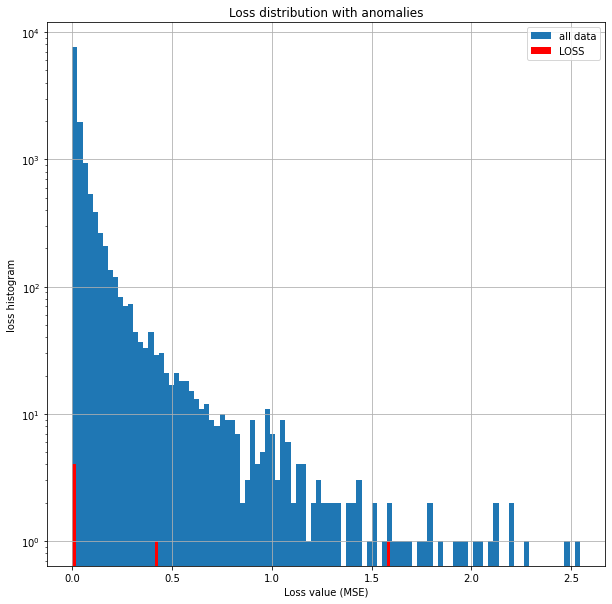

In [203]:
# HISTOGRAM
criterion = nn.MSELoss(reduction='none')
loss = criterion((reconstructed[:,-pred_length:]), (sample_tensor_target)).sum(dim=1)
arr = loss.cpu().detach().numpy()
extract_quantity_from_dataset(dataset['train'],"labels",None,device=device)
bool_validation = np.any(sample_tensor_validation.cpu().numpy()!=1,axis=1)
plt.figure(figsize=[10,10])
N_BINS = 100
plt.hist(arr, bins = N_BINS, label = 'all data')
plt.hist(loss[bool_validation].cpu(), bins = N_BINS, label = 'LOSS', color = 'red')
plt.yscale('log')
plt.xlabel("Loss value (MSE)")
plt.ylabel("loss histogram")
plt.title("Loss distribution with anomalies")
plt.grid()
plt.legend()
plt.show()
